In [3]:
import os
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
from torch.optim import Adam
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
#from torchsummary import summary
import torch.utils.data as utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
from torch.utils.data import Dataset
from tqdm import tqdm
import h5py

In [4]:
df = pd.read_csv('D:/ADNI/Dati/ADNI1_T1_2_11_2020.csv')

In [5]:
df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,63898,941_S_1363,MCI,F,70,1,MRI,MPR; GradWarp; B1 Correction,Processed,3/12/2007,NiFTI,NaN
1,63899,941_S_1363,MCI,F,70,1,MRI,MPR; GradWarp,Processed,3/12/2007,NiFTI,NaN
2,63900,941_S_1363,MCI,F,70,1,MRI,MPR-R; GradWarp; B1 Correction; Mask,Processed,3/12/2007,NiFTI,NaN
3,63901,941_S_1363,MCI,F,70,1,MRI,MPR-R; GradWarp; B1 Correction; N3,Processed,3/12/2007,NiFTI,NaN
4,63902,941_S_1363,MCI,F,70,1,MRI,MPR-R; GradWarp; B1 Correction,Processed,3/12/2007,NiFTI,NaN


In [6]:
interpolator = sitk.sitkLinear
default_value = 0
print('*Translation Transform*')
transform = sitk.TranslationTransform(3)

*Translation Transform*


In [7]:
IMG_Folder = 'D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/'

In [8]:
dati_img = os.listdir(IMG_Folder)
cwd = os.getcwd()

In [9]:
cwd

'D:\\Alzheimer\\ADNI\\LeNet5_CNN'

In [10]:
dati_img[1:]

['H5Corrette',
 'registrata_ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3_Br_20070319113435616_S13408_I45107.nii',
 'registrata_ADNI_002_S_0413_MR_MPR__GradWarp__B1_Correction__N3_Br_20070319115122015_S13893_I45116.nii',
 'registrata_ADNI_002_S_0559_MR_MPR__GradWarp__B1_Correction__N3_Br_20070216234114135_S14875_I40673.nii',
 'registrata_ADNI_002_S_0685_MR_MPR__GradWarp__B1_Correction__N3_Br_20070216235718337_S16309_I40682.nii',
 'registrata_ADNI_002_S_0729_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217001754498_S16874_I40707.nii',
 'registrata_ADNI_002_S_0782_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217003330133_S17835_I40716.nii',
 'registrata_ADNI_002_S_0816_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217005641090_S18402_I40730.nii',
 'registrata_ADNI_002_S_0938_MR_MPR__GradWarp__B1_Correction__N3_Br_20070219175220082_S19852_I40979.nii',
 'registrata_ADNI_002_S_0954_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217011146794_S19978_I40739.nii',
 'registrata_ADNI_002_S_0955_MR

In [9]:
dati_img[0].split('_')[2:5]

[]

In [10]:
ID = '_'.join(dati_img[0].split('_')[2:5])

In [11]:
ID

''

In [12]:
df.loc[df['Subject'] == ID]['Modality'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [13]:
reference_image = sitk.ReadImage(IMG_Folder + dati_img[1])

RuntimeError: Exception thrown in SimpleITK ReadImage: C:\Users\dashboard\Miniconda3\conda-bld\simpleitk_1546533074085\work\Code\IO\src\sitkImageReaderBase.cxx:104:
sitk::ERROR: Unable to open "D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette" for reading.

In [11]:
img_tot = []
y = []
try:
    os.makedirs('ADNI1_PROC')
except:
    print("Already Created")
for data_img in tqdm(dati_img[1:]):
    if 'nii' in str(data_img):
        print(str(data_img))
        sitk_t1 = sitk.ReadImage(IMG_Folder + data_img)
        #print(sitk_t1.GetDirection())
        #t2 = sitk.Resample(sitk_t1, reference_image, transform,interpolator, default_value)
        t1 = sitk.GetArrayFromImage(sitk_t1)
        img_tot.append(t1)
        print()
        Subject = df.loc[df['Subject'] == '_'.join(data_img.split('_')[2:5])]['Group'].values[0]
        print(Subject)
        y.append(Subject)
        #sitk.WriteImage(t2,'ADNI1_PROC/'+ str(data_img))

        print(t1.shape)

Already Created


  0%|                                                                                          | 0/824 [00:00<?, ?it/s]

registrata_ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3_Br_20070319113435616_S13408_I45107.nii

CN
(166, 256, 256)


  0%|▏                                                                                 | 2/824 [00:00<02:59,  4.57it/s]

registrata_ADNI_002_S_0413_MR_MPR__GradWarp__B1_Correction__N3_Br_20070319115122015_S13893_I45116.nii

CN
(166, 256, 256)


  0%|▎                                                                                 | 3/824 [00:00<03:45,  3.65it/s]

registrata_ADNI_002_S_0559_MR_MPR__GradWarp__B1_Correction__N3_Br_20070216234114135_S14875_I40673.nii

CN
(166, 256, 256)


  0%|▍                                                                                 | 4/824 [00:01<04:13,  3.23it/s]

registrata_ADNI_002_S_0685_MR_MPR__GradWarp__B1_Correction__N3_Br_20070216235718337_S16309_I40682.nii

CN
(166, 256, 256)


  1%|▍                                                                                 | 5/824 [00:01<04:41,  2.91it/s]

registrata_ADNI_002_S_0729_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217001754498_S16874_I40707.nii

MCI
(166, 256, 256)


  1%|▌                                                                                 | 6/824 [00:02<04:51,  2.81it/s]

registrata_ADNI_002_S_0782_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217003330133_S17835_I40716.nii

MCI
(166, 256, 256)


  1%|▋                                                                                 | 7/824 [00:02<05:03,  2.69it/s]

registrata_ADNI_002_S_0816_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217005641090_S18402_I40730.nii

AD
(166, 256, 256)


  1%|▊                                                                                 | 8/824 [00:02<05:10,  2.63it/s]

registrata_ADNI_002_S_0938_MR_MPR__GradWarp__B1_Correction__N3_Br_20070219175220082_S19852_I40979.nii

AD
(166, 256, 256)


  1%|▉                                                                                 | 9/824 [00:03<05:07,  2.65it/s]

registrata_ADNI_002_S_0954_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217011146794_S19978_I40739.nii

MCI
(166, 256, 256)


  1%|▉                                                                                | 10/824 [00:03<05:10,  2.62it/s]

registrata_ADNI_002_S_0955_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217013238534_S20004_I40753.nii

AD
(166, 256, 256)


  1%|█                                                                                | 11/824 [00:03<05:08,  2.64it/s]

registrata_ADNI_002_S_1018_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217030252830_S23128_I40816.nii

AD
(166, 256, 256)


  1%|█▏                                                                               | 12/824 [00:04<05:16,  2.57it/s]

registrata_ADNI_002_S_1070_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217032456764_S23120_I40830.nii

MCI
(166, 256, 256)


  2%|█▎                                                                               | 13/824 [00:04<05:20,  2.53it/s]

registrata_ADNI_002_S_1155_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217034739048_S24144_I40844.nii

MCI
(166, 256, 256)


  2%|█▍                                                                               | 14/824 [00:05<05:18,  2.54it/s]

registrata_ADNI_002_S_1261_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727130236831_S26574_I62376.nii

CN
(166, 256, 256)


  2%|█▍                                                                               | 15/824 [00:05<05:18,  2.54it/s]

registrata_ADNI_002_S_1268_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802164944784_S26498_I64036.nii

MCI
(166, 256, 256)


  2%|█▌                                                                               | 16/824 [00:05<05:17,  2.55it/s]

registrata_ADNI_002_S_1280_MR_MPR__GradWarp__B1_Correction__N3_Br_20070713123654581_S26453_I60055.nii

CN
(166, 256, 256)


  2%|█▋                                                                               | 17/824 [00:06<05:22,  2.50it/s]

registrata_ADNI_003_S_0907_MR_MPR__GradWarp__B1_Correction__N3_Br_20070501171718570_S19728_I52780.nii

CN
(166, 256, 256)


  2%|█▊                                                                               | 18/824 [00:06<05:21,  2.51it/s]

registrata_ADNI_003_S_0908_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727174928819_S32516_I62588.nii

MCI
(166, 256, 256)


  2%|█▊                                                                               | 19/824 [00:07<05:18,  2.53it/s]

registrata_ADNI_003_S_0931_MR_MPR__GradWarp__B1_Correction__N3_Br_20070503165113102_S20050_I53385.nii

CN
(166, 256, 256)


  2%|█▉                                                                               | 20/824 [00:07<05:18,  2.52it/s]

registrata_ADNI_003_S_0981_MR_MPR__GradWarp__B1_Correction__N3_Br_20070501171236152_S20752_I52771.nii

CN
(166, 256, 256)


  3%|██                                                                               | 21/824 [00:07<05:14,  2.55it/s]

registrata_ADNI_003_S_1021_MR_MPR__GradWarp__B1_Correction__N3_Br_20070918111104579_S21770_I73501.nii

CN
(166, 256, 256)


  3%|██▏                                                                              | 22/824 [00:08<05:13,  2.56it/s]

registrata_ADNI_003_S_1057_MR_MPR__GradWarp__B1_Correction__N3_Br_20070501173939235_S23345_I52820.nii

MCI
(166, 256, 256)


  3%|██▎                                                                              | 23/824 [00:08<05:15,  2.54it/s]

registrata_ADNI_003_S_1059_MR_MPR__GradWarp__B1_Correction__N3_Br_20070501173419666_S22301_I52811.nii

AD
(166, 256, 256)


  3%|██▎                                                                              | 24/824 [00:09<05:16,  2.53it/s]

registrata_ADNI_003_S_1074_MR_MPR__GradWarp__B1_Correction__N3_Br_20070503165538722_S23536_I53394.nii

MCI
(166, 256, 256)


  3%|██▍                                                                              | 25/824 [00:09<05:14,  2.54it/s]

registrata_ADNI_003_S_1122_MR_MPR__GradWarp__B1_Correction__N3_Br_20070501172723978_S23542_I52798.nii

MCI
(166, 256, 256)


  3%|██▌                                                                              | 26/824 [00:09<05:08,  2.59it/s]

registrata_ADNI_003_S_1257_MR_MPR__GradWarp__B1_Correction__N3_Br_20070501172216483_S27340_I52789.nii

AD
(166, 256, 256)


  3%|██▋                                                                              | 27/824 [00:10<05:07,  2.59it/s]

registrata_ADNI_005_S_0221_MR_MPR__GradWarp__B1_Correction__N3_Br_20070910164635984_S11958_I72127.nii

AD
(166, 256, 256)


  3%|██▊                                                                              | 28/824 [00:10<05:13,  2.54it/s]

registrata_ADNI_005_S_0222_MR_MPR__GradWarp__B1_Correction__N3_Br_20070517131923519_S11754_I54685.nii

MCI
(166, 256, 256)


  4%|██▊                                                                              | 29/824 [00:11<05:09,  2.57it/s]

registrata_ADNI_005_S_0223_MR_MPR__GradWarp__B1_Correction__N3_Br_20061212164202354_S11981_I32856.nii

CN
(166, 256, 256)


  4%|██▉                                                                              | 30/824 [00:11<05:12,  2.54it/s]

registrata_ADNI_005_S_0324_MR_MPR__GradWarp__B1_Correction__N3_Br_20061212164851618_S12600_I32871.nii

MCI
(166, 256, 256)


  4%|███                                                                              | 31/824 [00:11<05:11,  2.55it/s]

registrata_ADNI_005_S_0448_MR_MPR__GradWarp__B1_Correction__N3_Br_20061212165720114_S14032_I32876.nii

MCI
(166, 256, 256)


  4%|███▏                                                                             | 32/824 [00:12<05:05,  2.59it/s]

registrata_ADNI_005_S_0546_MR_MPR__GradWarp__B1_Correction__N3_Br_20061212095514026_S15567_I32649.nii

MCI
(166, 256, 256)


  4%|███▏                                                                             | 33/824 [00:12<05:06,  2.58it/s]

registrata_ADNI_005_S_0553_MR_MPR__GradWarp__B1_Correction__N3_Br_20061212094808977_S15527_I32645.nii

CN
(166, 256, 256)


  4%|███▎                                                                             | 34/824 [00:13<05:04,  2.59it/s]

registrata_ADNI_005_S_0572_MR_MPR__GradWarp__B1_Correction__N3_Br_20061212100444554_S15709_I32654.nii

MCI
(166, 256, 256)


  4%|███▍                                                                             | 35/824 [00:13<05:06,  2.58it/s]

registrata_ADNI_005_S_0602_MR_MPR__GradWarp__B1_Correction__N3_Br_20061212103336147_S15966_I32673.nii

CN
(166, 256, 256)


  4%|███▌                                                                             | 36/824 [00:13<05:08,  2.55it/s]

registrata_ADNI_005_S_0610_MR_MPR__GradWarp__B1_Correction__N3_Br_20061212102425656_S15727_I32668.nii

CN
(166, 256, 256)


  4%|███▋                                                                             | 37/824 [00:14<05:10,  2.53it/s]

registrata_ADNI_005_S_0814_MR_MPR__GradWarp__B1_Correction__N3_Br_20070923123029847_S18390_I74590.nii

AD
(166, 256, 256)


  5%|███▋                                                                             | 38/824 [00:14<05:16,  2.48it/s]

registrata_ADNI_005_S_0929_MR_MPR__GradWarp__B1_Correction__N3_Br_20070923124844931_S19669_I74608.nii

AD
(166, 256, 256)


  5%|███▊                                                                             | 39/824 [00:15<05:20,  2.45it/s]

registrata_ADNI_005_S_1224_MR_MPR__GradWarp__B1_Correction__N3_Br_20070717175220690_S25412_I60405.nii

MCI
(166, 256, 256)


  5%|███▉                                                                             | 40/824 [00:15<05:07,  2.55it/s]

registrata_ADNI_005_S_1341_MR_MPR__GradWarp__B1_Correction__N3_Br_20070717180254882_S27673_I60416.nii

AD
(166, 256, 256)


  5%|████                                                                             | 41/824 [00:15<05:08,  2.54it/s]

registrata_ADNI_006_S_0322_MR_MPR__GradWarp__B1_Correction__N3_Br_20070605115357499_S15659_I55917.nii

MCI
(166, 256, 256)


  5%|████▏                                                                            | 42/824 [00:16<05:05,  2.56it/s]

registrata_ADNI_006_S_0484_MR_MPR__GradWarp__B1_Correction__N3_Br_20070807144856409_S18837_I65565.nii

CN
(166, 256, 256)


  5%|████▏                                                                            | 43/824 [00:16<05:05,  2.56it/s]

registrata_ADNI_006_S_0498_MR_MPR__GradWarp__B1_Correction__N3_Br_20070812122500513_S15857_I67056.nii

CN
(166, 256, 256)


  5%|████▎                                                                            | 44/824 [00:16<05:05,  2.55it/s]

registrata_ADNI_006_S_0521_MR_MPR__GradWarp__B1_Correction__N3_Br_20080131105223358_S15877_I89050.nii

MCI
(166, 256, 256)


  5%|████▍                                                                            | 45/824 [00:17<05:10,  2.51it/s]

registrata_ADNI_006_S_0547_MR_MPR__GradWarp__B1_Correction__N3_Br_20070813134018600_S16033_I67314.nii

AD
(166, 256, 256)


  6%|████▌                                                                            | 46/824 [00:17<05:08,  2.52it/s]

registrata_ADNI_006_S_0653_MR_MPR__GradWarp__B1_Correction__N3_Br_20070813135331256_S16073_I67323.nii

AD
(166, 256, 256)


  6%|████▌                                                                            | 47/824 [00:18<05:17,  2.45it/s]

registrata_ADNI_006_S_0675_MR_MPR__GradWarp__B1_Correction__N3_Br_20070813140555142_S18432_I67332.nii

MCI
(166, 256, 256)


  6%|████▋                                                                            | 48/824 [00:18<05:11,  2.49it/s]

registrata_ADNI_006_S_0681_MR_MPR__GradWarp__B1_Correction__N3_Br_20080224150206003_S18451_I92304.nii

CN
(166, 256, 256)


  6%|████▊                                                                            | 49/824 [00:19<05:12,  2.48it/s]

registrata_ADNI_006_S_0731_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220094749654_S18321_I90847.nii

CN
(166, 256, 256)


  6%|████▉                                                                            | 50/824 [00:19<05:12,  2.48it/s]

registrata_ADNI_006_S_1130_MR_MPR__GradWarp__B1_Correction__N3_Br_20070605123453065_S23456_I55956.nii

MCI
(166, 256, 256)


  6%|█████                                                                            | 51/824 [00:19<05:09,  2.50it/s]

registrata_ADNI_007_S_0041_MR_MPR__GradWarp__B1_Correction__N3_Br_20070110204026546_S9994_I35733.nii

MCI
(166, 256, 256)


  6%|█████                                                                            | 52/824 [00:20<05:02,  2.55it/s]

registrata_ADNI_007_S_0068_MR_MPR__GradWarp__B1_Correction__N3_Br_20070110220432352_S10355_I35785.nii

CN
(166, 256, 256)


  6%|█████▏                                                                           | 53/824 [00:20<05:02,  2.55it/s]

registrata_ADNI_007_S_0070_MR_MPR__GradWarp__B1_Correction__N3_Br_20070118043115494_S10949_I36624.nii

CN
(166, 256, 256)


  7%|█████▎                                                                           | 54/824 [00:20<04:57,  2.59it/s]

registrata_ADNI_007_S_0101_MR_MPR__GradWarp__B1_Correction__N3_Br_20070118231444662_S10679_I36725.nii

MCI
(166, 256, 256)


  7%|█████▍                                                                           | 55/824 [00:21<04:58,  2.58it/s]

registrata_ADNI_007_S_0128_MR_MPR__GradWarp__B1_Correction__N3_Br_20070118045244301_S10936_I36639.nii

MCI
(166, 256, 256)


  7%|█████▌                                                                           | 56/824 [00:21<04:58,  2.57it/s]

registrata_ADNI_007_S_0249_MR_MPR__GradWarp__B1_Correction__N3_Br_20070118015100311_S11911_I36529.nii

MCI
(166, 256, 256)


  7%|█████▌                                                                           | 57/824 [00:22<04:58,  2.57it/s]

registrata_ADNI_007_S_0293_MR_MPR__GradWarp__B1_Correction__N3_Br_20070118022409367_S12193_I36548.nii

MCI
(166, 256, 256)


  7%|█████▋                                                                           | 58/824 [00:22<04:58,  2.57it/s]

registrata_ADNI_007_S_0316_MR_MPR__GradWarp__B1_Correction__N3_Br_20070118025904525_S12582_I36568.nii

AD
(166, 256, 256)


  7%|█████▊                                                                           | 59/824 [00:22<04:58,  2.56it/s]

registrata_ADNI_007_S_0344_MR_MPR__GradWarp__B1_Correction__N3_Br_20070118031816524_S12631_I36578.nii

MCI
(166, 256, 256)


  7%|█████▉                                                                           | 60/824 [00:23<05:05,  2.50it/s]

registrata_ADNI_007_S_0414_MR_MPR__GradWarp__B1_Correction__N3_Br_20070118035136644_S14826_I36598.nii

MCI
(166, 256, 256)


  7%|█████▉                                                                           | 61/824 [00:23<05:02,  2.52it/s]

registrata_ADNI_007_S_0698_MR_MPR__GradWarp__B1_Correction__N3_Br_20070118040538917_S16402_I36607.nii

MCI
(166, 256, 256)


  8%|██████                                                                           | 62/824 [00:24<05:00,  2.53it/s]

registrata_ADNI_007_S_1206_MR_MPR__GradWarp__B1_Correction__N3_Br_20070713114542464_S25172_I59963.nii

CN
(166, 256, 256)


  8%|██████▏                                                                          | 63/824 [00:24<05:06,  2.48it/s]

registrata_ADNI_007_S_1222_MR_MPR__GradWarp__B1_Correction__N3_Br_20070713120401689_S25401_I59994.nii

CN
(166, 256, 256)


  8%|██████▎                                                                          | 64/824 [00:24<05:03,  2.50it/s]

registrata_ADNI_007_S_1248_MR_MPR__GradWarp__B1_Correction__N3_Br_20070713112748674_S25567_I59945.nii

AD
(166, 256, 256)


  8%|██████▍                                                                          | 65/824 [00:25<05:01,  2.52it/s]

registrata_ADNI_007_S_1304_MR_MPR__GradWarp__B1_Correction__N3_Br_20070713110947493_S26475_I59909.nii

AD
(166, 256, 256)


  8%|██████▍                                                                          | 66/824 [00:25<04:55,  2.56it/s]

registrata_ADNI_007_S_1339_MR_MPR__GradWarp__B1_Correction__N3_Br_20070607134646817_S27414_I56318.nii

AD
(166, 256, 256)


  8%|██████▌                                                                          | 67/824 [00:26<04:51,  2.59it/s]

registrata_ADNI_009_S_0751_MR_MPR__GradWarp__N3_Br_20080408151826732_S17487_I101527.nii

CN
(166, 256, 256)


  8%|██████▋                                                                          | 68/824 [00:26<04:52,  2.58it/s]

registrata_ADNI_009_S_0842_MR_MPR__GradWarp__N3_Br_20080206154517157_S18870_I89574.nii

CN
(166, 256, 256)


  8%|██████▊                                                                          | 69/824 [00:26<04:53,  2.58it/s]

registrata_ADNI_009_S_0862_MR_MPR__GradWarp__N3_Br_20081016092008002_S19358_I121227.nii

CN
(166, 256, 256)


  8%|██████▉                                                                          | 70/824 [00:27<04:49,  2.60it/s]

registrata_ADNI_009_S_1030_MR_MPR__GradWarp__N3_Br_20070517121117136_S21823_I54650.nii

MCI
(166, 256, 256)


  9%|██████▉                                                                          | 71/824 [00:27<04:47,  2.62it/s]

registrata_ADNI_009_S_1199_MR_MPR__GradWarp__N3_Br_20070501174447175_S25148_I52829.nii

MCI
(166, 256, 256)


  9%|███████                                                                          | 72/824 [00:27<04:48,  2.60it/s]

registrata_ADNI_009_S_1354_MR_MPR__GradWarp__N3_Br_20070717182742399_S27633_I60438.nii

AD
(166, 256, 256)


  9%|███████▏                                                                         | 73/824 [00:28<04:49,  2.59it/s]

registrata_ADNI_010_S_0067_MR_MPR____N3_Br_20080308121459500_S10344_I96210.nii

CN
(166, 256, 256)


  9%|███████▎                                                                         | 74/824 [00:28<04:54,  2.55it/s]

registrata_ADNI_010_S_0161_MR_MPR____N3_Br_20080225190020741_S10983_I92654.nii

MCI
(166, 256, 256)


  9%|███████▎                                                                         | 75/824 [00:29<04:53,  2.55it/s]

registrata_ADNI_010_S_0419_MR_MPR____N3_Br_20070731160256179_S14544_I63319.nii

CN
(166, 256, 256)


  9%|███████▍                                                                         | 76/824 [00:29<04:56,  2.53it/s]

registrata_ADNI_010_S_0420_MR_MPR____N3_Br_20070807151641750_S15582_I65579.nii

CN
(166, 256, 256)


  9%|███████▌                                                                         | 77/824 [00:29<04:54,  2.54it/s]

registrata_ADNI_010_S_0422_MR_MPR____N3_Br_20070812133950930_S15587_I67141.nii

MCI
(166, 256, 256)


  9%|███████▋                                                                         | 78/824 [00:30<04:56,  2.51it/s]

registrata_ADNI_010_S_0472_MR_MPR____N3_Br_20070731162237896_S16083_I63334.nii

CN
(166, 256, 256)


 10%|███████▊                                                                         | 79/824 [00:30<04:54,  2.53it/s]

registrata_ADNI_010_S_0662_MR_MPR____N3_Br_20070807152659807_S16666_I65584.nii

MCI
(166, 256, 256)


 10%|███████▊                                                                         | 80/824 [00:31<04:53,  2.54it/s]

registrata_ADNI_010_S_0786_MR_MPR____N3_Br_20070807153427066_S19638_I65589.nii

AD
(166, 256, 256)


 10%|███████▉                                                                         | 81/824 [00:31<04:48,  2.57it/s]

registrata_ADNI_010_S_0788_MR_MPR____N3_Br_20070807154101041_S18308_I65605.nii

MCI
(166, 256, 256)


 10%|████████                                                                         | 82/824 [00:31<04:52,  2.54it/s]

registrata_ADNI_010_S_0829_MR_MPR____N3_Br_20070731163023910_S26117_I63342.nii

AD
(166, 256, 256)


 10%|████████▏                                                                        | 83/824 [00:32<04:54,  2.52it/s]

registrata_ADNI_010_S_0904_MR_MPR____N3_Br_20070731163618044_S23759_I63356.nii

MCI
(166, 256, 256)


 10%|████████▎                                                                        | 84/824 [00:32<04:59,  2.47it/s]

registrata_ADNI_011_S_0002_MR_MPR__GradWarp__B1_Correction__N3_Br_20070108225756977_S9107_I35474.nii

CN
(166, 256, 256)


 10%|████████▎                                                                        | 85/824 [00:33<04:52,  2.53it/s]

registrata_ADNI_011_S_0003_MR_MPR__GradWarp__B1_Correction__N3_Br_20061208110521891_S9128_I32232.nii

AD
(166, 256, 256)


 10%|████████▍                                                                        | 86/824 [00:33<04:54,  2.51it/s]

registrata_ADNI_011_S_0005_MR_MPR__GradWarp__B1_Correction__N3_Br_20061208111852035_S9137_I32241.nii

CN
(166, 256, 256)


 11%|████████▌                                                                        | 87/824 [00:33<04:52,  2.52it/s]

registrata_ADNI_011_S_0008_MR_MPR__GradWarp__B1_Correction__N3_Br_20061208113144894_S9196_I32250.nii

CN
(166, 256, 256)


 11%|████████▋                                                                        | 88/824 [00:34<04:47,  2.56it/s]

registrata_ADNI_011_S_0010_MR_MPR__GradWarp__B1_Correction__N3_Br_20061208114417261_S8800_I32269.nii

AD
(166, 256, 256)


 11%|████████▋                                                                        | 89/824 [00:34<04:50,  2.53it/s]

registrata_ADNI_011_S_0016_MR_MPR__GradWarp__B1_Correction__N3_Br_20061208143434014_S9253_I32305.nii

CN
(166, 256, 256)


 11%|████████▊                                                                        | 90/824 [00:35<04:48,  2.54it/s]

registrata_ADNI_011_S_0021_MR_MPR__GradWarp__B1_Correction__N3_Br_20061208144842137_S9581_I32331.nii

CN
(166, 256, 256)


 11%|████████▉                                                                        | 91/824 [00:35<04:47,  2.55it/s]

registrata_ADNI_011_S_0022_MR_MPR__GradWarp__B1_Correction__N3_Br_20061208150224889_S9616_I32373.nii

CN
(166, 256, 256)


 11%|█████████                                                                        | 92/824 [00:35<04:50,  2.52it/s]

registrata_ADNI_011_S_0023_MR_MPR__GradWarp__B1_Correction__N3_Br_20061208151528899_S8868_I32401.nii

CN
(166, 256, 256)


 11%|█████████▏                                                                       | 93/824 [00:36<04:48,  2.53it/s]

registrata_ADNI_011_S_0053_MR_MPR__GradWarp__B1_Correction__N3_Br_20070108230711006_S10065_I35481.nii

AD
(166, 256, 256)


 11%|█████████▏                                                                       | 94/824 [00:36<04:47,  2.54it/s]

registrata_ADNI_011_S_0168_MR_MPR__GradWarp__B1_Correction__N3_Br_20070108231912977_S11604_I35490.nii

MCI
(166, 256, 256)


 12%|█████████▎                                                                       | 95/824 [00:37<04:42,  2.58it/s]

registrata_ADNI_011_S_0183_MR_MPR__GradWarp__B1_Correction__N3_Br_20061206183144719_S12000_I32002.nii

AD
(166, 256, 256)


 12%|█████████▍                                                                       | 96/824 [00:37<04:46,  2.54it/s]

registrata_ADNI_011_S_0241_MR_MPR__GradWarp__B1_Correction__N3_Br_20061206185431392_S12087_I32016.nii

MCI
(166, 256, 256)


 12%|█████████▌                                                                       | 97/824 [00:37<04:45,  2.55it/s]

registrata_ADNI_011_S_0326_MR_MPR__GradWarp__B1_Correction__N3_Br_20080205160118419_S12342_I89389.nii

MCI
(166, 256, 256)


 12%|█████████▋                                                                       | 98/824 [00:38<04:44,  2.55it/s]

registrata_ADNI_011_S_0362_MR_MPR__GradWarp__B1_Correction__N3_Br_20080205161203378_S12677_I89400.nii

MCI
(166, 256, 256)


 12%|█████████▋                                                                       | 99/824 [00:38<04:47,  2.52it/s]

registrata_ADNI_011_S_0856_MR_MPR__GradWarp__B1_Correction__N3_Br_20080205162540949_S19031_I89407.nii

MCI
(166, 256, 256)


 12%|█████████▋                                                                      | 100/824 [00:39<04:49,  2.51it/s]

registrata_ADNI_011_S_0861_MR_MPR__GradWarp__B1_Correction__N3_Br_20070108234253292_S19476_I35512.nii

MCI
(166, 256, 256)


 12%|█████████▊                                                                      | 101/824 [00:39<04:50,  2.49it/s]

registrata_ADNI_011_S_1080_MR_MPR__GradWarp__B1_Correction__N3_Br_20070109192253440_S23159_I35590.nii

MCI
(166, 256, 256)


 12%|█████████▉                                                                      | 102/824 [00:39<04:47,  2.51it/s]

registrata_ADNI_011_S_1282_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727181940986_S26225_I62635.nii

MCI
(166, 256, 256)


 12%|██████████                                                                      | 103/824 [00:40<04:45,  2.53it/s]

registrata_ADNI_012_S_0634_MR_MPR____N3_Br_20070804131402126_S15751_I64584.nii

MCI
(166, 256, 256)


 13%|██████████                                                                      | 104/824 [00:40<04:43,  2.54it/s]

registrata_ADNI_012_S_0637_MR_MPR____N3_Br_20070711172153641_S16018_I59242.nii

CN
(166, 256, 256)


 13%|██████████▏                                                                     | 105/824 [00:41<04:49,  2.48it/s]

registrata_ADNI_012_S_0689_MR_MPR____N3_Br_20080225093009655_S16393_I92394.nii

AD
(166, 256, 256)


 13%|██████████▎                                                                     | 106/824 [00:41<04:46,  2.51it/s]

registrata_ADNI_012_S_0712_MR_MPR____N3_Br_20080225093424096_S16704_I92400.nii

AD
(166, 256, 256)


 13%|██████████▍                                                                     | 107/824 [00:41<04:45,  2.51it/s]

registrata_ADNI_012_S_0720_MR_MPR____N3_Br_20080225174045097_S17682_I92528.nii

AD
(166, 256, 256)


 13%|██████████▍                                                                     | 108/824 [00:42<04:45,  2.51it/s]

registrata_ADNI_012_S_0803_MR_MPR____N3_Br_20070711172648215_S19197_I59249.nii

AD
(166, 256, 256)


 13%|██████████▌                                                                     | 109/824 [00:42<04:43,  2.52it/s]

registrata_ADNI_012_S_0917_MR_MPR____N3_Br_20070711165630143_S23404_I59206.nii

MCI
(166, 256, 256)


 13%|██████████▋                                                                     | 110/824 [00:43<04:41,  2.54it/s]

registrata_ADNI_012_S_0932_MR_MPR____N3_Br_20070711173019341_S19374_I59254.nii

MCI
(166, 256, 256)


 13%|██████████▊                                                                     | 111/824 [00:43<04:47,  2.48it/s]

registrata_ADNI_012_S_1009_MR_MPR____N3_Br_20070804144845348_S21609_I64714.nii

CN
(166, 256, 256)


 14%|██████████▊                                                                     | 112/824 [00:43<04:44,  2.51it/s]

registrata_ADNI_012_S_1033_MR_MPR____N3_Br_20070711170447577_S22635_I59218.nii

MCI
(166, 256, 256)


 14%|██████████▉                                                                     | 113/824 [00:44<04:48,  2.46it/s]

registrata_ADNI_012_S_1133_MR_MPR____N3_Br_20070711170819786_S25016_I59223.nii

CN
(166, 256, 256)


 14%|███████████                                                                     | 114/824 [00:44<04:51,  2.44it/s]

registrata_ADNI_012_S_1165_MR_MPR____N3_Br_20070711171159845_S24576_I59228.nii

MCI
(166, 256, 256)


 14%|███████████▏                                                                    | 115/824 [00:45<04:53,  2.42it/s]

registrata_ADNI_012_S_1175_MR_MPR____N3_Br_20070711171420642_S24756_I59231.nii

MCI
(166, 256, 256)


 14%|███████████▎                                                                    | 116/824 [00:45<04:54,  2.40it/s]

registrata_ADNI_012_S_1212_MR_MPR____N3_Br_20070711171800463_S25005_I59236.nii

CN
(166, 256, 256)


 14%|███████████▎                                                                    | 117/824 [00:45<04:48,  2.45it/s]

registrata_ADNI_012_S_1292_MR_MPR____N3_Br_20080225095507533_S27448_I92428.nii

MCI
(166, 256, 256)


 14%|███████████▍                                                                    | 118/824 [00:46<04:44,  2.48it/s]

registrata_ADNI_012_S_1321_MR_MPR____N3_Br_20070731164239192_S26933_I63366.nii

MCI
(166, 256, 256)


 14%|███████████▌                                                                    | 119/824 [00:46<04:44,  2.47it/s]

registrata_ADNI_013_S_0240_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426090654801_S12307_I51146.nii

MCI
(166, 256, 256)


 15%|███████████▋                                                                    | 120/824 [00:47<04:44,  2.47it/s]

registrata_ADNI_013_S_0325_MR_MPR__GradWarp__B1_Correction__N3_Br_20070517130056867_S13524_I54664.nii

MCI
(166, 256, 256)


 15%|███████████▋                                                                    | 121/824 [00:47<04:48,  2.44it/s]

registrata_ADNI_013_S_0502_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426090129359_S17232_I51137.nii

CN
(166, 256, 256)


 15%|███████████▊                                                                    | 122/824 [00:47<04:43,  2.48it/s]

registrata_ADNI_013_S_0575_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426091206571_S17858_I51155.nii

CN
(166, 256, 256)


 15%|███████████▉                                                                    | 123/824 [00:48<04:40,  2.50it/s]

registrata_ADNI_013_S_0592_MR_MPR__GradWarp__B1_Correction__N3_Br_20071028192219154_S18419_I79143.nii

AD
(166, 256, 256)


 15%|████████████                                                                    | 124/824 [00:48<04:41,  2.49it/s]

registrata_ADNI_013_S_0699_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727182522860_S18365_I62644.nii

AD
(166, 256, 256)


 15%|████████████▏                                                                   | 125/824 [00:49<04:38,  2.51it/s]

registrata_ADNI_013_S_0860_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426173313547_S19237_I51532.nii

MCI
(166, 256, 256)


 15%|████████████▏                                                                   | 126/824 [00:49<04:36,  2.52it/s]

registrata_ADNI_013_S_0996_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426092233214_S22240_I51182.nii

AD
(166, 256, 256)


 15%|████████████▎                                                                   | 127/824 [00:49<04:34,  2.54it/s]

registrata_ADNI_013_S_1035_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426091725492_S21984_I51164.nii

CN
(166, 256, 256)


 16%|████████████▍                                                                   | 128/824 [00:50<04:36,  2.51it/s]

registrata_ADNI_013_S_1120_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426171625576_S22815_I51493.nii

MCI
(166, 256, 256)


 16%|████████████▌                                                                   | 129/824 [00:50<04:41,  2.47it/s]

registrata_ADNI_013_S_1161_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426171139334_S24399_I51484.nii

AD
(166, 256, 256)


 16%|████████████▌                                                                   | 130/824 [00:51<04:38,  2.50it/s]

registrata_ADNI_013_S_1186_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727183157208_S25689_I62655.nii

MCI
(166, 256, 256)


 16%|████████████▋                                                                   | 131/824 [00:51<04:38,  2.49it/s]

registrata_ADNI_013_S_1205_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426173754755_S25024_I51541.nii

AD
(166, 256, 256)


 16%|████████████▊                                                                   | 132/824 [00:51<04:35,  2.51it/s]

registrata_ADNI_013_S_1275_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727183824131_S27069_I62665.nii

MCI
(166, 256, 256)


 16%|████████████▉                                                                   | 133/824 [00:52<04:43,  2.44it/s]

registrata_ADNI_013_S_1276_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727184645747_S27641_I62679.nii

CN
(166, 256, 256)


 16%|█████████████                                                                   | 134/824 [00:52<04:48,  2.39it/s]

registrata_ADNI_014_S_0169_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217040203724_S11564_I40853.nii

MCI
(166, 256, 256)


 16%|█████████████                                                                   | 135/824 [00:53<04:49,  2.38it/s]

registrata_ADNI_014_S_0328_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212231802526_S12402_I39619.nii

AD
(166, 256, 256)


 17%|█████████████▏                                                                  | 136/824 [00:53<04:52,  2.35it/s]

registrata_ADNI_014_S_0356_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212233400826_S12857_I39628.nii

AD
(166, 256, 256)


 17%|█████████████▎                                                                  | 137/824 [00:54<04:48,  2.39it/s]

registrata_ADNI_014_S_0357_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212234855307_S12824_I39637.nii

AD
(166, 256, 256)


 17%|█████████████▍                                                                  | 138/824 [00:54<04:41,  2.44it/s]

registrata_ADNI_014_S_0519_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213000353268_S14488_I39646.nii

CN
(166, 256, 256)


 17%|█████████████▍                                                                  | 139/824 [00:54<04:37,  2.47it/s]

registrata_ADNI_014_S_0520_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213001934810_S14474_I39655.nii

CN
(166, 256, 256)


 17%|█████████████▌                                                                  | 140/824 [00:55<04:37,  2.47it/s]

registrata_ADNI_014_S_0548_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213003434222_S14921_I39664.nii

CN
(166, 256, 256)


 17%|█████████████▋                                                                  | 141/824 [00:55<04:33,  2.50it/s]

registrata_ADNI_014_S_0557_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213004949700_S15094_I39673.nii

MCI
(166, 256, 256)


 17%|█████████████▊                                                                  | 142/824 [00:56<04:34,  2.49it/s]

registrata_ADNI_014_S_0558_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213010423174_S15789_I39682.nii

CN
(166, 256, 256)


 17%|█████████████▉                                                                  | 143/824 [00:56<04:41,  2.42it/s]

registrata_ADNI_014_S_0563_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213011849441_S16079_I39691.nii

MCI
(166, 256, 256)


 17%|█████████████▉                                                                  | 144/824 [00:56<04:39,  2.43it/s]

registrata_ADNI_014_S_0658_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213013324426_S17481_I39700.nii

MCI
(166, 256, 256)


 18%|██████████████                                                                  | 145/824 [00:57<04:44,  2.39it/s]

registrata_ADNI_014_S_1095_MR_MPR__GradWarp__B1_Correction__N3_Br_20070320181039084_S23323_I45739.nii

AD
(166, 256, 256)


 18%|██████████████▏                                                                 | 146/824 [00:57<04:43,  2.39it/s]

registrata_ADNI_016_S_0354_MR_MPR__GradWarp__B1_Correction__N3_Br_20080225190327791_S14080_I92668.nii

MCI
(166, 256, 256)


 18%|██████████████▎                                                                 | 147/824 [00:58<04:43,  2.39it/s]

registrata_ADNI_016_S_0359_MR_MPR__GradWarp__B1_Correction__N3_Br_20080308122139124_S13000_I96220.nii

CN
(166, 256, 256)


 18%|██████████████▎                                                                 | 148/824 [00:58<04:44,  2.37it/s]

registrata_ADNI_016_S_0538_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217020213944_S17545_I40771.nii

CN
(166, 256, 256)


 18%|██████████████▍                                                                 | 149/824 [00:58<04:41,  2.40it/s]

registrata_ADNI_016_S_0590_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426172152668_S15409_I51514.nii

MCI
(166, 256, 256)


 18%|██████████████▌                                                                 | 150/824 [00:59<04:45,  2.36it/s]

registrata_ADNI_016_S_0702_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217021325507_S17341_I40780.nii

MCI
(166, 256, 256)


 18%|██████████████▋                                                                 | 151/824 [00:59<04:41,  2.39it/s]

registrata_ADNI_016_S_0769_MR_MPR__GradWarp__B1_Correction__N3_Br_20070412172533278_S17720_I48866.nii

MCI
(166, 256, 256)


 18%|██████████████▊                                                                 | 152/824 [01:00<04:38,  2.41it/s]

registrata_ADNI_016_S_0991_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217022502799_S21736_I40789.nii

AD
(166, 256, 256)


 19%|██████████████▊                                                                 | 153/824 [01:00<04:36,  2.43it/s]

registrata_ADNI_016_S_1028_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217023643459_S22058_I40798.nii

MCI
(166, 256, 256)


 19%|██████████████▉                                                                 | 154/824 [01:01<04:41,  2.38it/s]

registrata_ADNI_016_S_1092_MR_MPR__GradWarp__B1_Correction__N3_Br_20080408123230469_S23826_I101406.nii

MCI
(166, 256, 256)


 19%|███████████████                                                                 | 155/824 [01:01<04:47,  2.33it/s]

registrata_ADNI_016_S_1117_MR_MPR__GradWarp__B1_Correction__N3_Br_20070322172936574_S23327_I46383.nii

MCI
(166, 256, 256)


 19%|███████████████▏                                                                | 156/824 [01:01<04:48,  2.31it/s]

registrata_ADNI_016_S_1121_MR_MPR__GradWarp__B1_Correction__N3_Br_20080308122610323_S23743_I96229.nii

MCI
(166, 256, 256)


 19%|███████████████▏                                                                | 157/824 [01:02<04:42,  2.36it/s]

registrata_ADNI_016_S_1138_MR_MPR__GradWarp__B1_Correction__N3_Br_20071223123954312_S24779_I86044.nii

MCI
(166, 256, 256)


 19%|███████████████▎                                                                | 158/824 [01:02<04:35,  2.41it/s]

registrata_ADNI_016_S_1149_MR_MPR__GradWarp__B1_Correction__N3_Br_20080307101233533_S24786_I95614.nii

MCI
(166, 256, 256)


 19%|███████████████▍                                                                | 159/824 [01:03<04:41,  2.37it/s]

registrata_ADNI_016_S_1263_MR_MPR__GradWarp__B1_Correction__N3_Br_20070804133727079_S27304_I64617.nii

AD
(166, 256, 256)


 19%|███████████████▌                                                                | 160/824 [01:03<04:43,  2.34it/s]

registrata_ADNI_016_S_1326_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727131003359_S27431_I62394.nii

MCI
(166, 256, 256)


 20%|███████████████▋                                                                | 161/824 [01:04<04:34,  2.42it/s]

registrata_ADNI_018_S_0043_MR_MPR____N3_Br_20070118005047925_S10493_I36484.nii

CN
(166, 256, 256)


 20%|███████████████▋                                                                | 162/824 [01:04<04:34,  2.41it/s]

registrata_ADNI_018_S_0057_MR_MPR____N3_Br_20070118010000382_S10210_I36498.nii

MCI
(166, 256, 256)


 20%|███████████████▊                                                                | 163/824 [01:04<04:30,  2.45it/s]

registrata_ADNI_018_S_0080_MR_MPR____N3_Br_20080124144241252_S10722_I88355.nii

MCI
(166, 256, 256)


 20%|███████████████▉                                                                | 164/824 [01:05<04:25,  2.48it/s]

registrata_ADNI_018_S_0087_MR_MPR____N3_Br_20070118010749783_S10687_I36503.nii

MCI
(166, 256, 256)


 20%|████████████████                                                                | 165/824 [01:05<04:18,  2.55it/s]

registrata_ADNI_018_S_0103_MR_MPR____N3_Br_20070118011603993_S10790_I36508.nii

MCI
(166, 256, 256)


 20%|████████████████                                                                | 166/824 [01:05<04:17,  2.56it/s]

registrata_ADNI_018_S_0142_MR_MPR____N3_Br_20070119225208827_S10989_I36882.nii

MCI
(166, 256, 256)


 20%|████████████████▏                                                               | 167/824 [01:06<04:31,  2.42it/s]

registrata_ADNI_018_S_0155_MR_MPR____N3_Br_20070119230103180_S11767_I36890.nii

MCI
(166, 256, 256)


 20%|████████████████▎                                                               | 168/824 [01:06<04:27,  2.45it/s]

registrata_ADNI_018_S_0277_MR_MPR____N3_Br_20070119230857892_S12234_I36897.nii

AD
(166, 256, 256)


 21%|████████████████▍                                                               | 169/824 [01:07<04:27,  2.45it/s]

registrata_ADNI_018_S_0286_MR_MPR____N3_Br_20070119232712119_S12435_I36911.nii

AD
(166, 256, 256)


 21%|████████████████▌                                                               | 170/824 [01:07<04:30,  2.42it/s]

registrata_ADNI_018_S_0335_MR_MPR____N3_Br_20070101214013982_S14586_I35008.nii

AD
(166, 256, 256)


 21%|████████████████▌                                                               | 171/824 [01:08<04:30,  2.42it/s]

registrata_ADNI_018_S_0369_MR_MPR____N3_Br_20070123185117184_S12613_I37193.nii

CN
(166, 256, 256)


 21%|████████████████▋                                                               | 172/824 [01:08<04:27,  2.44it/s]

registrata_ADNI_018_S_0406_MR_MPR____N3_Br_20070123190255403_S13623_I37198.nii

MCI
(166, 256, 256)


 21%|████████████████▊                                                               | 173/824 [01:08<04:28,  2.42it/s]

registrata_ADNI_018_S_0425_MR_MPR____N3_Br_20070731165911092_S13586_I63385.nii

CN
(166, 256, 256)


 21%|████████████████▉                                                               | 174/824 [01:09<04:25,  2.45it/s]

registrata_ADNI_018_S_0450_MR_MPR____N3_Br_20070123191319168_S13995_I37203.nii

MCI
(166, 256, 256)


 21%|████████████████▉                                                               | 175/824 [01:09<04:30,  2.40it/s]

registrata_ADNI_018_S_0633_MR_MPR____N3_Br_20070101222325519_S15572_I35033.nii

AD
(166, 256, 256)


 21%|█████████████████                                                               | 176/824 [01:10<04:32,  2.37it/s]

registrata_ADNI_018_S_0682_MR_MPR____N3_Br_20070101223924635_S16293_I35043.nii

AD
(166, 256, 256)


 21%|█████████████████▏                                                              | 177/824 [01:10<04:28,  2.41it/s]

registrata_ADNI_020_S_0097_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802170253397_S10858_I64045.nii

CN
(166, 256, 256)


 22%|█████████████████▎                                                              | 178/824 [01:11<04:29,  2.40it/s]

registrata_ADNI_020_S_0213_MR_MPR__GradWarp__B1_Correction__N3_Br_20070718120122854_S12386_I60598.nii

AD
(166, 256, 256)


 22%|█████████████████▍                                                              | 179/824 [01:11<04:28,  2.40it/s]

registrata_ADNI_020_S_0883_MR_MPR__GradWarp__B1_Correction__N3_Br_20070718141242422_S19459_I60672.nii

CN
(166, 256, 256)


 22%|█████████████████▍                                                              | 180/824 [01:11<04:26,  2.42it/s]

registrata_ADNI_020_S_0899_MR_MPR__GradWarp__B1_Correction__N3_Br_20070718121117430_S19329_I60617.nii

CN
(166, 256, 256)


 22%|█████████████████▌                                                              | 181/824 [01:12<04:24,  2.43it/s]

registrata_ADNI_020_S_1288_MR_MPR__GradWarp__B1_Correction__N3_Br_20070718140702193_S26890_I60663.nii

CN
(166, 256, 256)


 22%|█████████████████▋                                                              | 182/824 [01:12<04:20,  2.47it/s]

registrata_ADNI_021_S_0141_MR_MPR__GradWarp__N3_Br_20061217095543076_S11036_I33399.nii

MCI
(166, 256, 256)


 22%|█████████████████▊                                                              | 183/824 [01:13<04:18,  2.48it/s]

registrata_ADNI_021_S_0159_MR_MPR__GradWarp__N3_Br_20061217121206690_S11313_I33422.nii

CN
(166, 256, 256)


 22%|█████████████████▊                                                              | 184/824 [01:13<04:20,  2.46it/s]

registrata_ADNI_021_S_0178_MR_MPR__GradWarp__N3_Br_20061219165704572_S11567_I33798.nii

MCI
(166, 256, 256)


 22%|█████████████████▉                                                              | 185/824 [01:13<04:20,  2.45it/s]

registrata_ADNI_021_S_0231_MR_MPR__GradWarp__N3_Br_20061217121724718_S11834_I33425.nii

MCI
(166, 256, 256)


 23%|██████████████████                                                              | 186/824 [01:14<04:18,  2.47it/s]

registrata_ADNI_021_S_0273_MR_MPR__GradWarp__N3_Br_20061217122447138_S12168_I33429.nii

MCI
(166, 256, 256)


 23%|██████████████████▏                                                             | 187/824 [01:14<04:27,  2.38it/s]

registrata_ADNI_021_S_0276_MR_MPR__GradWarp__N3_Br_20061217123257730_S12260_I33434.nii

MCI
(166, 256, 256)


 23%|██████████████████▎                                                             | 188/824 [01:15<04:20,  2.44it/s]

registrata_ADNI_021_S_0332_MR_MPR__GradWarp__B1_Correction__N3_Br_20061217140724928_S13439_I33485.nii

MCI
(166, 256, 256)


 23%|██████████████████▎                                                             | 189/824 [01:15<04:26,  2.38it/s]

registrata_ADNI_021_S_0337_MR_MPR__GradWarp__N3_Br_20061217124051421_S12485_I33438.nii

CN
(166, 256, 256)


 23%|██████████████████▍                                                             | 190/824 [01:15<04:19,  2.44it/s]

registrata_ADNI_021_S_0343_MR_MPR__GradWarp__N3_Br_20061217125403271_S12836_I33445.nii

AD
(166, 256, 256)


 23%|██████████████████▌                                                             | 191/824 [01:16<04:16,  2.47it/s]

registrata_ADNI_021_S_0424_MR_MPR__GradWarp__N3_Br_20061217125920842_S13532_I33448.nii

MCI
(166, 256, 256)


 23%|██████████████████▋                                                             | 192/824 [01:16<04:22,  2.41it/s]

registrata_ADNI_021_S_0626_MR_MPR__GradWarp__N3_Br_20061229121104882_S15969_I34671.nii

MCI
(166, 256, 256)


 23%|██████████████████▋                                                             | 193/824 [01:17<04:21,  2.41it/s]

registrata_ADNI_021_S_0642_MR_MPR__GradWarp__N3_Br_20061217130739265_S15935_I33453.nii

AD
(166, 256, 256)


 24%|██████████████████▊                                                             | 194/824 [01:17<04:21,  2.41it/s]

registrata_ADNI_021_S_0647_MR_MPR__GradWarp__N3_Br_20061217131559627_S15957_I33458.nii

CN
(166, 256, 256)


 24%|██████████████████▉                                                             | 195/824 [01:17<04:20,  2.41it/s]

registrata_ADNI_021_S_0753_MR_MPR__GradWarp__B1_Correction__N3_Br_20071115090946315_S18712_I82161.nii

AD
(166, 256, 256)


 24%|███████████████████                                                             | 196/824 [01:18<04:23,  2.38it/s]

registrata_ADNI_021_S_0984_MR_MPR__GradWarp__N3_Br_20061217135224527_S20680_I33477.nii

CN
(166, 256, 256)


 24%|███████████████████▏                                                            | 197/824 [01:18<04:20,  2.40it/s]

registrata_ADNI_021_S_1109_MR_MPR__GradWarp__N3_Br_20070727185804210_S23446_I62694.nii

AD
(166, 256, 256)


 24%|███████████████████▏                                                            | 198/824 [01:19<04:16,  2.44it/s]

registrata_ADNI_022_S_0004_MR_MPR__GradWarp__B1_Correction__N3_Br_20070804134258805_S9233_I64626.nii

MCI
(166, 256, 256)


 24%|███████████████████▎                                                            | 199/824 [01:19<04:18,  2.42it/s]

registrata_ADNI_022_S_0007_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712142400093_S9024_I59365.nii

AD
(166, 256, 256)


 24%|███████████████████▍                                                            | 200/824 [01:20<04:15,  2.44it/s]

registrata_ADNI_022_S_0014_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712143004268_S9271_I59374.nii

CN
(166, 256, 256)


 24%|███████████████████▌                                                            | 201/824 [01:20<04:14,  2.44it/s]

registrata_ADNI_022_S_0044_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712144228296_S8814_I59396.nii

MCI
(166, 256, 256)


 25%|███████████████████▌                                                            | 202/824 [01:20<04:12,  2.46it/s]

registrata_ADNI_022_S_0066_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712150108154_S10271_I59445.nii

CN
(166, 256, 256)


 25%|███████████████████▋                                                            | 203/824 [01:21<04:16,  2.42it/s]

registrata_ADNI_022_S_0096_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712150719591_S11006_I59455.nii

CN
(166, 256, 256)


 25%|███████████████████▊                                                            | 204/824 [01:21<04:16,  2.42it/s]

registrata_ADNI_022_S_0129_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712152531039_S11485_I59483.nii

AD
(166, 256, 256)


 25%|███████████████████▉                                                            | 205/824 [01:22<04:12,  2.45it/s]

registrata_ADNI_022_S_0130_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712153944685_S11089_I59523.nii

CN
(166, 256, 256)


 25%|████████████████████                                                            | 206/824 [01:22<04:11,  2.45it/s]

registrata_ADNI_022_S_0219_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712154542027_S12375_I59532.nii

AD
(166, 256, 256)


 25%|████████████████████                                                            | 207/824 [01:22<04:13,  2.44it/s]

registrata_ADNI_022_S_0543_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712155120152_S14849_I59542.nii

AD
(166, 256, 256)


 25%|████████████████████▏                                                           | 208/824 [01:23<04:15,  2.41it/s]

registrata_ADNI_022_S_0544_MR_MPR__GradWarp__B1_Correction__N3_Br_20070804141208927_S14679_I64671.nii

MCI
(166, 256, 256)


 25%|████████████████████▎                                                           | 209/824 [01:23<04:16,  2.40it/s]

registrata_ADNI_022_S_0750_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712155627102_S17695_I59551.nii

MCI
(166, 256, 256)


 25%|████████████████████▍                                                           | 210/824 [01:24<04:11,  2.44it/s]

registrata_ADNI_022_S_0924_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712160617433_S19445_I59571.nii

MCI
(166, 256, 256)


 26%|████████████████████▍                                                           | 211/824 [01:24<04:11,  2.44it/s]

registrata_ADNI_022_S_0961_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712161129227_S20712_I59596.nii

MCI
(166, 256, 256)


 26%|████████████████████▌                                                           | 212/824 [01:25<04:16,  2.39it/s]

registrata_ADNI_022_S_1097_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712161639167_S23336_I59605.nii

MCI
(166, 256, 256)


 26%|████████████████████▋                                                           | 213/824 [01:25<04:13,  2.41it/s]

registrata_ADNI_022_S_1351_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712162141544_S28484_I59614.nii

MCI
(166, 256, 256)


 26%|████████████████████▊                                                           | 214/824 [01:25<04:10,  2.43it/s]

registrata_ADNI_022_S_1366_MR_MPR__GradWarp__B1_Correction__N3_Br_20070812135331441_S29194_I67160.nii

MCI
(166, 256, 256)


 26%|████████████████████▊                                                           | 215/824 [01:26<04:12,  2.42it/s]

registrata_ADNI_022_S_1394_MR_MPR__GradWarp__B1_Correction__N3_Br_20070816140411636_S34318_I68077.nii

MCI
(166, 256, 256)


 26%|████████████████████▉                                                           | 216/824 [01:26<04:15,  2.38it/s]

registrata_ADNI_023_S_0030_MR_MPR__GradWarp__B1_Correction__N3_Br_20061204155432942_S9441_I31630.nii

MCI
(166, 256, 256)


 26%|█████████████████████                                                           | 217/824 [01:27<04:14,  2.38it/s]

registrata_ADNI_023_S_0031_MR_MPR__GradWarp__B1_Correction__N3_Br_20070821182535230_S9785_I69611.nii

CN
(166, 256, 256)


 26%|█████████████████████▏                                                          | 218/824 [01:27<04:14,  2.38it/s]

registrata_ADNI_023_S_0042_MR_MPR__GradWarp__B1_Correction__N3_Br_20061130172620096_S8851_I31079.nii

MCI
(166, 256, 256)


 27%|█████████████████████▎                                                          | 219/824 [01:27<04:10,  2.42it/s]

registrata_ADNI_023_S_0058_MR_MPR__GradWarp__B1_Correction__N3_Br_20061128092052433_S10335_I30550.nii

CN
(166, 256, 256)


 27%|█████████████████████▎                                                          | 220/824 [01:28<04:08,  2.43it/s]

registrata_ADNI_023_S_0061_MR_MPR__GradWarp__B1_Correction__N3_Br_20061130180337180_S10311_I31097.nii

CN
(166, 256, 256)


 27%|█████████████████████▍                                                          | 221/824 [01:28<04:06,  2.44it/s]

registrata_ADNI_023_S_0081_MR_MPR__GradWarp__B1_Correction__N3_Br_20061130190146149_S10813_I31124.nii

CN
(166, 256, 256)


 27%|█████████████████████▌                                                          | 222/824 [01:29<04:02,  2.48it/s]

registrata_ADNI_023_S_0083_MR_MPR__GradWarp__B1_Correction__N3_Br_20061130193935870_S10568_I31142.nii

AD
(166, 256, 256)


 27%|█████████████████████▋                                                          | 223/824 [01:29<04:00,  2.50it/s]

registrata_ADNI_023_S_0084_MR_MPR__GradWarp__B1_Correction__N3_Br_20061201101229385_S10765_I31201.nii

AD
(166, 256, 256)


 27%|█████████████████████▋                                                          | 224/824 [01:29<03:58,  2.52it/s]

registrata_ADNI_023_S_0093_MR_MPR__GradWarp__B1_Correction__N3_Br_20061201134500231_S10736_I31247.nii

AD
(166, 256, 256)


 27%|█████████████████████▊                                                          | 225/824 [01:30<04:00,  2.49it/s]

registrata_ADNI_023_S_0126_MR_MPR__GradWarp__B1_Correction__N3_Br_20061201140354523_S11524_I31266.nii

MCI
(166, 256, 256)


 27%|█████████████████████▉                                                          | 226/824 [01:30<04:04,  2.45it/s]

registrata_ADNI_023_S_0139_MR_MPR__GradWarp__B1_Correction__N3_Br_20061201144247930_S11079_I31299.nii

AD
(166, 256, 256)


 28%|██████████████████████                                                          | 227/824 [01:31<04:07,  2.41it/s]

registrata_ADNI_023_S_0217_MR_MPR__GradWarp__B1_Correction__N3_Br_20061201155003092_S11732_I31341.nii

MCI
(166, 256, 256)


 28%|██████████████████████▏                                                         | 228/824 [01:31<04:03,  2.45it/s]

registrata_ADNI_023_S_0331_MR_MPR__GradWarp__B1_Correction__N3_Br_20061201162339327_S12428_I31368.nii

MCI
(166, 256, 256)


 28%|██████████████████████▏                                                         | 229/824 [01:31<04:08,  2.39it/s]

registrata_ADNI_023_S_0376_MR_MPR__GradWarp__B1_Correction__N3_Br_20061201164317429_S12652_I31382.nii

MCI
(166, 256, 256)


 28%|██████████████████████▎                                                         | 230/824 [01:32<04:07,  2.40it/s]

registrata_ADNI_023_S_0604_MR_MPR__GradWarp__B1_Correction__N3_Br_20061203122804703_S15182_I31454.nii

MCI
(166, 256, 256)


 28%|██████████████████████▍                                                         | 231/824 [01:32<04:08,  2.38it/s]

registrata_ADNI_023_S_0613_MR_MPR__GradWarp__B1_Correction__N3_Br_20061203125419895_S15743_I31472.nii

MCI
(166, 256, 256)


 28%|██████████████████████▌                                                         | 232/824 [01:33<04:06,  2.40it/s]

registrata_ADNI_023_S_0625_MR_MPR__GradWarp__B1_Correction__N3_Br_20061203132331970_S15821_I31490.nii

MCI
(166, 256, 256)


 28%|██████████████████████▌                                                         | 233/824 [01:33<04:10,  2.36it/s]

registrata_ADNI_023_S_0855_MR_MPR__GradWarp__B1_Correction__N3_Br_20061203135150612_S18561_I31508.nii

MCI
(166, 256, 256)


 28%|██████████████████████▋                                                         | 234/824 [01:34<04:08,  2.38it/s]

registrata_ADNI_023_S_0887_MR_MPR__GradWarp__B1_Correction__N3_Br_20061203141718197_S19087_I31525.nii

MCI
(166, 256, 256)


 29%|██████████████████████▊                                                         | 235/824 [01:34<04:11,  2.34it/s]

registrata_ADNI_023_S_0916_MR_MPR__GradWarp__B1_Correction__N3_Br_20061203142725990_S19228_I31532.nii

AD
(166, 256, 256)


 29%|██████████████████████▉                                                         | 236/824 [01:34<04:05,  2.39it/s]

registrata_ADNI_023_S_0926_MR_MPR__GradWarp__B1_Correction__N3_Br_20061203145154419_S19390_I31546.nii

CN
(166, 256, 256)


 29%|███████████████████████                                                         | 237/824 [01:35<04:03,  2.41it/s]

registrata_ADNI_023_S_0963_MR_MPR__GradWarp__B1_Correction__N3_Br_20080206081923621_S19740_I89416.nii

CN
(166, 256, 256)


 29%|███████████████████████                                                         | 238/824 [01:35<04:02,  2.42it/s]

registrata_ADNI_023_S_1046_MR_MPR__GradWarp__B1_Correction__N3_Br_20070322174209790_S22198_I46391.nii

MCI
(166, 256, 256)


 29%|███████████████████████▏                                                        | 239/824 [01:36<04:00,  2.43it/s]

registrata_ADNI_023_S_1104_MR_MPR__GradWarp__B1_Correction__N3_Br_20070412171402622_S22578_I48846.nii

MCI
(166, 256, 256)


 29%|███████████████████████▎                                                        | 240/824 [01:36<03:57,  2.46it/s]

registrata_ADNI_023_S_1126_MR_MPR__GradWarp__B1_Correction__N3_Br_20081101202440473_S23440_I124870.nii

MCI
(166, 256, 256)


 29%|███████████████████████▍                                                        | 241/824 [01:36<03:53,  2.49it/s]

registrata_ADNI_023_S_1190_MR_MPR__GradWarp__B1_Correction__N3_Br_20070322181748875_S24847_I46416.nii

CN
(166, 256, 256)


 29%|███████████████████████▍                                                        | 242/824 [01:37<03:51,  2.51it/s]

registrata_ADNI_023_S_1247_MR_MPR__GradWarp__B1_Correction__N3_Br_20070412171933530_S25741_I48856.nii

MCI
(166, 256, 256)


 29%|███████████████████████▌                                                        | 243/824 [01:37<03:50,  2.52it/s]

registrata_ADNI_023_S_1262_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727133619152_S26314_I62432.nii

AD
(166, 256, 256)


 30%|███████████████████████▋                                                        | 244/824 [01:38<03:53,  2.48it/s]

registrata_ADNI_023_S_1289_MR_MPR__GradWarp__B1_Correction__N3_Br_20080207172915267_S26374_I89937.nii

AD
(166, 256, 256)


 30%|███████████████████████▊                                                        | 245/824 [01:38<03:53,  2.48it/s]

registrata_ADNI_023_S_1306_MR_MPR__GradWarp__B1_Correction__N3_Br_20070322184228636_S26604_I46434.nii

CN
(166, 256, 256)


 30%|███████████████████████▉                                                        | 246/824 [01:38<03:56,  2.44it/s]

registrata_ADNI_024_S_0985_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727191314441_S21111_I62710.nii

CN
(166, 256, 256)


 30%|███████████████████████▉                                                        | 247/824 [01:39<03:56,  2.44it/s]

registrata_ADNI_024_S_1063_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731170102372_S21526_I63387.nii

CN
(166, 256, 256)


 30%|████████████████████████                                                        | 248/824 [01:39<03:52,  2.48it/s]

registrata_ADNI_024_S_1171_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731172051258_S24659_I63405.nii

AD
(166, 256, 256)


 30%|████████████████████████▏                                                       | 249/824 [01:40<03:52,  2.47it/s]

registrata_ADNI_024_S_1307_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731173033095_S27061_I63414.nii

AD
(166, 256, 256)


 30%|████████████████████████▎                                                       | 250/824 [01:40<03:52,  2.47it/s]

registrata_ADNI_024_S_1393_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806174843137_S28190_I65270.nii

MCI
(166, 256, 256)


 30%|████████████████████████▎                                                       | 251/824 [01:41<03:53,  2.46it/s]

registrata_ADNI_024_S_1400_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806175727591_S31870_I65279.nii

MCI
(166, 256, 256)


 31%|████████████████████████▍                                                       | 252/824 [01:41<03:56,  2.42it/s]

registrata_ADNI_027_S_0116_MR_MPR__GradWarp__B1_Correction__N3_Br_20061227120952225_S11442_I34324.nii

MCI
(166, 256, 256)


 31%|████████████████████████▌                                                       | 253/824 [01:41<03:53,  2.45it/s]

registrata_ADNI_027_S_0118_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222172704218_S11796_I34113.nii

CN
(166, 256, 256)


 31%|████████████████████████▋                                                       | 254/824 [01:42<03:50,  2.48it/s]

registrata_ADNI_027_S_0179_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222175508453_S11782_I34131.nii

MCI
(166, 256, 256)


 31%|████████████████████████▊                                                       | 255/824 [01:42<03:46,  2.51it/s]

registrata_ADNI_027_S_0256_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222182305377_S12357_I34149.nii

MCI
(166, 256, 256)


 31%|████████████████████████▊                                                       | 256/824 [01:43<03:47,  2.50it/s]

registrata_ADNI_027_S_0307_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222183740799_S13072_I34158.nii

MCI
(166, 256, 256)


 31%|████████████████████████▉                                                       | 257/824 [01:43<03:44,  2.53it/s]

registrata_ADNI_027_S_0403_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222190609960_S13718_I34176.nii

CN
(166, 256, 256)


 31%|█████████████████████████                                                       | 258/824 [01:43<04:01,  2.35it/s]

registrata_ADNI_027_S_0404_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222194708996_S13866_I34203.nii

AD
(166, 256, 256)


 31%|█████████████████████████▏                                                      | 259/824 [01:44<03:56,  2.39it/s]

registrata_ADNI_027_S_0408_MR_MPR__GradWarp__B1_Correction__N3_Br_20070129172730520_S14231_I37547.nii

MCI
(166, 256, 256)


 32%|█████████████████████████▏                                                      | 260/824 [01:44<03:56,  2.38it/s]

registrata_ADNI_027_S_0417_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222201613977_S14372_I34221.nii

MCI
(166, 256, 256)


 32%|█████████████████████████▎                                                      | 261/824 [01:45<03:53,  2.41it/s]

registrata_ADNI_027_S_0461_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222203106558_S15192_I34230.nii

MCI
(166, 256, 256)


 32%|█████████████████████████▍                                                      | 262/824 [01:45<03:53,  2.41it/s]

registrata_ADNI_027_S_0485_MR_MPR__GradWarp__B1_Correction__N3_Br_20070129174726109_S14208_I37556.nii

MCI
(166, 256, 256)


 32%|█████████████████████████▌                                                      | 263/824 [01:45<03:50,  2.43it/s]

registrata_ADNI_027_S_0644_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222204612905_S15630_I34239.nii

MCI
(166, 256, 256)


 32%|█████████████████████████▋                                                      | 264/824 [01:46<03:47,  2.46it/s]

registrata_ADNI_027_S_0835_MR_MPR__GradWarp__B1_Correction__N3_Br_20070109233311904_S18759_I35661.nii

MCI
(166, 256, 256)


 32%|█████████████████████████▋                                                      | 265/824 [01:46<03:52,  2.40it/s]

registrata_ADNI_027_S_0850_MR_MPR__GradWarp__B1_Correction__N3_Br_20070412190910878_S18554_I48995.nii

AD
(166, 256, 256)


 32%|█████████████████████████▊                                                      | 266/824 [01:47<03:51,  2.41it/s]

registrata_ADNI_027_S_0948_MR_MPR__GradWarp__B1_Correction__N3_Br_20061222210056252_S19913_I34248.nii

MCI
(166, 256, 256)


 32%|█████████████████████████▉                                                      | 267/824 [01:47<03:46,  2.46it/s]

registrata_ADNI_027_S_1045_MR_MPR__GradWarp__B1_Correction__N3_Br_20070327162204232_S22174_I47208.nii

MCI
(166, 256, 256)


 33%|██████████████████████████                                                      | 268/824 [01:47<03:44,  2.48it/s]

registrata_ADNI_027_S_1081_MR_MPR__GradWarp__B1_Correction__N3_Br_20070327151952894_S25357_I47167.nii

AD
(166, 256, 256)


 33%|██████████████████████████                                                      | 269/824 [01:48<03:42,  2.50it/s]

registrata_ADNI_027_S_1082_MR_MPR__GradWarp__B1_Correction__N3_Br_20070327160702449_S22937_I47193.nii

AD
(166, 256, 256)


 33%|██████████████████████████▏                                                     | 270/824 [01:48<03:40,  2.51it/s]

registrata_ADNI_027_S_1213_MR_MPR__GradWarp__B1_Correction__N3_Br_20070327163737246_S25493_I47218.nii

MCI
(166, 256, 256)


 33%|██████████████████████████▎                                                     | 271/824 [01:49<03:47,  2.43it/s]

registrata_ADNI_027_S_1254_MR_MPR__GradWarp__B1_Correction__N3_Br_20070327165304395_S25764_I47227.nii

AD
(166, 256, 256)


 33%|██████████████████████████▍                                                     | 272/824 [01:49<03:45,  2.45it/s]

registrata_ADNI_027_S_1277_MR_MPR__GradWarp__B1_Correction__N3_Br_20070328083627066_S26408_I47277.nii

MCI
(166, 256, 256)


 33%|██████████████████████████▌                                                     | 273/824 [01:49<03:42,  2.48it/s]

registrata_ADNI_027_S_1335_MR_MPR__GradWarp__B1_Correction__N3_Br_20070330092330741_S27331_I47564.nii

MCI
(166, 256, 256)


 33%|██████████████████████████▌                                                     | 274/824 [01:50<03:41,  2.49it/s]

registrata_ADNI_027_S_1385_MR_MPR__GradWarp__B1_Correction__N3_Br_20070330093850060_S28133_I47573.nii

AD
(166, 256, 256)


 33%|██████████████████████████▋                                                     | 275/824 [01:50<03:36,  2.54it/s]

registrata_ADNI_027_S_1387_MR_MPR__GradWarp__B1_Correction__N3_Br_20070812142128998_S28123_I67200.nii

MCI
(166, 256, 256)


 33%|██████████████████████████▊                                                     | 276/824 [01:51<03:38,  2.51it/s]

registrata_ADNI_029_S_0824_MR_MPR__GradWarp__B1_Correction__N3_Br_20080308130028804_S18139_I96283.nii

CN
(166, 256, 256)


 34%|██████████████████████████▉                                                     | 277/824 [01:51<03:39,  2.50it/s]

registrata_ADNI_029_S_0836_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806122813473_S18151_I65012.nii

AD
(166, 256, 256)


 34%|██████████████████████████▉                                                     | 278/824 [01:51<03:34,  2.55it/s]

registrata_ADNI_029_S_0843_MR_MPR__GradWarp__B1_Correction__N3_Br_20070810175401938_S18909_I66996.nii

CN
(166, 256, 256)


 34%|███████████████████████████                                                     | 279/824 [01:52<03:35,  2.53it/s]

registrata_ADNI_029_S_0845_MR_MPR__GradWarp__B1_Correction__N3_Br_20070805141322798_S18829_I64866.nii

CN
(166, 256, 256)


 34%|███████████████████████████▏                                                    | 280/824 [01:52<03:39,  2.48it/s]

registrata_ADNI_029_S_0866_MR_MPR__GradWarp__B1_Correction__N3_Br_20070807154723819_S18917_I65610.nii

CN
(166, 256, 256)


 34%|███████████████████████████▎                                                    | 281/824 [01:53<03:36,  2.50it/s]

registrata_ADNI_029_S_0871_MR_MPR__GradWarp__B1_Correction__N3_Br_20070718145026486_S24246_I60718.nii

MCI
(166, 256, 256)


 34%|███████████████████████████▍                                                    | 282/824 [01:53<03:37,  2.49it/s]

registrata_ADNI_029_S_0878_MR_MPR__GradWarp__B1_Correction__N3_Br_20070805142252167_S18986_I64875.nii

MCI
(166, 256, 256)


 34%|███████████████████████████▍                                                    | 283/824 [01:54<03:41,  2.44it/s]

registrata_ADNI_029_S_0914_MR_MPR__GradWarp__B1_Correction__N3_Br_20081101211251488_S24287_I124878.nii

MCI
(166, 256, 256)


 34%|███████████████████████████▌                                                    | 284/824 [01:54<03:46,  2.39it/s]

registrata_ADNI_029_S_0999_MR_MPR__GradWarp__B1_Correction__N3_Br_20070805144156067_S23249_I64893.nii

AD
(166, 256, 256)


 35%|███████████████████████████▋                                                    | 285/824 [01:54<03:45,  2.39it/s]

registrata_ADNI_029_S_1038_MR_MPR__GradWarp__B1_Correction__N3_Br_20070718150056671_S22850_I60727.nii

MCI
(166, 256, 256)


 35%|███████████████████████████▊                                                    | 286/824 [01:55<03:42,  2.41it/s]

registrata_ADNI_029_S_1056_MR_MPR__GradWarp__B1_Correction__N3_Br_20070718150941712_S22978_I60736.nii

AD
(166, 256, 256)


 35%|███████████████████████████▊                                                    | 287/824 [01:55<03:42,  2.41it/s]

registrata_ADNI_029_S_1073_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806124244294_S22828_I65021.nii

MCI
(166, 256, 256)


 35%|███████████████████████████▉                                                    | 288/824 [01:56<03:43,  2.39it/s]

registrata_ADNI_029_S_1184_MR_MPR__GradWarp__B1_Correction__N3_Br_20070812143008954_S25463_I67209.nii

AD
(166, 256, 256)


 35%|████████████████████████████                                                    | 289/824 [01:56<03:46,  2.37it/s]

registrata_ADNI_029_S_1215_MR_MPR__GradWarp__B1_Correction__N3_Br_20070718151815837_S25348_I60745.nii

MCI
(166, 256, 256)


 35%|████████████████████████████▏                                                   | 290/824 [01:56<03:45,  2.37it/s]

registrata_ADNI_029_S_1218_MR_MPR__GradWarp__B1_Correction__N3_Br_20070813144303644_S25478_I67388.nii

MCI
(166, 256, 256)


 35%|████████████████████████████▎                                                   | 291/824 [01:57<03:48,  2.34it/s]

registrata_ADNI_029_S_1318_MR_MPR__GradWarp__B1_Correction__N3_Br_20070718152851797_S26768_I60755.nii

MCI
(166, 256, 256)


 35%|████████████████████████████▎                                                   | 292/824 [01:57<03:45,  2.36it/s]

registrata_ADNI_029_S_1384_MR_MPR__GradWarp__B1_Correction__N3_Br_20070805145102556_S29082_I64902.nii

MCI
(166, 256, 256)


 36%|████████████████████████████▍                                                   | 293/824 [01:58<03:44,  2.36it/s]

registrata_ADNI_031_S_0321_MR_MPR__GradWarp__N3_Br_20070807093421300_S12365_I65382.nii

AD
(166, 256, 256)


 36%|████████████████████████████▌                                                   | 294/824 [01:58<03:46,  2.34it/s]

registrata_ADNI_031_S_0351_MR_MPR__GradWarp__N3_Br_20070807100037630_S13460_I65396.nii

MCI
(166, 256, 256)


 36%|████████████████████████████▋                                                   | 295/824 [01:59<03:47,  2.33it/s]

registrata_ADNI_031_S_0554_MR_MPR__GradWarp__N3_Br_20070804143943837_S14903_I64707.nii

AD
(166, 256, 256)


 36%|████████████████████████████▋                                                   | 296/824 [01:59<03:44,  2.35it/s]

registrata_ADNI_031_S_0568_MR_MPR__GradWarp__N3_Br_20070805151337984_S14833_I64921.nii

MCI
(166, 256, 256)


 36%|████████████████████████████▊                                                   | 297/824 [01:59<03:45,  2.34it/s]

registrata_ADNI_031_S_0618_MR_MPR__GradWarp__N3_Br_20070812130213912_S15270_I67106.nii

CN
(166, 256, 256)


 36%|████████████████████████████▉                                                   | 298/824 [02:00<03:43,  2.35it/s]

registrata_ADNI_031_S_0773_MR_MPR__GradWarp__N3_Br_20070813145521644_S17562_I67397.nii

AD
(166, 256, 256)


 36%|█████████████████████████████                                                   | 299/824 [02:00<03:46,  2.32it/s]

registrata_ADNI_031_S_0821_MR_MPR__GradWarp__N3_Br_20080302104348109_S18439_I94815.nii

MCI
(166, 256, 256)


 36%|█████████████████████████████▏                                                  | 300/824 [02:01<03:41,  2.37it/s]

registrata_ADNI_031_S_0830_MR_MPR__GradWarp__B1_Correction__N3_Br_20090313092802867_S19248_I138787.nii

MCI
(166, 256, 256)


 37%|█████████████████████████████▏                                                  | 301/824 [02:01<03:39,  2.39it/s]

registrata_ADNI_031_S_0867_MR_MPR__GradWarp__N3_Br_20070813150816080_S19256_I67404.nii

MCI
(166, 256, 256)


 37%|█████████████████████████████▎                                                  | 302/824 [02:02<03:35,  2.43it/s]

registrata_ADNI_031_S_1066_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220103342872_S23507_I90915.nii

MCI
(166, 256, 256)


 37%|█████████████████████████████▍                                                  | 303/824 [02:02<03:32,  2.45it/s]

registrata_ADNI_031_S_1209_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220104034992_S25948_I90924.nii

AD
(166, 256, 256)


 37%|█████████████████████████████▌                                                  | 304/824 [02:02<03:29,  2.49it/s]

registrata_ADNI_032_S_0095_MR_MPR____N3_Br_20070731173926102_S10729_I63423.nii

CN
(166, 256, 256)


 37%|█████████████████████████████▌                                                  | 305/824 [02:03<03:26,  2.51it/s]

registrata_ADNI_032_S_0147_MR_MPR____N3_Br_20070123192446390_S11186_I37208.nii

AD
(166, 256, 256)


 37%|█████████████████████████████▋                                                  | 306/824 [02:03<03:27,  2.50it/s]

registrata_ADNI_032_S_0187_MR_MPR____N3_Br_20070123193727142_S11616_I37214.nii

MCI
(166, 256, 256)


 37%|█████████████████████████████▊                                                  | 307/824 [02:04<03:30,  2.46it/s]

registrata_ADNI_032_S_0214_MR_MPR____N3_Br_20070123195023907_S11741_I37219.nii

MCI
(166, 256, 256)


 37%|█████████████████████████████▉                                                  | 308/824 [02:04<03:28,  2.47it/s]

registrata_ADNI_032_S_0400_MR_MPR____N3_Br_20070118000055096_S13238_I36458.nii

AD
(166, 256, 256)


 38%|██████████████████████████████                                                  | 309/824 [02:04<03:30,  2.44it/s]

registrata_ADNI_032_S_0479_MR_MPR____N3_Br_20070118002002603_S14457_I36468.nii

CN
(166, 256, 256)


 38%|██████████████████████████████                                                  | 310/824 [02:05<03:27,  2.47it/s]

registrata_ADNI_032_S_0677_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220105348186_S19889_I90941.nii

CN
(166, 256, 256)


 38%|██████████████████████████████▏                                                 | 311/824 [02:05<03:26,  2.48it/s]

registrata_ADNI_032_S_0718_MR_MPR____N3_Br_20070118002940431_S16859_I36473.nii

MCI
(166, 256, 256)


 38%|██████████████████████████████▎                                                 | 312/824 [02:06<03:26,  2.48it/s]

registrata_ADNI_032_S_0978_MR_MPR____N3_Br_20070123201532746_S20184_I37236.nii

MCI
(166, 256, 256)


 38%|██████████████████████████████▍                                                 | 313/824 [02:06<03:23,  2.51it/s]

registrata_ADNI_032_S_1037_MR_MPR____N3_Br_20070118004433537_S22208_I36481.nii

AD
(166, 256, 256)


 38%|██████████████████████████████▍                                                 | 314/824 [02:06<03:26,  2.47it/s]

registrata_ADNI_032_S_1101_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220110715446_S25579_I90970.nii

AD
(166, 256, 256)


 38%|██████████████████████████████▌                                                 | 315/824 [02:07<03:25,  2.47it/s]

registrata_ADNI_032_S_1169_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220111537354_S25564_I90984.nii

CN
(166, 256, 256)


 38%|██████████████████████████████▋                                                 | 316/824 [02:07<03:23,  2.49it/s]

registrata_ADNI_033_S_0511_MR_MPR__GradWarp__B1_Correction__N3_Br_20070302151029669_S15101_I42239.nii

MCI
(166, 256, 256)


 38%|██████████████████████████████▊                                                 | 317/824 [02:08<03:32,  2.39it/s]

registrata_ADNI_033_S_0513_MR_MPR__GradWarp__B1_Correction__N3_Br_20070302154403477_S14673_I42257.nii

MCI
(166, 256, 256)


 39%|██████████████████████████████▊                                                 | 318/824 [02:08<03:31,  2.40it/s]

registrata_ADNI_033_S_0514_MR_MPR__GradWarp__B1_Correction__N3_Br_20070302161551093_S14663_I42275.nii

MCI
(166, 256, 256)


 39%|██████████████████████████████▉                                                 | 319/824 [02:08<03:33,  2.37it/s]

registrata_ADNI_033_S_0516_MR_MPR__GradWarp__B1_Correction__N3_Br_20070302171113280_S14818_I42307.nii

CN
(166, 256, 256)


 39%|███████████████████████████████                                                 | 320/824 [02:09<03:34,  2.35it/s]

registrata_ADNI_033_S_0567_MR_MPR__GradWarp__B1_Correction__N3_Br_20070303115715382_S14571_I42365.nii

MCI
(166, 256, 256)


 39%|███████████████████████████████▏                                                | 321/824 [02:09<03:35,  2.34it/s]

registrata_ADNI_033_S_0723_MR_MPR__GradWarp__B1_Correction__N3_Br_20070303122518050_S16845_I42383.nii

MCI
(166, 256, 256)


 39%|███████████████████████████████▎                                                | 322/824 [02:10<03:36,  2.32it/s]

registrata_ADNI_033_S_0724_MR_MPR__GradWarp__B1_Correction__N3_Br_20070303125043747_S17337_I42399.nii

AD
(166, 256, 256)


 39%|███████████████████████████████▎                                                | 323/824 [02:10<03:32,  2.36it/s]

registrata_ADNI_033_S_0725_MR_MPR__GradWarp__B1_Correction__N3_Br_20070303130520908_S17092_I42408.nii

MCI
(166, 256, 256)


 39%|███████████████████████████████▍                                                | 324/824 [02:11<03:33,  2.34it/s]

registrata_ADNI_033_S_0733_MR_MPR__GradWarp__B1_Correction__N3_Br_20070303133044975_S16932_I42424.nii

AD
(166, 256, 256)


 39%|███████████████████████████████▌                                                | 325/824 [02:11<03:33,  2.34it/s]

registrata_ADNI_033_S_0734_MR_MPR__GradWarp__B1_Correction__N3_Br_20070303134432630_S16942_I42433.nii

CN
(166, 256, 256)


 40%|███████████████████████████████▋                                                | 326/824 [02:11<03:33,  2.33it/s]

registrata_ADNI_033_S_0739_MR_MPR__GradWarp__B1_Correction__N3_Br_20070304110721911_S16956_I42440.nii

AD
(166, 256, 256)


 40%|███████████████████████████████▋                                                | 327/824 [02:12<03:34,  2.32it/s]

registrata_ADNI_033_S_0741_MR_MPR__GradWarp__B1_Correction__N3_Br_20070304112125372_S17006_I42449.nii

CN
(166, 256, 256)


 40%|███████████████████████████████▊                                                | 328/824 [02:12<03:31,  2.35it/s]

registrata_ADNI_033_S_0888_MR_MPR__GradWarp__B1_Correction__N3_Br_20070304113519110_S19265_I42458.nii

AD
(166, 256, 256)


 40%|███████████████████████████████▉                                                | 329/824 [02:13<03:30,  2.35it/s]

registrata_ADNI_033_S_0889_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426182741779_S19297_I51624.nii

AD
(166, 256, 256)


 40%|████████████████████████████████                                                | 330/824 [02:13<03:28,  2.36it/s]

registrata_ADNI_033_S_0906_MR_MPR__GradWarp__B1_Correction__N3_Br_20070304114912240_S19314_I42467.nii

MCI
(166, 256, 256)


 40%|████████████████████████████████▏                                               | 331/824 [02:14<03:26,  2.39it/s]

registrata_ADNI_033_S_0920_MR_MPR__GradWarp__B1_Correction__N3_Br_20070304120248237_S19289_I42476.nii

CN
(166, 256, 256)


 40%|████████████████████████████████▏                                               | 332/824 [02:14<03:26,  2.38it/s]

registrata_ADNI_033_S_0922_MR_MPR__GradWarp__B1_Correction__N3_Br_20070304122721787_S19341_I42492.nii

MCI
(166, 256, 256)


 40%|████████████████████████████████▎                                               | 333/824 [02:14<03:27,  2.37it/s]

registrata_ADNI_033_S_0923_MR_MPR__GradWarp__B1_Correction__N3_Br_20070304125302490_S19544_I42508.nii

CN
(166, 256, 256)


 41%|████████████████████████████████▍                                               | 334/824 [02:15<03:23,  2.40it/s]

registrata_ADNI_033_S_1016_MR_MPR__GradWarp__B1_Correction__N3_Br_20070306084642061_S21817_I42771.nii

CN
(166, 256, 256)


 41%|████████████████████████████████▌                                               | 335/824 [02:15<03:24,  2.40it/s]

registrata_ADNI_033_S_1086_MR_MPR__GradWarp__B1_Correction__N3_Br_20070306090228350_S23547_I42780.nii

CN
(166, 256, 256)


 41%|████████████████████████████████▌                                               | 336/824 [02:16<03:22,  2.41it/s]

registrata_ADNI_033_S_1087_MR_MPR__GradWarp__B1_Correction__N3_Br_20070816142408127_S22739_I68096.nii

AD
(166, 256, 256)


 41%|████████████████████████████████▋                                               | 337/824 [02:16<03:24,  2.38it/s]

registrata_ADNI_033_S_1098_MR_MPR__GradWarp__B1_Correction__N3_Br_20070306094504176_S22791_I42827.nii

CN
(166, 256, 256)


 41%|████████████████████████████████▊                                               | 338/824 [02:17<03:25,  2.36it/s]

registrata_ADNI_033_S_1116_MR_MPR__GradWarp__B1_Correction__N3_Br_20070306101258808_S22799_I42843.nii

MCI
(166, 256, 256)


 41%|████████████████████████████████▉                                               | 339/824 [02:17<03:21,  2.40it/s]

registrata_ADNI_033_S_1279_MR_MPR__GradWarp__B1_Correction__N3_Br_20070517160355013_S26694_I54756.nii

MCI
(166, 256, 256)


 41%|█████████████████████████████████                                               | 340/824 [02:17<03:19,  2.43it/s]

registrata_ADNI_033_S_1281_MR_MPR__GradWarp__B1_Correction__N3_Br_20070517161156987_S26137_I54765.nii

AD
(166, 256, 256)


 41%|█████████████████████████████████                                               | 341/824 [02:18<03:18,  2.43it/s]

registrata_ADNI_033_S_1283_MR_MPR__GradWarp__B1_Correction__N3_Br_20070517162136896_S26144_I54784.nii

AD
(166, 256, 256)


 42%|█████████████████████████████████▏                                              | 342/824 [02:18<03:16,  2.45it/s]

registrata_ADNI_033_S_1284_MR_MPR__GradWarp__B1_Correction__N3_Br_20070517163002017_S26686_I54798.nii

MCI
(166, 256, 256)


 42%|█████████████████████████████████▎                                              | 343/824 [02:19<03:14,  2.47it/s]

registrata_ADNI_033_S_1285_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426175832097_S26128_I51587.nii

AD
(166, 256, 256)


 42%|█████████████████████████████████▍                                              | 344/824 [02:19<03:12,  2.50it/s]

registrata_ADNI_033_S_1308_MR_MPR__GradWarp__B1_Correction__N3_Br_20070517155547897_S26473_I54747.nii

AD
(166, 256, 256)


 42%|█████████████████████████████████▍                                              | 345/824 [02:19<03:11,  2.50it/s]

registrata_ADNI_033_S_1309_MR_MPR__GradWarp__B1_Correction__N3_Br_20070426181246816_S26195_I51604.nii

MCI
(166, 256, 256)


 42%|█████████████████████████████████▌                                              | 346/824 [02:20<03:09,  2.52it/s]

registrata_ADNI_035_S_0033_MR_MPR__GradWarp__B1_Correction__N3_Br_20070319170636511_S10396_I45165.nii

MCI
(166, 256, 256)


 42%|█████████████████████████████████▋                                              | 347/824 [02:20<03:10,  2.50it/s]

registrata_ADNI_035_S_0048_MR_MPR__GradWarp__B1_Correction__N3_Br_20070319171653811_S10257_I45182.nii

CN
(166, 256, 256)


 42%|█████████████████████████████████▊                                              | 348/824 [02:21<03:13,  2.46it/s]

registrata_ADNI_035_S_0156_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212214507128_S11391_I39532.nii

CN
(166, 256, 256)


 42%|█████████████████████████████████▉                                              | 349/824 [02:21<03:12,  2.47it/s]

registrata_ADNI_035_S_0204_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212215819591_S11661_I39541.nii

MCI
(166, 256, 256)


 42%|█████████████████████████████████▉                                              | 350/824 [02:21<03:14,  2.43it/s]

registrata_ADNI_035_S_0292_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212221138461_S12408_I39568.nii

MCI
(166, 256, 256)


 43%|██████████████████████████████████                                              | 351/824 [02:22<03:16,  2.40it/s]

registrata_ADNI_035_S_0341_MR_MPR__GradWarp__B1_Correction__N3_Br_20070319174837732_S12952_I45212.nii

AD
(166, 256, 256)


 43%|██████████████████████████████████▏                                             | 352/824 [02:22<03:15,  2.41it/s]

registrata_ADNI_035_S_0555_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212225334986_S15332_I39600.nii

CN
(166, 256, 256)


 43%|██████████████████████████████████▎                                             | 353/824 [02:23<03:15,  2.41it/s]

registrata_ADNI_035_S_0997_MR_MPR__GradWarp__B1_Correction__N3_Br_20070730180746855_S23184_I62907.nii

MCI
(166, 256, 256)


 43%|██████████████████████████████████▎                                             | 354/824 [02:23<03:14,  2.41it/s]

registrata_ADNI_036_S_0576_MR_MPR__GradWarp__B1_Correction__N3_Br_20070119231131615_S15156_I36899.nii

CN
(166, 256, 256)


 43%|██████████████████████████████████▍                                             | 355/824 [02:23<03:09,  2.48it/s]

registrata_ADNI_036_S_0577_MR_MPR__GradWarp__B1_Correction__N3_Br_20070119233003601_S14974_I36913.nii

AD
(166, 256, 256)


 43%|██████████████████████████████████▌                                             | 356/824 [02:24<03:09,  2.47it/s]

registrata_ADNI_036_S_0656_MR_MPR__GradWarp__B1_Correction__N3_Br_20070119234340991_S16286_I36923.nii

MCI
(166, 256, 256)


 43%|██████████████████████████████████▋                                             | 357/824 [02:24<03:12,  2.42it/s]

registrata_ADNI_036_S_0672_MR_MPR__GradWarp__B1_Correction__N3_Br_20070119235708891_S17131_I36937.nii

CN
(166, 256, 256)


 43%|██████████████████████████████████▊                                             | 358/824 [02:25<03:14,  2.39it/s]

registrata_ADNI_036_S_0673_MR_MPR__GradWarp__B1_Correction__N3_Br_20070120001040042_S17157_I36948.nii

MCI
(166, 256, 256)


 44%|██████████████████████████████████▊                                             | 359/824 [02:25<03:14,  2.39it/s]

registrata_ADNI_036_S_0748_MR_MPR__GradWarp__B1_Correction__N3_Br_20070120002429836_S17705_I36958.nii

MCI
(166, 256, 256)


 44%|██████████████████████████████████▉                                             | 360/824 [02:25<03:11,  2.42it/s]

registrata_ADNI_036_S_0759_MR_MPR__GradWarp__B1_Correction__N3_Br_20070120003904580_S18094_I36968.nii

AD
(166, 256, 256)


 44%|███████████████████████████████████                                             | 361/824 [02:26<03:13,  2.40it/s]

registrata_ADNI_036_S_0760_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209144209307_S18264_I38651.nii

AD
(166, 256, 256)


 44%|███████████████████████████████████▏                                            | 362/824 [02:26<03:13,  2.38it/s]

registrata_ADNI_036_S_0813_MR_MPR__GradWarp__B1_Correction__N3_Br_20070120005307806_S18252_I36978.nii

CN
(166, 256, 256)


 44%|███████████████████████████████████▏                                            | 363/824 [02:27<03:11,  2.41it/s]

registrata_ADNI_036_S_0869_MR_MPR__GradWarp__B1_Correction__N3_Br_20070120010635369_S21422_I36988.nii

MCI
(166, 256, 256)


 44%|███████████████████████████████████▎                                            | 364/824 [02:27<03:13,  2.37it/s]

registrata_ADNI_036_S_0945_MR_MPR__GradWarp__B1_Correction__N3_Br_20070120011949580_S20971_I36998.nii

MCI
(166, 256, 256)


 44%|███████████████████████████████████▍                                            | 365/824 [02:28<03:12,  2.39it/s]

registrata_ADNI_036_S_0976_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806142405196_S23852_I65090.nii

MCI
(166, 256, 256)


 44%|███████████████████████████████████▌                                            | 366/824 [02:28<03:09,  2.42it/s]

registrata_ADNI_036_S_1001_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209150358841_S22692_I38665.nii

AD
(166, 256, 256)


 45%|███████████████████████████████████▋                                            | 367/824 [02:28<03:11,  2.38it/s]

registrata_ADNI_036_S_1023_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806143347625_S24339_I65099.nii

CN
(166, 256, 256)


 45%|███████████████████████████████████▋                                            | 368/824 [02:29<03:11,  2.38it/s]

registrata_ADNI_036_S_1135_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806144207375_S24501_I65108.nii

MCI
(166, 256, 256)


 45%|███████████████████████████████████▊                                            | 369/824 [02:29<03:10,  2.39it/s]

registrata_ADNI_036_S_1240_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806145111994_S26423_I65117.nii

MCI
(166, 256, 256)


 45%|███████████████████████████████████▉                                            | 370/824 [02:30<03:07,  2.42it/s]

registrata_ADNI_037_S_0150_MR_MPR__GradWarp__N3_Br_20070806150014715_S11435_I65126.nii

MCI
(166, 256, 256)


 45%|████████████████████████████████████                                            | 371/824 [02:30<03:10,  2.37it/s]

registrata_ADNI_037_S_0182_MR_MPR__GradWarp__N3_Br_20070806151543736_S11644_I65133.nii

MCI
(166, 256, 256)


 45%|████████████████████████████████████                                            | 372/824 [02:31<03:12,  2.35it/s]

registrata_ADNI_037_S_0303_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802181109790_S13916_I64115.nii

CN
(166, 256, 256)


 45%|████████████████████████████████████▏                                           | 373/824 [02:31<03:09,  2.38it/s]

registrata_ADNI_037_S_0327_MR_MPR__GradWarp__N3_Br_20071030155120722_S13473_I79731.nii

CN
(166, 256, 256)


 45%|████████████████████████████████████▎                                           | 374/824 [02:31<03:10,  2.36it/s]

registrata_ADNI_037_S_0377_MR_MPR__GradWarp__N3_Br_20071125141317504_S13873_I83093.nii

MCI
(166, 256, 256)


 46%|████████████████████████████████████▍                                           | 375/824 [02:32<03:06,  2.41it/s]

registrata_ADNI_037_S_0454_MR_MPR__GradWarp__N3_Br_20071030160700788_S14104_I79745.nii

CN
(166, 256, 256)


 46%|████████████████████████████████████▌                                           | 376/824 [02:32<03:06,  2.41it/s]

registrata_ADNI_037_S_0467_MR_MPR__GradWarp__N3_Br_20071125141958214_S14164_I83100.nii

CN
(166, 256, 256)


 46%|████████████████████████████████████▌                                           | 377/824 [02:33<03:12,  2.32it/s]

registrata_ADNI_037_S_0501_MR_MPR__GradWarp__B1_Correction__N3_Br_20071030163405201_S15804_I79779.nii

MCI
(166, 256, 256)


 46%|████████████████████████████████████▋                                           | 378/824 [02:33<03:09,  2.35it/s]

registrata_ADNI_037_S_0539_MR_MPR__GradWarp__N3_Br_20071030164127831_S15542_I79788.nii

MCI
(166, 256, 256)


 46%|████████████████████████████████████▊                                           | 379/824 [02:33<03:08,  2.36it/s]

registrata_ADNI_037_S_0552_MR_MPR__GradWarp__N3_Br_20071030164846110_S14888_I79795.nii

MCI
(166, 256, 256)


 46%|████████████████████████████████████▉                                           | 380/824 [02:34<03:08,  2.36it/s]

registrata_ADNI_037_S_0566_MR_MPR__GradWarp__N3_Br_20071030165559281_S15457_I79802.nii

MCI
(166, 256, 256)


 46%|████████████████████████████████████▉                                           | 381/824 [02:34<03:06,  2.38it/s]

registrata_ADNI_037_S_0588_MR_MPR__GradWarp__N3_Br_20071030171119425_S17251_I79816.nii

MCI
(166, 256, 256)


 46%|█████████████████████████████████████                                           | 382/824 [02:35<03:03,  2.41it/s]

registrata_ADNI_037_S_0627_MR_MPR__GradWarp__N3_Br_20071030172603152_S16313_I79830.nii

AD
(166, 256, 256)


 46%|█████████████████████████████████████▏                                          | 383/824 [02:35<03:04,  2.39it/s]

registrata_ADNI_037_S_1078_MR_MPR__GradWarp__N3_Br_20071030173350897_S23178_I79837.nii

MCI
(166, 256, 256)


 47%|█████████████████████████████████████▎                                          | 384/824 [02:36<03:04,  2.39it/s]

registrata_ADNI_037_S_1225_MR_MPR__GradWarp__B1_Correction__N3_Br_20071031135511899_S26188_I79938.nii

MCI
(166, 256, 256)


 47%|█████████████████████████████████████▍                                          | 385/824 [02:36<03:03,  2.40it/s]

registrata_ADNI_037_S_1421_MR_MPR__GradWarp__N3_Br_20071031140319729_S38602_I79947.nii

MCI
(166, 256, 256)


 47%|█████████████████████████████████████▍                                          | 386/824 [02:36<03:03,  2.38it/s]

registrata_ADNI_041_S_0125_MR_MPR__GradWarp__B1_Correction__N3_Br_20070109234755124_S10883_I35670.nii

CN
(166, 256, 256)


 47%|█████████████████████████████████████▌                                          | 387/824 [02:37<03:02,  2.40it/s]

registrata_ADNI_041_S_0262_MR_MPR__GradWarp__B1_Correction__N3_Br_20081103091202644_S12292_I124896.nii

CN
(166, 256, 256)


 47%|█████████████████████████████████████▋                                          | 388/824 [02:37<03:04,  2.37it/s]

registrata_ADNI_041_S_0282_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212210230197_S13496_I39485.nii

MCI
(166, 256, 256)


 47%|█████████████████████████████████████▊                                          | 389/824 [02:38<03:01,  2.40it/s]

registrata_ADNI_041_S_0314_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229141528139_S12492_I34679.nii

MCI
(166, 256, 256)


 47%|█████████████████████████████████████▊                                          | 390/824 [02:38<03:00,  2.40it/s]

registrata_ADNI_041_S_0407_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229143120345_S13802_I34688.nii

MCI
(166, 256, 256)


 47%|█████████████████████████████████████▉                                          | 391/824 [02:38<02:59,  2.41it/s]

registrata_ADNI_041_S_0446_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215225551105_S13909_I40429.nii

MCI
(166, 256, 256)


 48%|██████████████████████████████████████                                          | 392/824 [02:39<02:55,  2.46it/s]

registrata_ADNI_041_S_0549_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212211617277_S15488_I39494.nii

MCI
(166, 256, 256)


 48%|██████████████████████████████████████▏                                         | 393/824 [02:39<02:57,  2.42it/s]

registrata_ADNI_041_S_0598_MR_MPR__GradWarp__B1_Correction__N3_Br_20070214000313819_S15604_I40036.nii

MCI
(166, 256, 256)


 48%|██████████████████████████████████████▎                                         | 394/824 [02:40<02:54,  2.46it/s]

registrata_ADNI_041_S_0679_MR_MPR__GradWarp__B1_Correction__N3_Br_20070214001516571_S17077_I40045.nii

MCI
(166, 256, 256)


 48%|██████████████████████████████████████▎                                         | 395/824 [02:40<02:53,  2.48it/s]

registrata_ADNI_041_S_0721_MR_MPR__GradWarp__B1_Correction__N3_Br_20070214002743422_S18944_I40054.nii

MCI
(166, 256, 256)


 48%|██████████████████████████████████████▍                                         | 396/824 [02:41<02:53,  2.46it/s]

registrata_ADNI_041_S_0898_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229144634884_S20306_I34697.nii

CN
(166, 256, 256)


 48%|██████████████████████████████████████▌                                         | 397/824 [02:41<02:59,  2.38it/s]

registrata_ADNI_041_S_1002_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806162734124_S23705_I65219.nii

CN
(166, 256, 256)


 48%|██████████████████████████████████████▋                                         | 398/824 [02:41<02:57,  2.40it/s]

registrata_ADNI_041_S_1010_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806163459645_S23880_I65229.nii

MCI
(166, 256, 256)


 48%|██████████████████████████████████████▋                                         | 399/824 [02:42<03:01,  2.34it/s]

registrata_ADNI_041_S_1260_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806164228434_S25806_I65238.nii

MCI
(166, 256, 256)


 49%|██████████████████████████████████████▊                                         | 400/824 [02:42<03:01,  2.34it/s]

registrata_ADNI_041_S_1368_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806164901762_S27512_I65247.nii

AD
(166, 256, 256)


 49%|██████████████████████████████████████▉                                         | 401/824 [02:43<03:02,  2.32it/s]

registrata_ADNI_041_S_1391_MR_MPR__GradWarp__B1_Correction__N3_Br_20070730182749501_S29116_I62932.nii

AD
(166, 256, 256)


 49%|███████████████████████████████████████                                         | 402/824 [02:43<03:02,  2.32it/s]

registrata_ADNI_041_S_1411_MR_MPR__GradWarp__B1_Correction__N3_Br_20071101163926715_S35102_I80160.nii

MCI
(166, 256, 256)


 49%|███████████████████████████████████████▏                                        | 403/824 [02:44<03:01,  2.32it/s]

registrata_ADNI_041_S_1412_MR_MPR__GradWarp__B1_Correction__N3_Br_20070910180317724_S34022_I72218.nii

MCI
(166, 256, 256)


 49%|███████████████████████████████████████▏                                        | 404/824 [02:44<03:00,  2.33it/s]

registrata_ADNI_041_S_1418_MR_MPR__GradWarp__B1_Correction__N3_Br_20070918131937079_S36523_I73637.nii

MCI
(166, 256, 256)


 49%|███████████████████████████████████████▎                                        | 405/824 [02:44<02:58,  2.35it/s]

registrata_ADNI_041_S_1420_MR_MPR__GradWarp__B1_Correction__N3_Br_20071029191743605_S39952_I79622.nii

MCI
(166, 256, 256)


 49%|███████████████████████████████████████▍                                        | 406/824 [02:45<03:00,  2.32it/s]

registrata_ADNI_041_S_1423_MR_MPR__GradWarp__B1_Correction__N3_Br_20070910180807388_S36901_I72227.nii

MCI
(166, 256, 256)


 49%|███████████████████████████████████████▌                                        | 407/824 [02:45<02:58,  2.34it/s]

registrata_ADNI_041_S_1425_MR_MPR__GradWarp__B1_Correction__N3_Br_20070917110303743_S36930_I73355.nii

MCI
(166, 256, 256)


 50%|███████████████████████████████████████▌                                        | 408/824 [02:46<02:54,  2.38it/s]

registrata_ADNI_041_S_1435_MR_MPR__GradWarp__B1_Correction__N3_Br_20071029192156483_S39185_I79631.nii

AD
(166, 256, 256)


 50%|███████████████████████████████████████▋                                        | 409/824 [02:46<02:55,  2.36it/s]

registrata_ADNI_051_S_1040_MR_MPR__GradWarp__B1_Correction__N3_Br_20070628170024637_S21752_I58033.nii

MCI
(166, 256, 256)


 50%|███████████████████████████████████████▊                                        | 410/824 [02:47<02:52,  2.40it/s]

registrata_ADNI_051_S_1072_MR_MPR__GradWarp__B1_Correction__N3_Br_20070628164908346_S22884_I58010.nii

MCI
(166, 256, 256)


 50%|███████████████████████████████████████▉                                        | 411/824 [02:47<02:52,  2.39it/s]

registrata_ADNI_051_S_1123_MR_MPR__GradWarp__B1_Correction__N3_Br_20070628170545729_S24099_I58042.nii

CN
(166, 256, 256)


 50%|████████████████████████████████████████                                        | 412/824 [02:47<02:51,  2.41it/s]

registrata_ADNI_051_S_1131_MR_MPR__GradWarp__B1_Correction__N3_Br_20070730183343688_S24089_I62942.nii

MCI
(166, 256, 256)


 50%|████████████████████████████████████████                                        | 413/824 [02:48<02:50,  2.41it/s]

registrata_ADNI_051_S_1296_MR_MPR__GradWarp__B1_Correction__N3_Br_20070628165453006_S26431_I58021.nii

AD
(166, 256, 256)


 50%|████████████████████████████████████████▏                                       | 414/824 [02:48<02:47,  2.45it/s]

registrata_ADNI_051_S_1331_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802183258194_S29664_I64151.nii

MCI
(166, 256, 256)


 50%|████████████████████████████████████████▎                                       | 415/824 [02:49<02:49,  2.42it/s]

registrata_ADNI_051_S_1338_MR_MPR__GradWarp__B1_Correction__N3_Br_20070628164259671_S29709_I57999.nii

MCI
(166, 256, 256)


 50%|████████████████████████████████████████▍                                       | 416/824 [02:49<02:48,  2.43it/s]

registrata_ADNI_052_S_0671_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802183917123_S16062_I64160.nii

MCI
(166, 256, 256)


 51%|████████████████████████████████████████▍                                       | 417/824 [02:49<02:53,  2.35it/s]

registrata_ADNI_052_S_0951_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802184843032_S20352_I64169.nii

CN
(166, 256, 256)


 51%|████████████████████████████████████████▌                                       | 418/824 [02:50<02:51,  2.37it/s]

registrata_ADNI_052_S_0989_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802185834638_S22476_I64178.nii

MCI
(166, 256, 256)


 51%|████████████████████████████████████████▋                                       | 419/824 [02:50<02:52,  2.35it/s]

registrata_ADNI_052_S_1054_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727103317064_S22954_I62228.nii

MCI
(166, 256, 256)


 51%|████████████████████████████████████████▊                                       | 420/824 [02:51<02:47,  2.41it/s]

registrata_ADNI_052_S_1168_MR_MPR__GradWarp__B1_Correction__N3_Br_20070807165125328_S23688_I65666.nii

MCI
(166, 256, 256)


 51%|████████████████████████████████████████▊                                       | 421/824 [02:51<02:46,  2.42it/s]

registrata_ADNI_052_S_1250_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727104644512_S25829_I62239.nii

CN
(166, 256, 256)


 51%|████████████████████████████████████████▉                                       | 422/824 [02:51<02:45,  2.43it/s]

registrata_ADNI_052_S_1251_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727112835636_S26231_I62281.nii

CN
(166, 256, 256)


 51%|█████████████████████████████████████████                                       | 423/824 [02:52<02:47,  2.39it/s]

registrata_ADNI_052_S_1346_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727115157792_S28024_I62298.nii

MCI
(166, 256, 256)


 51%|█████████████████████████████████████████▏                                      | 424/824 [02:52<02:47,  2.38it/s]

registrata_ADNI_052_S_1352_MR_MPR__GradWarp__B1_Correction__N3_Br_20070727120537242_S27549_I62318.nii

MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▎                                      | 425/824 [02:53<02:47,  2.38it/s]

registrata_ADNI_053_S_0389_MR_MPR__GradWarp__B1_Correction__N3_Br_20070807170308215_S13550_I65675.nii

MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▎                                      | 426/824 [02:53<02:49,  2.35it/s]

registrata_ADNI_053_S_0507_MR_MPR__GradWarp__B1_Correction__N3_Br_20071101171132725_S14483_I80198.nii

MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▍                                      | 427/824 [02:54<02:46,  2.38it/s]

registrata_ADNI_053_S_0621_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802190756052_S15442_I64188.nii

MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▌                                      | 428/824 [02:54<02:46,  2.38it/s]

registrata_ADNI_053_S_0919_MR_MPR__GradWarp__B1_Correction__N3_Br_20070807171356688_S20423_I65684.nii

MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▋                                      | 429/824 [02:54<02:46,  2.38it/s]

registrata_ADNI_053_S_1044_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802191629556_S21255_I64197.nii

AD
(166, 256, 256)


 52%|█████████████████████████████████████████▋                                      | 430/824 [02:55<02:47,  2.35it/s]

registrata_ADNI_057_S_0464_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229151447223_S14736_I34706.nii

MCI
(166, 256, 256)


 52%|█████████████████████████████████████████▊                                      | 431/824 [02:55<02:50,  2.30it/s]

registrata_ADNI_057_S_0474_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229153005515_S13991_I34715.nii

AD
(166, 256, 256)


 52%|█████████████████████████████████████████▉                                      | 432/824 [02:56<02:50,  2.30it/s]

registrata_ADNI_057_S_0643_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229154508625_S15782_I34724.nii

CN
(166, 256, 256)


 53%|██████████████████████████████████████████                                      | 433/824 [02:56<02:51,  2.27it/s]

registrata_ADNI_057_S_0779_MR_MPR__GradWarp__B1_Correction__N3_Br_20071103124550464_S18110_I80624.nii

CN
(166, 256, 256)


 53%|██████████████████████████████████████████▏                                     | 434/824 [02:57<02:51,  2.28it/s]

registrata_ADNI_057_S_0818_MR_MPR__GradWarp__B1_Correction__N3_Br_20081016160905502_S18612_I121430.nii

CN
(166, 256, 256)


 53%|██████████████████████████████████████████▏                                     | 435/824 [02:57<02:46,  2.33it/s]

registrata_ADNI_057_S_0839_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209150943510_S19188_I38669.nii

MCI
(166, 256, 256)


 53%|██████████████████████████████████████████▎                                     | 436/824 [02:57<02:43,  2.37it/s]

registrata_ADNI_057_S_0934_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229160001379_S19971_I34733.nii

CN
(166, 256, 256)


 53%|██████████████████████████████████████████▍                                     | 437/824 [02:58<02:41,  2.40it/s]

registrata_ADNI_057_S_0941_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229161336569_S19984_I34742.nii

MCI
(166, 256, 256)


 53%|██████████████████████████████████████████▌                                     | 438/824 [02:58<02:39,  2.42it/s]

registrata_ADNI_057_S_0957_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229162701302_S20606_I34751.nii

MCI
(166, 256, 256)


 53%|██████████████████████████████████████████▌                                     | 439/824 [02:59<02:40,  2.40it/s]

registrata_ADNI_057_S_1007_MR_MPR__GradWarp__B1_Correction__N3_Br_20070402183732149_S21339_I47764.nii

MCI
(166, 256, 256)


 53%|██████████████████████████████████████████▋                                     | 440/824 [02:59<02:41,  2.38it/s]

registrata_ADNI_057_S_1217_MR_MPR__GradWarp__B1_Correction__N3_Br_20070730190009463_S25854_I62983.nii

MCI
(166, 256, 256)


 54%|██████████████████████████████████████████▊                                     | 441/824 [03:00<02:41,  2.38it/s]

registrata_ADNI_057_S_1265_MR_MPR__GradWarp__B1_Correction__N3_Br_20070821151555210_S25872_I69491.nii

MCI
(166, 256, 256)


 54%|██████████████████████████████████████████▉                                     | 442/824 [03:00<02:39,  2.40it/s]

registrata_ADNI_057_S_1269_MR_MPR__GradWarp__B1_Correction__N3_Br_20070818134237513_S25880_I68544.nii

MCI
(166, 256, 256)


 54%|███████████████████████████████████████████                                     | 443/824 [03:00<02:39,  2.39it/s]

registrata_ADNI_057_S_1371_MR_MPR__GradWarp__B1_Correction__N3_Br_20070730190537948_S28668_I62992.nii

AD
(166, 256, 256)


 54%|███████████████████████████████████████████                                     | 444/824 [03:01<02:42,  2.34it/s]

registrata_ADNI_057_S_1373_MR_MPR__GradWarp__B1_Correction__N3_Br_20070730191130141_S28697_I63002.nii

AD
(166, 256, 256)


 54%|███████████████████████████████████████████▏                                    | 445/824 [03:01<02:37,  2.41it/s]

registrata_ADNI_057_S_1379_MR_MPR__GradWarp__B1_Correction__N3_Br_20070730191728724_S28761_I63013.nii

AD
(166, 256, 256)


 54%|███████████████████████████████████████████▎                                    | 446/824 [03:02<02:35,  2.42it/s]

registrata_ADNI_062_S_0535_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424112705962_S14699_I50425.nii

AD
(166, 256, 256)


 54%|███████████████████████████████████████████▍                                    | 447/824 [03:02<02:34,  2.44it/s]

registrata_ADNI_062_S_0578_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424114504036_S15035_I50458.nii

CN
(166, 256, 256)


 54%|███████████████████████████████████████████▍                                    | 448/824 [03:02<02:33,  2.44it/s]

registrata_ADNI_062_S_0690_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424115243884_S16924_I50467.nii

AD
(166, 256, 256)


 54%|███████████████████████████████████████████▌                                    | 449/824 [03:03<02:36,  2.39it/s]

registrata_ADNI_062_S_0730_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424120508594_S17062_I50486.nii

AD
(166, 256, 256)


 55%|███████████████████████████████████████████▋                                    | 450/824 [03:03<02:36,  2.39it/s]

registrata_ADNI_062_S_0768_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424122138787_S17527_I50505.nii

CN
(166, 256, 256)


 55%|███████████████████████████████████████████▊                                    | 451/824 [03:04<02:36,  2.38it/s]

registrata_ADNI_062_S_0793_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424123641766_S18189_I50523.nii

AD
(166, 256, 256)


 55%|███████████████████████████████████████████▉                                    | 452/824 [03:04<02:38,  2.35it/s]

registrata_ADNI_062_S_1091_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424125145103_S23031_I50542.nii

MCI
(166, 256, 256)


 55%|███████████████████████████████████████████▉                                    | 453/824 [03:05<02:37,  2.36it/s]

registrata_ADNI_062_S_1099_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424130022393_S22713_I50556.nii

CN
(166, 256, 256)


 55%|████████████████████████████████████████████                                    | 454/824 [03:05<02:36,  2.36it/s]

registrata_ADNI_062_S_1182_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424130751273_S25166_I50565.nii

MCI
(166, 256, 256)


 55%|████████████████████████████████████████████▏                                   | 455/824 [03:05<02:37,  2.34it/s]

registrata_ADNI_062_S_1294_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424131648259_S26551_I50574.nii

MCI
(166, 256, 256)


 55%|████████████████████████████████████████████▎                                   | 456/824 [03:06<02:40,  2.30it/s]

registrata_ADNI_062_S_1299_MR_MPR__GradWarp__B1_Correction__N3_Br_20070424132636463_S26794_I50583.nii

MCI
(166, 256, 256)


 55%|████████████████████████████████████████████▎                                   | 457/824 [03:06<02:41,  2.27it/s]

registrata_ADNI_067_S_0019_MR_MPR__GradWarp__B1_Correction__N3_Br_20070319180146583_S9539_I45227.nii

CN
(166, 256, 256)


 56%|████████████████████████████████████████████▍                                   | 458/824 [03:07<02:38,  2.30it/s]

registrata_ADNI_067_S_0020_MR_MPR__GradWarp__B1_Correction__N3_Br_20070808174608703_S9675_I66035.nii

AD
(166, 256, 256)


 56%|████████████████████████████████████████████▌                                   | 459/824 [03:07<02:40,  2.27it/s]

registrata_ADNI_067_S_0024_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209155122212_S9913_I38707.nii

CN
(166, 256, 256)


 56%|████████████████████████████████████████████▋                                   | 460/824 [03:08<02:36,  2.33it/s]

registrata_ADNI_067_S_0029_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209161157246_S9905_I38721.nii

AD
(166, 256, 256)


 56%|████████████████████████████████████████████▊                                   | 461/824 [03:08<02:33,  2.37it/s]

registrata_ADNI_067_S_0038_MR_MPR__GradWarp__B1_Correction__N3_Br_20070111002908446_S10026_I35874.nii

MCI
(166, 256, 256)


 56%|████████████████████████████████████████████▊                                   | 462/824 [03:08<02:31,  2.39it/s]

registrata_ADNI_067_S_0045_MR_MPR__GradWarp__B1_Correction__N3_Br_20070111004150770_S10184_I35883.nii

MCI
(166, 256, 256)


 56%|████████████████████████████████████████████▉                                   | 463/824 [03:09<02:29,  2.41it/s]

registrata_ADNI_067_S_0056_MR_MPR__GradWarp__B1_Correction__N3_Br_20070111005414671_S8723_I35892.nii

CN
(166, 256, 256)


 56%|█████████████████████████████████████████████                                   | 464/824 [03:09<02:28,  2.43it/s]

registrata_ADNI_067_S_0059_MR_MPR__GradWarp__B1_Correction__N3_Br_20070111010713010_S10517_I35901.nii

CN
(166, 256, 256)


 56%|█████████████████████████████████████████████▏                                  | 465/824 [03:10<02:27,  2.44it/s]

registrata_ADNI_067_S_0076_MR_MPR__GradWarp__B1_Correction__N3_Br_20070111012006854_S10468_I35910.nii

AD
(166, 256, 256)


 57%|█████████████████████████████████████████████▏                                  | 466/824 [03:10<02:26,  2.45it/s]

registrata_ADNI_067_S_0077_MR_MPR__GradWarp__B1_Correction__N3_Br_20070816144242906_S11135_I68115.nii

MCI
(166, 256, 256)


 57%|█████████████████████████████████████████████▎                                  | 467/824 [03:10<02:25,  2.45it/s]

registrata_ADNI_067_S_0098_MR_MPR__GradWarp__B1_Correction__N3_Br_20070111013322713_S11324_I35919.nii

MCI
(166, 256, 256)


 57%|█████████████████████████████████████████████▍                                  | 468/824 [03:11<02:26,  2.43it/s]

registrata_ADNI_067_S_0110_MR_MPR__GradWarp__B1_Correction__N3_Br_20070111014601734_S11176_I35928.nii

AD
(166, 256, 256)


 57%|█████████████████████████████████████████████▌                                  | 469/824 [03:11<02:25,  2.44it/s]

registrata_ADNI_067_S_0176_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229173037879_S12799_I34796.nii

MCI
(166, 256, 256)


 57%|█████████████████████████████████████████████▋                                  | 470/824 [03:12<02:24,  2.45it/s]

registrata_ADNI_067_S_0177_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229174310599_S12187_I34805.nii

CN
(166, 256, 256)


 57%|█████████████████████████████████████████████▋                                  | 471/824 [03:12<02:24,  2.45it/s]

registrata_ADNI_067_S_0243_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229175529026_S12029_I34814.nii

MCI
(166, 256, 256)


 57%|█████████████████████████████████████████████▊                                  | 472/824 [03:13<02:23,  2.45it/s]

registrata_ADNI_067_S_0257_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229180743158_S14730_I34823.nii

CN
(166, 256, 256)


 57%|█████████████████████████████████████████████▉                                  | 473/824 [03:13<02:27,  2.37it/s]

registrata_ADNI_067_S_0284_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229181949185_S12440_I34832.nii

MCI
(166, 256, 256)


 58%|██████████████████████████████████████████████                                  | 474/824 [03:13<02:30,  2.32it/s]

registrata_ADNI_067_S_0290_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229183157593_S12593_I34841.nii

MCI
(166, 256, 256)


 58%|██████████████████████████████████████████████                                  | 475/824 [03:14<02:31,  2.31it/s]

registrata_ADNI_067_S_0336_MR_MPR__GradWarp__B1_Correction__N3_Br_20061229185402763_S14023_I34856.nii

MCI
(166, 256, 256)


 58%|██████████████████████████████████████████████▏                                 | 476/824 [03:14<02:32,  2.28it/s]

registrata_ADNI_067_S_0607_MR_MPR__GradWarp__B1_Correction__N3_Br_20070111015953626_S15894_I35937.nii

MCI
(166, 256, 256)


 58%|██████████████████████████████████████████████▎                                 | 477/824 [03:15<02:30,  2.31it/s]

registrata_ADNI_067_S_0812_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209161726533_S19629_I38725.nii

AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▍                                 | 478/824 [03:15<02:30,  2.30it/s]

registrata_ADNI_067_S_0828_MR_MPR__GradWarp__B1_Correction__N3_Br_20070807174141143_S18532_I65715.nii

AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▌                                 | 479/824 [03:16<02:27,  2.35it/s]

registrata_ADNI_067_S_1185_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731110948816_S24635_I63103.nii

AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▌                                 | 480/824 [03:16<02:30,  2.28it/s]

registrata_ADNI_067_S_1253_MR_MPR__GradWarp__B1_Correction__N3_Br_20070522142758243_S27559_I55029.nii

AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▋                                 | 481/824 [03:16<02:28,  2.31it/s]

registrata_ADNI_068_S_0109_MR_MPR____N3_Br_20070731180939623_S10772_I63453.nii

AD
(166, 256, 256)


 58%|██████████████████████████████████████████████▊                                 | 482/824 [03:17<02:27,  2.32it/s]

registrata_ADNI_068_S_0127_MR_MPR____N3_Br_20070731105258917_S11653_I63091.nii

CN
(166, 256, 256)


 59%|██████████████████████████████████████████████▉                                 | 483/824 [03:17<02:25,  2.34it/s]

registrata_ADNI_068_S_0210_MR_MPR____N3_Br_20070731105712082_S11713_I63093.nii

CN
(166, 256, 256)


 59%|██████████████████████████████████████████████▉                                 | 484/824 [03:18<02:23,  2.37it/s]

registrata_ADNI_068_S_0401_MR_MPR____N3_Br_20070120011702047_S13727_I36996.nii

MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████                                 | 485/824 [03:18<02:22,  2.37it/s]

registrata_ADNI_068_S_0442_MR_MPR____N3_Br_20070807174759485_S14129_I65724.nii

MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████▏                                | 486/824 [03:19<02:22,  2.37it/s]

registrata_ADNI_068_S_0473_MR_MPR____N3_Br_20070120020121370_S13925_I37028.nii

CN
(166, 256, 256)


 59%|███████████████████████████████████████████████▎                                | 487/824 [03:19<02:23,  2.35it/s]

registrata_ADNI_068_S_0476_MR_MPR____N3_Br_20070731181341803_S14509_I63458.nii

MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████▍                                | 488/824 [03:19<02:21,  2.38it/s]

registrata_ADNI_068_S_0478_MR_MPR____N3_Br_20070120022502605_S14540_I37043.nii

MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████▍                                | 489/824 [03:20<02:19,  2.40it/s]

registrata_ADNI_068_S_0802_MR_MPR____N3_Br_20070120023213811_S18266_I37048.nii

MCI
(166, 256, 256)


 59%|███████████████████████████████████████████████▌                                | 490/824 [03:20<02:17,  2.42it/s]

registrata_ADNI_068_S_0872_MR_MPR____N3_Br_20070120024153192_S20977_I37055.nii

MCI
(166, 256, 256)


 60%|███████████████████████████████████████████████▋                                | 491/824 [03:21<02:15,  2.46it/s]

registrata_ADNI_068_S_1075_MR_MPR____N3_Br_20080225180325173_S24083_I92556.nii

MCI
(166, 256, 256)


 60%|███████████████████████████████████████████████▊                                | 492/824 [03:21<02:14,  2.46it/s]

registrata_ADNI_068_S_1191_MR_MPR____N3_Br_20071103125657171_S25451_I80644.nii

CN
(166, 256, 256)


 60%|███████████████████████████████████████████████▊                                | 493/824 [03:21<02:19,  2.38it/s]

registrata_ADNI_072_S_0315_MR_MPR____N3_Br_20071229191030907_S12549_I86437.nii

CN
(166, 256, 256)


 60%|███████████████████████████████████████████████▉                                | 494/824 [03:22<02:18,  2.38it/s]

registrata_ADNI_072_S_1211_MR_MPR____N3_Br_20070805154309182_S27808_I64956.nii

MCI
(166, 256, 256)


 60%|████████████████████████████████████████████████                                | 495/824 [03:22<02:18,  2.38it/s]

registrata_ADNI_072_S_1380_MR_MPR____N3_Br_20070802204302469_S30046_I64331.nii

MCI
(166, 256, 256)


 60%|████████████████████████████████████████████████▏                               | 496/824 [03:23<02:18,  2.37it/s]

registrata_ADNI_073_S_0089_MR_MPR__GradWarp__B1_Correction__N3_Br_20070419143455310_S11162_I49670.nii

CN
(166, 256, 256)


 60%|████████████████████████████████████████████████▎                               | 497/824 [03:23<02:17,  2.37it/s]

registrata_ADNI_073_S_0311_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213202957024_S15069_I39867.nii

CN
(166, 256, 256)


 60%|████████████████████████████████████████████████▎                               | 498/824 [03:24<02:18,  2.35it/s]

registrata_ADNI_073_S_0312_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213204603053_S15079_I39877.nii

CN
(166, 256, 256)


 61%|████████████████████████████████████████████████▍                               | 499/824 [03:24<02:19,  2.33it/s]

registrata_ADNI_073_S_0386_MR_MPR__GradWarp__B1_Correction__N3_Br_20070419144320449_S13746_I49679.nii

CN
(166, 256, 256)


 61%|████████████████████████████████████████████████▌                               | 500/824 [03:24<02:21,  2.29it/s]

registrata_ADNI_073_S_0445_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213210112129_S15683_I39898.nii

MCI
(166, 256, 256)


 61%|████████████████████████████████████████████████▋                               | 501/824 [03:25<02:18,  2.34it/s]

registrata_ADNI_073_S_0518_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213211645043_S18797_I39908.nii

MCI
(166, 256, 256)


 61%|████████████████████████████████████████████████▋                               | 502/824 [03:25<02:20,  2.30it/s]

registrata_ADNI_073_S_0565_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213213158258_S15762_I39918.nii

AD
(166, 256, 256)


 61%|████████████████████████████████████████████████▊                               | 503/824 [03:26<02:18,  2.32it/s]

registrata_ADNI_073_S_0746_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731112157142_S23285_I63117.nii

MCI
(166, 256, 256)


 61%|████████████████████████████████████████████████▉                               | 504/824 [03:26<02:18,  2.31it/s]

registrata_ADNI_073_S_0909_MR_MPR__GradWarp__B1_Correction__N3_Br_20070927080530073_S19716_I75484.nii

MCI
(166, 256, 256)


 61%|█████████████████████████████████████████████████                               | 505/824 [03:27<02:18,  2.30it/s]

registrata_ADNI_073_S_1207_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731112709289_S26777_I63126.nii

AD
(166, 256, 256)


 61%|█████████████████████████████████████████████████▏                              | 506/824 [03:27<02:15,  2.35it/s]

registrata_ADNI_073_S_1357_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731113214701_S29544_I63134.nii

MCI
(166, 256, 256)


 62%|█████████████████████████████████████████████████▏                              | 507/824 [03:27<02:13,  2.38it/s]

registrata_ADNI_082_S_0304_MR_MPR__GradWarp__B1_Correction__N3_Br_20080307103506969_S12558_I95648.nii

CN
(166, 256, 256)


 62%|█████████████████████████████████████████████████▎                              | 508/824 [03:28<02:11,  2.40it/s]

registrata_ADNI_082_S_0363_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213172146186_S13017_I39729.nii

CN
(166, 256, 256)


 62%|█████████████████████████████████████████████████▍                              | 509/824 [03:28<02:08,  2.45it/s]

registrata_ADNI_082_S_0469_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213173411647_S15262_I39738.nii

MCI
(166, 256, 256)


 62%|█████████████████████████████████████████████████▌                              | 510/824 [03:29<02:06,  2.48it/s]

registrata_ADNI_082_S_0640_MR_MPR__GradWarp__B1_Correction__N3_Br_20070418081458914_S16562_I49478.nii

CN
(166, 256, 256)


 62%|█████████████████████████████████████████████████▌                              | 511/824 [03:29<02:07,  2.45it/s]

registrata_ADNI_082_S_0641_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213182231273_S15699_I39780.nii

MCI
(166, 256, 256)


 62%|█████████████████████████████████████████████████▋                              | 512/824 [03:29<02:07,  2.45it/s]

registrata_ADNI_082_S_0761_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213183809834_S18119_I39790.nii

CN
(166, 256, 256)


 62%|█████████████████████████████████████████████████▊                              | 513/824 [03:30<02:09,  2.40it/s]

registrata_ADNI_082_S_0832_MR_MPR__GradWarp__B1_Correction__N3_Br_20071118114235465_S19001_I82541.nii

MCI
(166, 256, 256)


 62%|█████████████████████████████████████████████████▉                              | 514/824 [03:30<02:08,  2.42it/s]

registrata_ADNI_082_S_0928_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213185415047_S19649_I39800.nii

MCI
(166, 256, 256)


 62%|██████████████████████████████████████████████████                              | 515/824 [03:31<02:12,  2.33it/s]

registrata_ADNI_082_S_1079_MR_MPR__GradWarp__B1_Correction__N3_Br_20070418082100641_S22650_I49489.nii

AD
(166, 256, 256)


 63%|██████████████████████████████████████████████████                              | 516/824 [03:31<02:14,  2.29it/s]

registrata_ADNI_082_S_1119_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731113729085_S23733_I63145.nii

MCI
(166, 256, 256)


 63%|██████████████████████████████████████████████████▏                             | 517/824 [03:32<02:17,  2.23it/s]

registrata_ADNI_082_S_1256_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731114245981_S26812_I63154.nii

CN
(166, 256, 256)


 63%|██████████████████████████████████████████████████▎                             | 518/824 [03:32<02:16,  2.24it/s]

registrata_ADNI_082_S_1377_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731115024077_S28494_I63164.nii

AD
(166, 256, 256)


 63%|██████████████████████████████████████████████████▍                             | 519/824 [03:33<02:15,  2.26it/s]

registrata_ADNI_094_S_0434_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210203220395_S13570_I39123.nii

MCI
(166, 256, 256)


 63%|██████████████████████████████████████████████████▍                             | 520/824 [03:33<02:12,  2.29it/s]

registrata_ADNI_094_S_0489_MR_MPR__GradWarp__B1_Correction__N3_Br_20070327135145880_S14122_I47103.nii

CN
(166, 256, 256)


 63%|██████████████████████████████████████████████████▌                             | 521/824 [03:33<02:11,  2.30it/s]

registrata_ADNI_094_S_0526_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731182313374_S14560_I63463.nii

CN
(166, 256, 256)


 63%|██████████████████████████████████████████████████▋                             | 522/824 [03:34<02:10,  2.32it/s]

registrata_ADNI_094_S_0531_MR_MPR__GradWarp__B1_Correction__N3_Br_20070419142716848_S14553_I49658.nii

MCI
(166, 256, 256)


 63%|██████████████████████████████████████████████████▊                             | 523/824 [03:34<02:07,  2.36it/s]

registrata_ADNI_094_S_0692_MR_MPR__GradWarp__B1_Correction__N3_Br_20070328090227373_S17207_I47294.nii

CN
(166, 256, 256)


 64%|██████████████████████████████████████████████████▊                             | 524/824 [03:35<02:06,  2.37it/s]

registrata_ADNI_094_S_0711_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210205558416_S16553_I39138.nii

CN
(166, 256, 256)


 64%|██████████████████████████████████████████████████▉                             | 525/824 [03:35<02:06,  2.37it/s]

registrata_ADNI_094_S_0921_MR_MPR__GradWarp__B1_Correction__N3_Br_20070418082824129_S19582_I49509.nii

MCI
(166, 256, 256)


 64%|███████████████████████████████████████████████████                             | 526/824 [03:36<02:04,  2.39it/s]

registrata_ADNI_094_S_0964_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210215719804_S19897_I39177.nii

MCI
(166, 256, 256)


 64%|███████████████████████████████████████████████████▏                            | 527/824 [03:36<02:07,  2.34it/s]

registrata_ADNI_094_S_1015_MR_MPR__GradWarp__B1_Correction__N3_Br_20070217014626621_S21457_I40762.nii

MCI
(166, 256, 256)


 64%|███████████████████████████████████████████████████▎                            | 528/824 [03:36<02:04,  2.37it/s]

registrata_ADNI_094_S_1027_MR_MPR__GradWarp__B1_Correction__N3_Br_20070418083641759_S21208_I49522.nii

AD
(166, 256, 256)


 64%|███████████████████████████████████████████████████▎                            | 529/824 [03:37<02:05,  2.34it/s]

registrata_ADNI_094_S_1090_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731115858000_S23375_I63175.nii

AD
(166, 256, 256)


 64%|███████████████████████████████████████████████████▍                            | 530/824 [03:37<02:06,  2.32it/s]

registrata_ADNI_094_S_1102_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731121106361_S22905_I63185.nii

AD
(166, 256, 256)


 64%|███████████████████████████████████████████████████▌                            | 531/824 [03:38<02:06,  2.31it/s]

registrata_ADNI_094_S_1164_MR_MPR__GradWarp__B1_Correction__N3_Br_20070812144223558_S23871_I67222.nii

AD
(166, 256, 256)


 65%|███████████████████████████████████████████████████▋                            | 532/824 [03:38<02:03,  2.36it/s]

registrata_ADNI_094_S_1188_MR_MPR__GradWarp__B1_Correction__N3_Br_20070808184520320_S24546_I66050.nii

MCI
(166, 256, 256)


 65%|███████████████████████████████████████████████████▋                            | 533/824 [03:39<02:04,  2.33it/s]

registrata_ADNI_094_S_1241_MR_MPR__GradWarp__B1_Correction__N3_Br_20070808185808966_S26634_I66068.nii

CN
(166, 256, 256)


 65%|███████████████████████████████████████████████████▊                            | 534/824 [03:39<02:03,  2.35it/s]

registrata_ADNI_094_S_1267_MR_MPR__GradWarp__B1_Correction__N3_Br_20071104115850235_S28217_I80717.nii

CN
(166, 256, 256)


 65%|███████████████████████████████████████████████████▉                            | 535/824 [03:39<02:02,  2.35it/s]

registrata_ADNI_094_S_1293_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802212328149_S27865_I64373.nii

MCI
(166, 256, 256)


 65%|████████████████████████████████████████████████████                            | 536/824 [03:40<02:02,  2.36it/s]

registrata_ADNI_094_S_1314_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731122301270_S27488_I63195.nii

MCI
(166, 256, 256)


 65%|████████████████████████████████████████████████████▏                           | 537/824 [03:40<02:00,  2.39it/s]

registrata_ADNI_094_S_1330_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731123743623_S27038_I63205.nii

MCI
(166, 256, 256)


 65%|████████████████████████████████████████████████████▏                           | 538/824 [03:41<01:58,  2.41it/s]

registrata_ADNI_094_S_1397_MR_MPR__GradWarp__B1_Correction__N3_Br_20080307104039234_S31013_I95657.nii

AD
(166, 256, 256)


 65%|████████████████████████████████████████████████████▎                           | 539/824 [03:41<01:57,  2.43it/s]

registrata_ADNI_094_S_1398_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731125225180_S31771_I63226.nii

MCI
(166, 256, 256)


 66%|████████████████████████████████████████████████████▍                           | 540/824 [03:41<01:57,  2.42it/s]

registrata_ADNI_094_S_1402_MR_MPR__GradWarp__B1_Correction__N3_Br_20070808191010104_S32102_I66077.nii

AD
(166, 256, 256)


 66%|████████████████████████████████████████████████████▌                           | 541/824 [03:42<01:56,  2.43it/s]

registrata_ADNI_094_S_1417_MR_MPR__GradWarp__B1_Correction__N3_Br_20070918132603697_S35043_I73646.nii

MCI
(166, 256, 256)


 66%|████████████████████████████████████████████████████▌                           | 542/824 [03:42<01:55,  2.44it/s]

registrata_ADNI_098_S_0149_MR_MPR__GradWarp__B1_Correction__N3_Br_20080206083008192_S11021_I89428.nii

AD
(166, 256, 256)


 66%|████████████████████████████████████████████████████▋                           | 543/824 [03:43<01:54,  2.45it/s]

registrata_ADNI_098_S_0160_MR_MPR__GradWarp__B1_Correction__N3_Br_20070807180220071_S11224_I65738.nii

MCI
(166, 256, 256)


 66%|████████████████████████████████████████████████████▊                           | 544/824 [03:43<01:54,  2.45it/s]

registrata_ADNI_098_S_0171_MR_MPR__GradWarp__B1_Correction__N3_Br_20070807181233808_S11459_I65747.nii

CN
(166, 256, 256)


 66%|████████████████████████████████████████████████████▉                           | 545/824 [03:43<01:54,  2.43it/s]

registrata_ADNI_098_S_0172_MR_MPR__GradWarp__B1_Correction__N3_Br_20070807182144891_S11812_I65756.nii

CN
(166, 256, 256)


 66%|█████████████████████████████████████████████████████                           | 546/824 [03:44<01:54,  2.44it/s]

registrata_ADNI_098_S_0269_MR_MPR__GradWarp__B1_Correction__N3_Br_20070806165544640_S11964_I65256.nii

MCI
(166, 256, 256)


 66%|█████████████████████████████████████████████████████                           | 547/824 [03:44<01:54,  2.42it/s]

registrata_ADNI_098_S_0288_MR_MPR__GradWarp__B1_Correction__N3_Br_20120813130710892_S12607_I323254.nii

MCI
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▏                          | 548/824 [03:45<01:54,  2.40it/s]

registrata_ADNI_098_S_0667_MR_MPR__GradWarp__B1_Correction__N3_Br_20080206094604821_S15980_I89494.nii

MCI
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▎                          | 549/824 [03:45<01:54,  2.39it/s]

registrata_ADNI_098_S_0884_MR_MPR__GradWarp__B1_Correction__N3_Br_20070605152423615_S24184_I56021.nii

AD
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▍                          | 550/824 [03:46<01:54,  2.39it/s]

registrata_ADNI_098_S_0896_MR_MPR__GradWarp__B1_Correction__N3_Br_20070605153414576_S19439_I56030.nii

CN
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▍                          | 551/824 [03:46<01:55,  2.36it/s]

registrata_ADNI_099_S_0040_MR_MPR__GradWarp__B1_Correction__N3_Br_20061228155120528_S8921_I34602.nii

CN
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▌                          | 552/824 [03:46<01:55,  2.36it/s]

registrata_ADNI_099_S_0051_MR_MPR__GradWarp__B1_Correction__N3_Br_20070110230224090_S10325_I35818.nii

MCI
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▋                          | 553/824 [03:47<01:55,  2.34it/s]

registrata_ADNI_099_S_0054_MR_MPR__GradWarp__B1_Correction__N3_Br_20070110231048333_S10329_I35824.nii

MCI
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▊                          | 554/824 [03:47<01:51,  2.43it/s]

registrata_ADNI_099_S_0060_MR_MPR__GradWarp__B1_Correction__N3_Br_20070110232229118_S10478_I35832.nii

MCI
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▉                          | 555/824 [03:48<01:50,  2.44it/s]

registrata_ADNI_099_S_0090_MR_MPR__GradWarp__B1_Correction__N3_Br_20070110233431829_S10835_I35840.nii

CN
(166, 256, 256)


 67%|█████████████████████████████████████████████████████▉                          | 556/824 [03:48<01:50,  2.42it/s]

registrata_ADNI_099_S_0111_MR_MPR__GradWarp__B1_Correction__N3_Br_20070110234728921_S10933_I35848.nii

MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████                          | 557/824 [03:48<01:49,  2.43it/s]

registrata_ADNI_099_S_0291_MR_MPR__GradWarp__B1_Correction__N3_Br_20061228141150177_S12065_I34523.nii

MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▏                         | 558/824 [03:49<01:49,  2.44it/s]

registrata_ADNI_099_S_0352_MR_MPR__GradWarp__B1_Correction__N3_Br_20061228143639131_S12992_I34536.nii

CN
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▎                         | 559/824 [03:49<01:48,  2.45it/s]

registrata_ADNI_099_S_0492_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209165853595_S14944_I38769.nii

AD
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▎                         | 560/824 [03:50<01:47,  2.45it/s]

registrata_ADNI_099_S_0880_MR_MPR__GradWarp__B1_Correction__N3_Br_20070818141628929_S19744_I68580.nii

MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▍                         | 561/824 [03:50<01:45,  2.48it/s]

registrata_ADNI_099_S_1034_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403124830713_S21759_I47952.nii

MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▌                         | 562/824 [03:50<01:45,  2.48it/s]

registrata_ADNI_100_S_0006_MR_MPR____N3_Br_20061213145757396_S10145_I33024.nii

MCI
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▋                         | 563/824 [03:51<01:45,  2.47it/s]

registrata_ADNI_100_S_0015_MR_MPR____N3_Br_20061213154031828_S9245_I33062.nii

CN
(166, 256, 256)


 68%|██████████████████████████████████████████████████████▊                         | 564/824 [03:51<01:44,  2.50it/s]

registrata_ADNI_100_S_0035_MR_MPR____N3_Br_20061213155707752_S9959_I33073.nii

CN
(166, 256, 256)


 69%|██████████████████████████████████████████████████████▊                         | 565/824 [03:52<01:45,  2.46it/s]

registrata_ADNI_100_S_0047_MR_MPR____N3_Br_20061213161259703_S10216_I33083.nii

CN
(166, 256, 256)


 69%|██████████████████████████████████████████████████████▉                         | 566/824 [03:52<01:44,  2.46it/s]

registrata_ADNI_100_S_0069_MR_MPR____N3_Br_20061213163630417_S10563_I33098.nii

CN
(166, 256, 256)


 69%|███████████████████████████████████████████████████████                         | 567/824 [03:53<01:44,  2.46it/s]

registrata_ADNI_100_S_0190_MR_MPR____N3_Br_20061213164223417_S13689_I33108.nii

MCI
(166, 256, 256)


 69%|███████████████████████████████████████████████████████▏                        | 568/824 [03:53<01:45,  2.43it/s]

registrata_ADNI_100_S_0296_MR_MPR____N3_Br_20061213165814900_S12813_I33118.nii

MCI
(166, 256, 256)


 69%|███████████████████████████████████████████████████████▏                        | 569/824 [03:53<01:44,  2.44it/s]

registrata_ADNI_100_S_0743_MR_MPR____N3_Br_20070727124726524_S17223_I62355.nii

AD
(166, 256, 256)


 69%|███████████████████████████████████████████████████████▎                        | 570/824 [03:54<01:43,  2.45it/s]

registrata_ADNI_100_S_0892_MR_MPR____N3_Br_20070808194530029_S20213_I66122.nii

MCI
(166, 256, 256)


 69%|███████████████████████████████████████████████████████▍                        | 571/824 [03:54<01:44,  2.43it/s]

registrata_ADNI_100_S_0893_MR_MPR____N3_Br_20071118115314688_S19332_I82560.nii

AD
(166, 256, 256)


 69%|███████████████████████████████████████████████████████▌                        | 572/824 [03:55<01:43,  2.44it/s]

registrata_ADNI_100_S_0930_MR_MPR____N3_Br_20070808194726296_S19653_I66128.nii

MCI
(166, 256, 256)


 70%|███████████████████████████████████████████████████████▋                        | 573/824 [03:55<01:42,  2.45it/s]

registrata_ADNI_100_S_0995_MR_MPR____N3_Br_20090313151734353_S22114_I138911.nii

MCI
(166, 256, 256)


 70%|███████████████████████████████████████████████████████▋                        | 574/824 [03:55<01:41,  2.45it/s]

registrata_ADNI_100_S_1062_MR_MPR____N3_Br_20070727124249619_S22492_I62352.nii

AD
(166, 256, 256)


 70%|███████████████████████████████████████████████████████▊                        | 575/824 [03:56<01:46,  2.35it/s]

registrata_ADNI_100_S_1113_MR_MPR____N3_Br_20070808195241606_S24092_I66133.nii

AD
(166, 256, 256)


 70%|███████████████████████████████████████████████████████▉                        | 576/824 [03:56<01:42,  2.41it/s]

registrata_ADNI_100_S_1154_MR_MPR____N3_Br_20070808200026330_S24471_I66140.nii

MCI
(166, 256, 256)


 70%|████████████████████████████████████████████████████████                        | 577/824 [03:57<01:41,  2.42it/s]

registrata_ADNI_100_S_1286_MR_MPR____N3_Br_20070808200342583_S27102_I66143.nii

CN
(166, 256, 256)


 70%|████████████████████████████████████████████████████████                        | 578/824 [03:57<01:43,  2.38it/s]

registrata_ADNI_109_S_0777_MR_MPR__GradWarp__B1_Correction__N3_Br_20071119085715078_S18676_I82575.nii

AD
(166, 256, 256)


 70%|████████████████████████████████████████████████████████▏                       | 579/824 [03:58<01:43,  2.38it/s]

registrata_ADNI_109_S_0840_MR_MPR__GradWarp__B1_Correction__N3_Br_20071119090216741_S18807_I82584.nii

CN
(166, 256, 256)


 70%|████████████████████████████████████████████████████████▎                       | 580/824 [03:58<01:42,  2.38it/s]

registrata_ADNI_109_S_0876_MR_MPR__GradWarp__B1_Correction__N3_Br_20071119090719313_S19132_I82593.nii

CN
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▍                       | 581/824 [03:58<01:50,  2.20it/s]

registrata_ADNI_109_S_0950_MR_MPR__GradWarp__B1_Correction__N3_Br_20080313120543591_S21164_I97195.nii

MCI
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▌                       | 582/824 [03:59<01:50,  2.18it/s]

registrata_ADNI_109_S_0967_MR_MPR__GradWarp__B1_Correction__N3_Br_20070522145108880_S21137_I55043.nii

CN
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▌                       | 583/824 [03:59<01:51,  2.17it/s]

registrata_ADNI_109_S_1013_MR_MPR__GradWarp__B1_Correction__N3_Br_20070808200902240_S22585_I66148.nii

CN
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▋                       | 584/824 [04:00<01:51,  2.16it/s]

registrata_ADNI_109_S_1014_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731183900744_S24818_I63478.nii

CN
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▊                       | 585/824 [04:00<01:50,  2.17it/s]

registrata_ADNI_109_S_1114_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731184540222_S24702_I63488.nii

MCI
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▉                       | 586/824 [04:01<01:49,  2.18it/s]

registrata_ADNI_109_S_1157_MR_MPR__GradWarp__B1_Correction__N3_Br_20070808201605301_S24711_I66157.nii

AD
(166, 256, 256)


 71%|████████████████████████████████████████████████████████▉                       | 587/824 [04:01<01:47,  2.21it/s]

registrata_ADNI_109_S_1183_MR_MPR__GradWarp__B1_Correction__N3_Br_20070808202230702_S24718_I66166.nii

MCI
(166, 256, 256)


 71%|█████████████████████████████████████████████████████████                       | 588/824 [04:02<01:47,  2.19it/s]

registrata_ADNI_109_S_1192_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731185145120_S25055_I63497.nii

AD
(166, 256, 256)


 71%|█████████████████████████████████████████████████████████▏                      | 589/824 [04:02<01:49,  2.15it/s]

registrata_ADNI_109_S_1343_MR_MPR__GradWarp__B1_Correction__N3_Br_20070808202904873_S28820_I66175.nii

MCI
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▎                      | 590/824 [04:03<01:50,  2.12it/s]

registrata_ADNI_114_S_0166_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213190726342_S11584_I39809.nii

CN
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▍                      | 591/824 [04:03<01:51,  2.09it/s]

registrata_ADNI_114_S_0173_MR_MPR__GradWarp__B1_Correction__N3_Br_20080308132604381_S11593_I96316.nii

CN
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▍                      | 592/824 [04:04<01:51,  2.08it/s]

registrata_ADNI_114_S_0228_MR_MPR__GradWarp__B1_Correction__N3_Br_20070419173716256_S11697_I49734.nii

AD
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▌                      | 593/824 [04:04<01:49,  2.10it/s]

registrata_ADNI_114_S_0374_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213191731275_S13031_I39816.nii

AD
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▋                      | 594/824 [04:05<01:47,  2.14it/s]

registrata_ADNI_114_S_0378_MR_MPR__GradWarp__B1_Correction__N3_Br_20080307110421098_S12760_I95687.nii

MCI
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▊                      | 595/824 [04:05<01:45,  2.16it/s]

registrata_ADNI_114_S_0410_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213192703220_S13289_I39823.nii

MCI
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▊                      | 596/824 [04:05<01:43,  2.19it/s]

registrata_ADNI_114_S_0416_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213193639306_S13555_I39831.nii

CN
(166, 256, 256)


 72%|█████████████████████████████████████████████████████████▉                      | 597/824 [04:06<01:44,  2.17it/s]

registrata_ADNI_114_S_0458_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213194938920_S14112_I39840.nii

MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████                      | 598/824 [04:06<01:45,  2.15it/s]

registrata_ADNI_114_S_0601_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213200251690_S15201_I39849.nii

CN
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▏                     | 599/824 [04:07<01:42,  2.20it/s]

registrata_ADNI_114_S_0979_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213201558576_S21933_I39858.nii

AD
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▎                     | 600/824 [04:07<01:41,  2.20it/s]

registrata_ADNI_114_S_1103_MR_MPR__GradWarp__B1_Correction__N3_Br_20070419174638998_S23239_I49756.nii

MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▎                     | 601/824 [04:08<01:41,  2.20it/s]

registrata_ADNI_114_S_1106_MR_MPR__GradWarp__B1_Correction__N3_Br_20070420164335215_S22859_I49909.nii

MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▍                     | 602/824 [04:08<01:42,  2.17it/s]

registrata_ADNI_114_S_1118_MR_MPR__GradWarp__B1_Correction__N3_Br_20070419175300248_S23803_I49767.nii

MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▌                     | 603/824 [04:09<01:41,  2.18it/s]

registrata_ADNI_116_S_0360_MR_MPR__GradWarp__N3_Br_20070713092714146_S14014_I59787.nii

CN
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▋                     | 604/824 [04:09<01:42,  2.14it/s]

registrata_ADNI_116_S_0361_MR_MPR__GradWarp__N3_Br_20070713084627755_S13809_I59752.nii

MCI
(166, 256, 256)


 73%|██████████████████████████████████████████████████████████▋                     | 605/824 [04:10<01:44,  2.10it/s]

registrata_ADNI_116_S_0370_MR_MPR__GradWarp__N3_Br_20070713091025032_S13702_I59773.nii

AD
(166, 256, 256)


 74%|██████████████████████████████████████████████████████████▊                     | 606/824 [04:10<01:41,  2.15it/s]

registrata_ADNI_116_S_0382_MR_MPR__GradWarp__B1_Correction__N3_Br_20070508153743700_S15735_I53801.nii

CN
(166, 256, 256)


 74%|██████████████████████████████████████████████████████████▉                     | 607/824 [04:11<01:43,  2.10it/s]

registrata_ADNI_116_S_0392_MR_MPR__GradWarp__B1_Correction__N3_Br_20070508154530938_S16453_I53813.nii

AD
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████                     | 608/824 [04:11<01:38,  2.18it/s]

registrata_ADNI_116_S_0487_MR_MPR__GradWarp__B1_Correction__N3_Br_20070712180014607_S17728_I59672.nii

AD
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▏                    | 609/824 [04:11<01:41,  2.12it/s]

registrata_ADNI_116_S_0648_MR_MPR__GradWarp__N3_Br_20070712175311132_S17724_I59665.nii

CN
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▏                    | 610/824 [04:12<01:42,  2.09it/s]

registrata_ADNI_116_S_0649_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731185737524_S18687_I63507.nii

MCI
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▎                    | 611/824 [04:12<01:37,  2.19it/s]

registrata_ADNI_116_S_0657_MR_MPR__GradWarp__N3_Br_20070713083103016_S18236_I59738.nii

CN
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▍                    | 612/824 [04:13<01:36,  2.19it/s]

registrata_ADNI_116_S_0752_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731190549627_S18680_I63516.nii

MCI
(166, 256, 256)


 74%|███████████████████████████████████████████████████████████▌                    | 613/824 [04:13<01:36,  2.20it/s]

registrata_ADNI_116_S_0834_MR_MPR__GradWarp__N3_Br_20070713093524792_S19567_I59794.nii

MCI
(166, 256, 256)


 75%|███████████████████████████████████████████████████████████▌                    | 614/824 [04:14<01:38,  2.13it/s]

registrata_ADNI_116_S_0890_MR_MPR__GradWarp__N3_Br_20070713091843236_S25383_I59780.nii

MCI
(166, 256, 256)


 75%|███████████████████████████████████████████████████████████▋                    | 615/824 [04:14<01:39,  2.09it/s]

registrata_ADNI_116_S_1083_MR_MPR__GradWarp__B1_Correction__N3_Br_20070812150802307_S24453_I67247.nii

AD
(166, 256, 256)


 75%|███████████████████████████████████████████████████████████▊                    | 616/824 [04:15<01:39,  2.08it/s]

registrata_ADNI_116_S_1232_MR_MPR__GradWarp__B1_Correction__N3_Br_20070508160103534_S27149_I53831.nii

CN
(166, 256, 256)


 75%|███████████████████████████████████████████████████████████▉                    | 617/824 [04:15<01:38,  2.10it/s]

registrata_ADNI_116_S_1243_MR_MPR__GradWarp__N3_Br_20070713082334424_S26079_I59731.nii

MCI
(166, 256, 256)


 75%|████████████████████████████████████████████████████████████                    | 618/824 [04:16<01:37,  2.11it/s]

registrata_ADNI_116_S_1249_MR_MPR__GradWarp__B1_Correction__N3_Br_20070508160957664_S27350_I53840.nii

CN
(166, 256, 256)


 75%|████████████████████████████████████████████████████████████                    | 619/824 [04:16<01:36,  2.12it/s]

registrata_ADNI_116_S_1271_MR_MPR__GradWarp__N3_Br_20070712173742345_S26938_I59651.nii

MCI
(166, 256, 256)


 75%|████████████████████████████████████████████████████████████▏                   | 620/824 [04:17<01:32,  2.21it/s]

registrata_ADNI_116_S_1315_MR_MPR__GradWarp__N3_Br_20070713080830736_S27811_I59717.nii

MCI
(166, 256, 256)


 75%|████████████████████████████████████████████████████████████▎                   | 621/824 [04:17<01:34,  2.14it/s]

registrata_ADNI_121_S_0953_MR_MPR____N3_Br_20080220143141514_S23781_I91107.nii

AD
(166, 256, 256)


 75%|████████████████████████████████████████████████████████████▍                   | 622/824 [04:18<01:31,  2.21it/s]

registrata_ADNI_121_S_1322_MR_MPR____N3_Br_20070808203602210_S27376_I66184.nii

MCI
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▍                   | 623/824 [04:18<01:31,  2.19it/s]

registrata_ADNI_121_S_1350_MR_MPR____N3_Br_20070818144044579_S27799_I68617.nii

MCI
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▌                   | 624/824 [04:18<01:31,  2.19it/s]

registrata_ADNI_123_S_0050_MR_MPR____N3_Br_20070802214117199_S10053_I64389.nii

MCI
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▋                   | 625/824 [04:19<01:31,  2.17it/s]

registrata_ADNI_123_S_0072_MR_MPR____N3_Br_20070802214650069_S10776_I64394.nii

CN
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▊                   | 626/824 [04:19<01:28,  2.23it/s]

registrata_ADNI_123_S_0088_MR_MPR____N3_Br_20070802215217318_S10795_I64399.nii

AD
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▊                   | 627/824 [04:20<01:29,  2.20it/s]

registrata_ADNI_123_S_0091_MR_MPR____N3_Br_20070802215756977_S10708_I64404.nii

AD
(166, 256, 256)


 76%|████████████████████████████████████████████████████████████▉                   | 628/824 [04:20<01:26,  2.27it/s]

registrata_ADNI_123_S_0094_MR_MPR____N3_Br_20070802220321793_S10712_I64409.nii

AD
(166, 256, 256)


 76%|█████████████████████████████████████████████████████████████                   | 629/824 [04:21<01:28,  2.20it/s]

registrata_ADNI_123_S_0106_MR_MPR____N3_Br_20070807113726945_S11010_I65477.nii

CN
(166, 256, 256)


 76%|█████████████████████████████████████████████████████████████▏                  | 630/824 [04:21<01:30,  2.13it/s]

registrata_ADNI_123_S_0108_MR_MPR____N3_Br_20070802220851843_S11414_I64414.nii

MCI
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▎                  | 631/824 [04:22<01:29,  2.16it/s]

registrata_ADNI_123_S_0113_MR_MPR____N3_Br_20070731194054469_S12020_I63550.nii

CN
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▎                  | 632/824 [04:22<01:29,  2.15it/s]

registrata_ADNI_123_S_0162_MR_MPR____N3_Br_20070802221421047_S11552_I64419.nii

AD
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▍                  | 633/824 [04:23<01:28,  2.17it/s]

registrata_ADNI_123_S_0298_MR_MPR____N3_Br_20070802221958771_S13152_I64424.nii

CN
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▌                  | 634/824 [04:23<01:28,  2.16it/s]

registrata_ADNI_123_S_0390_MR_MPR____N3_Br_20070802222538130_S13099_I64429.nii

MCI
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▋                  | 635/824 [04:23<01:27,  2.17it/s]

registrata_ADNI_123_S_1300_MR_MPR____N3_Br_20070809133910115_S27689_I66304.nii

MCI
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▋                  | 636/824 [04:24<01:27,  2.16it/s]

registrata_ADNI_126_S_0405_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209180659680_S14637_I38813.nii

CN
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▊                  | 637/824 [04:25<01:33,  1.99it/s]

registrata_ADNI_126_S_0506_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209182650542_S15651_I38849.nii

CN
(166, 256, 256)


 77%|█████████████████████████████████████████████████████████████▉                  | 638/824 [04:31<06:48,  2.20s/it]

registrata_ADNI_126_S_0605_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209154643996_S15665_I38704.nii

CN
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████                  | 639/824 [04:31<05:06,  1.66s/it]

registrata_ADNI_126_S_0606_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209192010542_S17192_I38896.nii

AD
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▏                 | 640/824 [04:32<03:58,  1.29s/it]

registrata_ADNI_126_S_0680_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209193735113_S16099_I38921.nii

CN
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▏                 | 641/824 [04:38<08:30,  2.79s/it]

registrata_ADNI_126_S_0708_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209195423754_S16897_I38943.nii

MCI
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▎                 | 642/824 [04:38<06:19,  2.09s/it]

registrata_ADNI_126_S_0709_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209201059358_S17326_I38963.nii

MCI
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▍                 | 643/824 [04:39<04:48,  1.60s/it]

registrata_ADNI_126_S_0784_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209203036939_S19753_I38982.nii

AD
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▌                 | 644/824 [04:45<09:17,  3.10s/it]

registrata_ADNI_126_S_0865_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209204949029_S22294_I39019.nii

MCI
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▌                 | 645/824 [04:46<06:48,  2.28s/it]

registrata_ADNI_126_S_0891_MR_MPR__GradWarp__B1_Correction__N3_Br_20070209210700065_S19386_I39040.nii

AD
(166, 256, 256)


 78%|██████████████████████████████████████████████████████████████▋                 | 646/824 [04:46<05:06,  1.72s/it]

registrata_ADNI_126_S_1077_MR_MPR__GradWarp__B1_Correction__N3_Br_20070412173027150_S23495_I48875.nii

MCI
(166, 256, 256)


 79%|██████████████████████████████████████████████████████████████▊                 | 647/824 [04:47<03:55,  1.33s/it]

registrata_ADNI_126_S_1187_MR_MPR__GradWarp__B1_Correction__N3_Br_20070412184010904_S25143_I48958.nii

MCI
(166, 256, 256)


 79%|██████████████████████████████████████████████████████████████▉                 | 648/824 [04:47<03:05,  1.05s/it]

registrata_ADNI_126_S_1221_MR_MPR__GradWarp__B1_Correction__N3_Br_20070412184722334_S25455_I48967.nii

AD
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████                 | 649/824 [04:47<02:30,  1.17it/s]

registrata_ADNI_126_S_1340_MR_MPR__GradWarp__B1_Correction__N3_Br_20070412185750946_S28100_I48980.nii

MCI
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████                 | 650/824 [04:48<02:05,  1.38it/s]

registrata_ADNI_127_S_0112_MR_MPR__GradWarp__B1_Correction__N3_Br_20070110222229566_S11194_I35794.nii

MCI
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▏                | 651/824 [04:48<01:48,  1.59it/s]

registrata_ADNI_127_S_0259_MR_MPR__GradWarp__B1_Correction__N3_Br_20061227141604843_S12137_I34361.nii

CN
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▎                | 652/824 [04:49<01:35,  1.80it/s]

registrata_ADNI_127_S_0260_MR_MPR__GradWarp__B1_Correction__N3_Br_20061227144733054_S12418_I34379.nii

CN
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▍                | 653/824 [04:49<01:26,  1.97it/s]

registrata_ADNI_127_S_0393_MR_MPR__GradWarp__B1_Correction__N3_Br_20061227150238974_S13199_I34388.nii

MCI
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▍                | 654/824 [04:49<01:21,  2.10it/s]

registrata_ADNI_127_S_0394_MR_MPR__GradWarp__B1_Correction__N3_Br_20061227151811940_S14603_I34397.nii

MCI
(166, 256, 256)


 79%|███████████████████████████████████████████████████████████████▌                | 655/824 [04:50<01:16,  2.22it/s]

registrata_ADNI_127_S_0397_MR_MPR__GradWarp__B1_Correction__N3_Br_20061227153319853_S14528_I34406.nii

MCI
(166, 256, 256)


 80%|███████████████████████████████████████████████████████████████▋                | 656/824 [04:50<01:12,  2.31it/s]

registrata_ADNI_127_S_0431_MR_MPR__GradWarp__B1_Correction__N3_Br_20061228112808577_S14595_I34442.nii

AD
(166, 256, 256)


 80%|███████████████████████████████████████████████████████████████▊                | 657/824 [04:51<01:11,  2.33it/s]

registrata_ADNI_127_S_0622_MR_MPR__GradWarp__B1_Correction__N3_Br_20061228114431847_S15473_I34451.nii

CN
(166, 256, 256)


 80%|███████████████████████████████████████████████████████████████▉                | 658/824 [04:51<01:10,  2.37it/s]

registrata_ADNI_127_S_0684_MR_MPR__GradWarp__B1_Correction__N3_Br_20061228115430537_S16759_I34457.nii

CN
(166, 256, 256)


 80%|███████████████████████████████████████████████████████████████▉                | 659/824 [04:51<01:08,  2.39it/s]

registrata_ADNI_127_S_0754_MR_MPR__GradWarp__B1_Correction__N3_Br_20071104122215956_S18515_I80759.nii

AD
(166, 256, 256)


 80%|████████████████████████████████████████████████████████████████                | 660/824 [04:52<01:07,  2.41it/s]

registrata_ADNI_127_S_0844_MR_MPR__GradWarp__B1_Correction__N3_Br_20061228121045873_S19875_I34466.nii

AD
(166, 256, 256)


 80%|████████████████████████████████████████████████████████████████▏               | 661/824 [04:52<01:09,  2.35it/s]

registrata_ADNI_127_S_0925_MR_MPR__GradWarp__B1_Correction__N3_Br_20070812152421381_S21560_I67265.nii

MCI
(166, 256, 256)


 80%|████████████████████████████████████████████████████████████████▎               | 662/824 [04:53<01:09,  2.33it/s]

registrata_ADNI_127_S_1032_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731205412482_S22258_I63627.nii

MCI
(166, 256, 256)


 80%|████████████████████████████████████████████████████████████████▎               | 663/824 [04:53<01:09,  2.32it/s]

registrata_ADNI_127_S_1140_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731210248418_S24278_I63636.nii

MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▍               | 664/824 [04:54<01:10,  2.28it/s]

registrata_ADNI_127_S_1210_MR_MPR__GradWarp__B1_Correction__N3_Br_20070731211105069_S25997_I63645.nii

MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▌               | 665/824 [04:54<01:11,  2.24it/s]

registrata_ADNI_127_S_1382_MR_MPR__GradWarp__B1_Correction__N3_Br_20070809134822539_S28261_I66309.nii

AD
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▋               | 666/824 [04:54<01:10,  2.25it/s]

registrata_ADNI_127_S_1419_MR_MPR__GradWarp__B1_Correction__N3_Br_20070918133721413_S35957_I73655.nii

MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▊               | 667/824 [04:55<01:08,  2.29it/s]

registrata_ADNI_127_S_1427_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220144133901_S37933_I91125.nii

MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▊               | 668/824 [04:55<01:07,  2.31it/s]

registrata_ADNI_128_S_0135_MR_MPR__GradWarp__N3_Br_20070818144510650_S11200_I68622.nii

MCI
(166, 256, 256)


 81%|████████████████████████████████████████████████████████████████▉               | 669/824 [04:56<01:06,  2.33it/s]

registrata_ADNI_128_S_0138_MR_MPR__GradWarp__N3_Br_20080501165400300_S11204_I104520.nii

MCI
(166, 256, 256)


 81%|█████████████████████████████████████████████████████████████████               | 670/824 [04:56<01:05,  2.34it/s]

registrata_ADNI_128_S_0167_MR_MPR__GradWarp__N3_Br_20081103124106828_S11691_I124932.nii

AD
(166, 256, 256)


 81%|█████████████████████████████████████████████████████████████████▏              | 671/824 [04:57<01:05,  2.35it/s]

registrata_ADNI_128_S_0188_MR_MPR__GradWarp__N3_Br_20070821184622915_S11509_I69635.nii

MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▏              | 672/824 [04:57<01:05,  2.31it/s]

registrata_ADNI_128_S_0200_MR_MPR__GradWarp__N3_Br_20070819142018304_S11638_I68799.nii

MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▎              | 673/824 [04:57<01:04,  2.35it/s]

registrata_ADNI_128_S_0205_MR_MPR__GradWarp__N3_Br_20070819142927776_S11577_I68809.nii

MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▍              | 674/824 [04:58<01:03,  2.36it/s]

registrata_ADNI_128_S_0216_MR_MPR__GradWarp__N3_Br_20070819144703450_S11632_I68830.nii

AD
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▌              | 675/824 [04:58<01:03,  2.36it/s]

registrata_ADNI_128_S_0225_MR_MPR__GradWarp__N3_Br_20070819145727666_S11679_I68840.nii

MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▋              | 676/824 [04:59<01:02,  2.36it/s]

registrata_ADNI_128_S_0227_MR_MPR__GradWarp__N3_Br_20070819121813895_S12277_I68710.nii

MCI
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▋              | 677/824 [04:59<01:02,  2.34it/s]

registrata_ADNI_128_S_0229_MR_MPR__GradWarp__N3_Br_20080208133949928_S12481_I90044.nii

CN
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▊              | 678/824 [05:00<01:02,  2.32it/s]

registrata_ADNI_128_S_0230_MR_MPR__GradWarp__N3_Br_20070819124826002_S12081_I68744.nii

CN
(166, 256, 256)


 82%|█████████████████████████████████████████████████████████████████▉              | 679/824 [05:00<01:03,  2.29it/s]

registrata_ADNI_128_S_0245_MR_MPR__GradWarp__N3_Br_20070819151520230_S12351_I68860.nii

CN
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████              | 680/824 [05:00<01:02,  2.31it/s]

registrata_ADNI_128_S_0258_MR_MPR__GradWarp__N3_Br_20070819153027001_S12928_I68877.nii

MCI
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████              | 681/824 [05:01<01:03,  2.26it/s]

registrata_ADNI_128_S_0266_MR_MPR__GradWarp__N3_Br_20070819154521791_S12381_I68897.nii

AD
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▏             | 682/824 [05:01<01:02,  2.26it/s]

registrata_ADNI_128_S_0272_MR_MPR__GradWarp__N3_Br_20070819160634124_S12394_I68925.nii

CN
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▎             | 683/824 [05:02<01:01,  2.30it/s]

registrata_ADNI_128_S_0310_MR_MPR__GradWarp__N3_Br_20070819162131227_S12468_I68943.nii

AD
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▍             | 684/824 [05:02<00:59,  2.34it/s]

registrata_ADNI_128_S_0500_MR_MPR__GradWarp__N3_Br_20070828140030624_S14513_I70812.nii

CN
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▌             | 685/824 [05:03<01:08,  2.04it/s]

registrata_ADNI_128_S_0517_MR_MPR__GradWarp__N3_Br_20070819165120114_S15001_I68975.nii

AD
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▌             | 686/824 [05:09<05:04,  2.21s/it]

registrata_ADNI_128_S_0522_MR_MPR__GradWarp__N3_Br_20070819170025633_S14792_I68982.nii

CN
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▋             | 687/824 [05:09<03:49,  1.67s/it]

registrata_ADNI_128_S_0528_MR_MPR__GradWarp__N3_Br_20070821191412417_S14629_I69678.nii

AD
(166, 256, 256)


 83%|██████████████████████████████████████████████████████████████████▊             | 688/824 [05:10<02:57,  1.31s/it]

registrata_ADNI_128_S_0545_MR_MPR__GradWarp__N3_Br_20070819171535317_S14959_I68999.nii

CN
(166, 256, 256)


 84%|██████████████████████████████████████████████████████████████████▉             | 689/824 [05:15<05:42,  2.54s/it]

registrata_ADNI_128_S_0608_MR_MPR__GradWarp__N3_Br_20070819173116210_S15211_I69015.nii

MCI
(166, 256, 256)


 84%|██████████████████████████████████████████████████████████████████▉             | 690/824 [05:17<05:02,  2.26s/it]

registrata_ADNI_128_S_0611_MR_MPR__GradWarp__N3_Br_20070819174615247_S15376_I69031.nii

MCI
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████             | 691/824 [05:18<03:54,  1.76s/it]

registrata_ADNI_128_S_0701_MR_MPR__GradWarp__N3_Br_20070821193521767_S16848_I69707.nii

AD
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▏            | 692/824 [05:20<04:31,  2.05s/it]

registrata_ADNI_128_S_0740_MR_MPR__GradWarp__N3_Br_20070819180124442_S17472_I69047.nii

AD
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▎            | 693/824 [05:25<06:14,  2.86s/it]

registrata_ADNI_128_S_0770_MR_MPR__GradWarp__N3_Br_20070828144907304_S17428_I70857.nii

MCI
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▍            | 694/824 [05:26<05:12,  2.40s/it]

registrata_ADNI_128_S_0805_MR_MPR__GradWarp__B1_Correction__N3_Br_20070819181636195_S18658_I69063.nii

AD
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▍            | 695/824 [05:27<03:54,  1.82s/it]

registrata_ADNI_128_S_0863_MR_MPR__GradWarp__B1_Correction__N3_Br_20080318144958682_S19272_I98874.nii

CN
(166, 256, 256)


 84%|███████████████████████████████████████████████████████████████████▌            | 696/824 [05:27<02:59,  1.40s/it]

registrata_ADNI_128_S_0947_MR_MPR__GradWarp__B1_Correction__N3_Br_20070819182209534_S19859_I69072.nii

MCI
(166, 256, 256)


 85%|███████████████████████████████████████████████████████████████████▋            | 697/824 [05:28<02:20,  1.11s/it]

registrata_ADNI_128_S_1043_MR_MPR__GradWarp__B1_Correction__N3_Br_20070819183304273_S22562_I69090.nii

MCI
(166, 256, 256)


 85%|███████████████████████████████████████████████████████████████████▊            | 698/824 [05:28<01:54,  1.10it/s]

registrata_ADNI_128_S_1088_MR_MPR__GradWarp__B1_Correction__N3_Br_20070819183840416_S23786_I69099.nii

MCI
(166, 256, 256)


 85%|███████████████████████████████████████████████████████████████████▊            | 699/824 [05:29<01:35,  1.31it/s]

registrata_ADNI_128_S_1148_MR_MPR__GradWarp__B1_Correction__N3_Br_20070819184432064_S24198_I69108.nii

MCI
(166, 256, 256)


 85%|███████████████████████████████████████████████████████████████████▉            | 700/824 [05:29<01:21,  1.52it/s]

registrata_ADNI_128_S_1181_MR_MPR__GradWarp__B1_Correction__N3_Br_20070819185852563_S25711_I69126.nii

MCI
(166, 256, 256)


 85%|████████████████████████████████████████████████████████████████████            | 701/824 [05:29<01:12,  1.70it/s]

registrata_ADNI_128_S_1242_MR_MPR__GradWarp__B1_Correction__N3_Br_20080229185540036_S26536_I94657.nii

CN
(166, 256, 256)


 85%|████████████████████████████████████████████████████████████████████▏           | 702/824 [05:30<01:05,  1.87it/s]

registrata_ADNI_128_S_1406_MR_MPR__GradWarp__B1_Correction__N3_Br_20070820133108590_S32551_I69240.nii

MCI
(166, 256, 256)


 85%|████████████████████████████████████████████████████████████████████▎           | 703/824 [05:30<01:00,  2.02it/s]

registrata_ADNI_128_S_1407_MR_MPR__GradWarp__B1_Correction__N3_Br_20070821113436116_S33808_I69389.nii

MCI
(166, 256, 256)


 85%|████████████████████████████████████████████████████████████████████▎           | 704/824 [05:31<00:56,  2.13it/s]

registrata_ADNI_128_S_1408_MR_MPR__GradWarp__B1_Correction__N3_Br_20070820165109584_S36473_I69284.nii

MCI
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▍           | 705/824 [05:31<00:54,  2.20it/s]

registrata_ADNI_128_S_1409_MR_MPR__GradWarp__B1_Correction__N3_Br_20070821114200409_S33787_I69399.nii

AD
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▌           | 706/824 [05:31<00:53,  2.21it/s]

registrata_ADNI_128_S_1430_MR_MPR__GradWarp__B1_Correction__N3_Br_20071030174557379_S39199_I79856.nii

AD
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▋           | 707/824 [05:32<00:50,  2.31it/s]

registrata_ADNI_129_S_0778_MR_MPR__GradWarp__N3_Br_20080220144844170_S17848_I91134.nii

CN
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▋           | 708/824 [05:32<00:49,  2.35it/s]

registrata_ADNI_129_S_1204_MR_MPR__GradWarp__N3_Br_20080307110941227_S26544_I95696.nii

MCI
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▊           | 709/824 [05:33<00:48,  2.38it/s]

registrata_ADNI_129_S_1246_MR_MPR__GradWarp__N3_Br_20070821195543052_S26515_I69732.nii

MCI
(166, 256, 256)


 86%|████████████████████████████████████████████████████████████████████▉           | 710/824 [05:33<00:47,  2.38it/s]

registrata_ADNI_130_S_0102_MR_MPR__GradWarp__B1_Correction__N3_Br_20070212203515208_S10746_I39459.nii

MCI
(166, 256, 256)


 86%|█████████████████████████████████████████████████████████████████████           | 711/824 [05:33<00:47,  2.37it/s]

registrata_ADNI_130_S_0232_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210201044058_S11928_I39109.nii

CN
(166, 256, 256)


 86%|█████████████████████████████████████████████████████████████████████▏          | 712/824 [05:34<00:47,  2.36it/s]

registrata_ADNI_130_S_0285_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210202428115_S12462_I39118.nii

MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▏          | 713/824 [05:34<00:47,  2.34it/s]

registrata_ADNI_130_S_0289_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210201635822_S12111_I39113.nii

MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▎          | 714/824 [05:35<00:47,  2.32it/s]

registrata_ADNI_130_S_0423_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210204747764_S15030_I39133.nii

MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▍          | 715/824 [05:35<00:46,  2.34it/s]

registrata_ADNI_130_S_0449_MR_MPR__GradWarp__B1_Correction__N3_Br_20081016170726910_S15123_I121507.nii

MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▌          | 716/824 [05:36<00:45,  2.40it/s]

registrata_ADNI_130_S_0460_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210203957831_S14725_I39128.nii

MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▌          | 717/824 [05:36<00:44,  2.40it/s]

registrata_ADNI_130_S_0505_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210210356220_S17292_I39143.nii

MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▋          | 718/824 [05:36<00:44,  2.36it/s]

registrata_ADNI_130_S_0783_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210211941781_S18023_I39153.nii

MCI
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▊          | 719/824 [05:37<00:44,  2.36it/s]

registrata_ADNI_130_S_0886_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210214937272_S19561_I39172.nii

CN
(166, 256, 256)


 87%|█████████████████████████████████████████████████████████████████████▉          | 720/824 [05:37<00:44,  2.35it/s]

registrata_ADNI_130_S_0956_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210221139898_S20667_I39186.nii

AD
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████          | 721/824 [05:38<00:43,  2.37it/s]

registrata_ADNI_130_S_0969_MR_MPR__GradWarp__B1_Correction__N3_Br_20070210220333388_S20384_I39181.nii

CN
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████          | 722/824 [05:38<00:43,  2.37it/s]

registrata_ADNI_130_S_1200_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801181615180_S25089_I63747.nii

CN
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▏         | 723/824 [05:39<00:42,  2.40it/s]

registrata_ADNI_130_S_1201_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801182606581_S25082_I63756.nii

AD
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▎         | 724/824 [05:39<00:42,  2.36it/s]

registrata_ADNI_130_S_1290_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801183528697_S26038_I63765.nii

AD
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▍         | 725/824 [05:39<00:41,  2.39it/s]

registrata_ADNI_130_S_1337_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801184425727_S27584_I63774.nii

AD
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▍         | 726/824 [05:40<00:41,  2.39it/s]

registrata_ADNI_131_S_0123_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801185319903_S10960_I63783.nii

CN
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▌         | 727/824 [05:40<00:41,  2.36it/s]

registrata_ADNI_131_S_0319_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403130539960_S12323_I47979.nii

CN
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▋         | 728/824 [05:41<00:41,  2.34it/s]

registrata_ADNI_131_S_0384_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403132412098_S12790_I48001.nii

MCI
(166, 256, 256)


 88%|██████████████████████████████████████████████████████████████████████▊         | 729/824 [05:41<00:40,  2.35it/s]

registrata_ADNI_131_S_0409_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403133426119_S13775_I48010.nii

MCI
(166, 256, 256)


 89%|██████████████████████████████████████████████████████████████████████▊         | 730/824 [05:42<00:40,  2.35it/s]

registrata_ADNI_131_S_0436_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403134512431_S14710_I48019.nii

CN
(166, 256, 256)


 89%|██████████████████████████████████████████████████████████████████████▉         | 731/824 [05:42<00:38,  2.41it/s]

registrata_ADNI_131_S_0441_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403135413344_S13681_I48028.nii

CN
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████         | 732/824 [05:42<00:37,  2.42it/s]

registrata_ADNI_131_S_0457_MR_MPR__GradWarp__B1_Correction__N3_Br_20080225093811950_S13976_I92405.nii

AD
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▏        | 733/824 [05:43<00:38,  2.35it/s]

registrata_ADNI_131_S_0497_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403140348489_S15315_I48037.nii

AD
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▎        | 734/824 [05:43<00:38,  2.33it/s]

registrata_ADNI_131_S_0691_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403141335510_S17266_I48046.nii

AD
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▎        | 735/824 [05:44<00:37,  2.34it/s]

registrata_ADNI_131_S_1301_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801190220232_S26899_I63792.nii

CN
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▍        | 736/824 [05:44<00:37,  2.33it/s]

registrata_ADNI_131_S_1389_MR_MPR__GradWarp__B1_Correction__N3_Br_20071113183307444_S28232_I81971.nii

MCI
(166, 256, 256)


 89%|███████████████████████████████████████████████████████████████████████▌        | 737/824 [05:44<00:36,  2.37it/s]

registrata_ADNI_132_S_0339_MR_MPR__GradWarp__N3_Br_20080302110539852_S13850_I94846.nii

MCI
(166, 256, 256)


 90%|███████████████████████████████████████████████████████████████████████▋        | 738/824 [05:45<00:36,  2.37it/s]

registrata_ADNI_132_S_0987_MR_MPR__GradWarp__N3_Br_20071125150537828_S28507_I83162.nii

MCI
(166, 256, 256)


 90%|███████████████████████████████████████████████████████████████████████▋        | 739/824 [05:45<00:36,  2.34it/s]

registrata_ADNI_133_S_0433_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213214526506_S13952_I39927.nii

CN
(166, 256, 256)


 90%|███████████████████████████████████████████████████████████████████████▊        | 740/824 [05:46<00:36,  2.33it/s]

registrata_ADNI_133_S_0488_MR_MPR__GradWarp__B1_Correction__N3_Br_20080602085755886_S14150_I107933.nii

CN
(166, 256, 256)


 90%|███████████████████████████████████████████████████████████████████████▉        | 741/824 [05:46<00:35,  2.37it/s]

registrata_ADNI_133_S_0493_MR_MPR__GradWarp__B1_Correction__N3_Br_20080602090528666_S14156_I107942.nii

CN
(166, 256, 256)


 90%|████████████████████████████████████████████████████████████████████████        | 742/824 [05:47<00:34,  2.37it/s]

registrata_ADNI_133_S_0525_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213223008095_S14991_I39979.nii

CN
(166, 256, 256)


 90%|████████████████████████████████████████████████████████████████████████▏       | 743/824 [05:47<00:34,  2.37it/s]

registrata_ADNI_133_S_0629_MR_MPR__GradWarp__B1_Correction__N3_Br_20070219171059426_S15914_I40950.nii

MCI
(166, 256, 256)


 90%|████████████████████████████████████████████████████████████████████████▏       | 744/824 [05:47<00:34,  2.34it/s]

registrata_ADNI_133_S_0638_MR_MPR__GradWarp__B1_Correction__N3_Br_20070813172241533_S16608_I67530.nii

MCI
(166, 256, 256)


 90%|████████████████████████████████████████████████████████████████████████▎       | 745/824 [05:48<00:33,  2.38it/s]

registrata_ADNI_133_S_0727_MR_MPR__GradWarp__B1_Correction__N3_Br_20070809141742471_S18619_I66348.nii

MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▍       | 746/824 [05:48<00:33,  2.35it/s]

registrata_ADNI_133_S_0771_MR_MPR__GradWarp__B1_Correction__N3_Br_20080224144543174_S18577_I92281.nii

MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▌       | 747/824 [05:49<00:32,  2.33it/s]

registrata_ADNI_133_S_0792_MR_MPR__GradWarp__B1_Correction__N3_Br_20070809144104560_S18306_I66371.nii

MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▌       | 748/824 [05:49<00:32,  2.34it/s]

registrata_ADNI_133_S_0912_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213230413512_S19884_I39999.nii

MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▋       | 749/824 [05:50<00:32,  2.30it/s]

registrata_ADNI_133_S_0913_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801192744965_S24646_I63818.nii

MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▊       | 750/824 [05:50<00:32,  2.26it/s]

registrata_ADNI_133_S_1031_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213233437538_S21552_I40018.nii

MCI
(166, 256, 256)


 91%|████████████████████████████████████████████████████████████████████████▉       | 751/824 [05:51<00:33,  2.18it/s]

registrata_ADNI_133_S_1055_MR_MPR__GradWarp__B1_Correction__N3_Br_20070213234846198_S22386_I40027.nii

AD
(166, 256, 256)


 91%|█████████████████████████████████████████████████████████████████████████       | 752/824 [05:51<00:32,  2.21it/s]

registrata_ADNI_133_S_1170_MR_MPR__GradWarp__B1_Correction__N3_Br_20080207174336371_S24674_I89956.nii

AD
(166, 256, 256)


 91%|█████████████████████████████████████████████████████████████████████████       | 753/824 [05:51<00:31,  2.24it/s]

registrata_ADNI_136_S_0086_MR_MPR__GradWarp__B1_Correction__N3_Br_20070809151448161_S13190_I66407.nii

CN
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▏      | 754/824 [05:52<00:32,  2.16it/s]

registrata_ADNI_136_S_0107_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215231412938_S11707_I40444.nii

MCI
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▎      | 755/824 [05:52<00:31,  2.22it/s]

registrata_ADNI_136_S_0184_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215172946137_S11974_I40177.nii

CN
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▍      | 756/824 [05:53<00:32,  2.11it/s]

registrata_ADNI_136_S_0186_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215175537869_S11774_I40200.nii

CN
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▍      | 757/824 [05:53<00:31,  2.14it/s]

registrata_ADNI_136_S_0194_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215182714394_S13177_I40227.nii

AD
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▌      | 758/824 [05:54<00:31,  2.09it/s]

registrata_ADNI_136_S_0195_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215232347256_S12523_I40451.nii

MCI
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▋      | 759/824 [05:54<00:29,  2.18it/s]

registrata_ADNI_136_S_0196_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215190310870_S13253_I40259.nii

CN
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▊      | 760/824 [05:55<00:28,  2.21it/s]

registrata_ADNI_136_S_0299_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215202225452_S13839_I40311.nii

AD
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▉      | 761/824 [05:55<00:28,  2.21it/s]

registrata_ADNI_136_S_0300_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215204913625_S14136_I40327.nii

AD
(166, 256, 256)


 92%|█████████████████████████████████████████████████████████████████████████▉      | 762/824 [05:56<00:27,  2.23it/s]

registrata_ADNI_136_S_0426_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215211603774_S14581_I40355.nii

AD
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████      | 763/824 [05:56<00:27,  2.18it/s]

registrata_ADNI_136_S_0429_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215213940832_S15535_I40382.nii

MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▏     | 764/824 [05:57<00:27,  2.21it/s]

registrata_ADNI_136_S_0579_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215222402044_S15952_I40409.nii

MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▎     | 765/824 [05:57<00:26,  2.23it/s]

registrata_ADNI_136_S_0695_MR_MPR__GradWarp__B1_Correction__N3_Br_20070828160401321_S19019_I70922.nii

MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▎     | 766/824 [05:57<00:25,  2.25it/s]

registrata_ADNI_136_S_0873_MR_MPR__GradWarp__N3_Br_20080307185759499_S19616_I96177.nii

MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▍     | 767/824 [05:58<00:25,  2.21it/s]

registrata_ADNI_136_S_0874_MR_MPR__GradWarp__B1_Correction__N3_Br_20070215223802969_S22234_I40417.nii

MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▌     | 768/824 [05:58<00:24,  2.28it/s]

registrata_ADNI_136_S_1227_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801194633573_S26399_I63837.nii

MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▋     | 769/824 [05:59<00:23,  2.31it/s]

registrata_ADNI_137_S_0158_MR_MPR__GradWarp__N3_Br_20070321170310707_S11648_I45868.nii

MCI
(166, 256, 256)


 93%|██████████████████████████████████████████████████████████████████████████▊     | 770/824 [05:59<00:24,  2.23it/s]

registrata_ADNI_137_S_0283_MR_MPR__GradWarp__N3_Br_20070809154457885_S12218_I66427.nii

CN
(166, 256, 256)


 94%|██████████████████████████████████████████████████████████████████████████▊     | 771/824 [06:00<00:24,  2.13it/s]

registrata_ADNI_137_S_0301_MR_MPR__GradWarp__N3_Br_20070321171638806_S12563_I45877.nii

CN
(166, 256, 256)


 94%|██████████████████████████████████████████████████████████████████████████▉     | 772/824 [06:00<00:23,  2.18it/s]

registrata_ADNI_137_S_0366_MR_MPR__GradWarp__N3_Br_20070323160833588_S14199_I46607.nii

AD
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████     | 773/824 [06:01<00:23,  2.21it/s]

registrata_ADNI_137_S_0438_MR_MPR__GradWarp__N3_Br_20070323162101742_S13764_I46614.nii

AD
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▏    | 774/824 [06:01<00:23,  2.10it/s]

registrata_ADNI_137_S_0443_MR_MPR__GradWarp__N3_Br_20070323163631572_S15548_I46621.nii

MCI
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▏    | 775/824 [06:02<00:22,  2.15it/s]

registrata_ADNI_137_S_0459_MR_MPR__GradWarp__N3_Br_20070323165046818_S13737_I46628.nii

CN
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▎    | 776/824 [06:02<00:23,  2.05it/s]

registrata_ADNI_137_S_0481_MR_MPR__GradWarp__N3_Br_20070323172853667_S14294_I46639.nii

MCI
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▍    | 777/824 [06:03<00:22,  2.14it/s]

registrata_ADNI_137_S_0631_MR_MPR__GradWarp__N3_Br_20070323174155197_S15598_I46654.nii

MCI
(166, 256, 256)


 94%|███████████████████████████████████████████████████████████████████████████▌    | 778/824 [06:03<00:21,  2.09it/s]

registrata_ADNI_137_S_0668_MR_MPR__GradWarp__N3_Br_20070306173913456_S17610_I42999.nii

MCI
(166, 256, 256)


 95%|███████████████████████████████████████████████████████████████████████████▋    | 779/824 [06:03<00:21,  2.13it/s]

registrata_ADNI_137_S_0669_MR_MPR__GradWarp__N3_Br_20070306175246416_S17100_I43007.nii

MCI
(166, 256, 256)


 95%|███████████████████████████████████████████████████████████████████████████▋    | 780/824 [06:04<00:21,  2.01it/s]

registrata_ADNI_137_S_0686_MR_MPR__GradWarp__N3_Br_20070323175452091_S16048_I46664.nii

CN
(166, 256, 256)


 95%|███████████████████████████████████████████████████████████████████████████▊    | 781/824 [06:04<00:20,  2.06it/s]

registrata_ADNI_137_S_0722_MR_MPR__GradWarp__N3_Br_20070306180613661_S17295_I43020.nii

MCI
(166, 256, 256)


 95%|███████████████████████████████████████████████████████████████████████████▉    | 782/824 [06:05<00:20,  2.02it/s]

registrata_ADNI_137_S_0796_MR_MPR__GradWarp__N3_Br_20080207175148921_S18077_I89978.nii

AD
(166, 256, 256)


 95%|████████████████████████████████████████████████████████████████████████████    | 783/824 [06:05<00:19,  2.10it/s]

registrata_ADNI_137_S_0800_MR_MPR__GradWarp__N3_Br_20070306181953188_S17822_I43033.nii

MCI
(166, 256, 256)


 95%|████████████████████████████████████████████████████████████████████████████    | 784/824 [06:06<00:19,  2.03it/s]

registrata_ADNI_137_S_0825_MR_MPR__GradWarp__N3_Br_20070306183347637_S19451_I43046.nii

MCI
(166, 256, 256)


 95%|████████████████████████████████████████████████████████████████████████████▏   | 785/824 [06:06<00:18,  2.10it/s]

registrata_ADNI_137_S_0841_MR_MPR__GradWarp__N3_Br_20070419175736223_S19351_I49775.nii

AD
(166, 256, 256)


 95%|████████████████████████████████████████████████████████████████████████████▎   | 786/824 [06:07<00:18,  2.05it/s]

registrata_ADNI_137_S_0972_MR_MPR__GradWarp__N3_Br_20070321181524052_S23389_I45932.nii

CN
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▍   | 787/824 [06:07<00:17,  2.17it/s]

registrata_ADNI_137_S_0973_MR_MPR__GradWarp__N3_Br_20070306184714618_S22528_I43058.nii

MCI
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▌   | 788/824 [06:08<00:16,  2.16it/s]

registrata_ADNI_137_S_0994_MR_MPR__GradWarp__N3_Br_20070321182934339_S21634_I45942.nii

MCI
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▌   | 789/824 [06:08<00:15,  2.22it/s]

registrata_ADNI_137_S_1041_MR_MPR__GradWarp__N3_Br_20070306190052063_S22309_I43067.nii

AD
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▋   | 790/824 [06:09<00:14,  2.31it/s]

registrata_ADNI_137_S_1414_MR_MPR__GradWarp__N3_Br_20070922112706260_S36840_I74556.nii

MCI
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▊   | 791/824 [06:09<00:15,  2.16it/s]

registrata_ADNI_137_S_1426_MR_MPR__GradWarp__N3_Br_20071028131442205_S39051_I79098.nii

MCI
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▉   | 792/824 [06:10<00:14,  2.27it/s]

registrata_ADNI_141_S_0340_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403112020091_S12624_I47861.nii

AD
(166, 256, 256)


 96%|████████████████████████████████████████████████████████████████████████████▉   | 793/824 [06:10<00:14,  2.20it/s]

registrata_ADNI_141_S_0696_MR_MPR__GradWarp__B1_Correction__N3_Br_20071119104800776_S18373_I82737.nii

AD
(166, 256, 256)


 96%|█████████████████████████████████████████████████████████████████████████████   | 794/824 [06:10<00:12,  2.33it/s]

registrata_ADNI_141_S_0697_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220164922859_S18467_I91230.nii

MCI
(166, 256, 256)


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 795/824 [06:11<00:12,  2.32it/s]

registrata_ADNI_141_S_0717_MR_MPR__GradWarp__B1_Correction__N3_Br_20080318145439228_S18412_I98883.nii

CN
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 796/824 [06:11<00:12,  2.29it/s]

registrata_ADNI_141_S_0767_MR_MPR__GradWarp__B1_Correction__N3_Br_20070328091527993_S18336_I47301.nii

CN
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 797/824 [06:12<00:12,  2.16it/s]

registrata_ADNI_141_S_0790_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220165847820_S18766_I91252.nii

AD
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 798/824 [06:12<00:11,  2.17it/s]

registrata_ADNI_141_S_0810_MR_MPR__GradWarp__B1_Correction__N3_Br_20070328092522113_S20273_I47310.nii

CN
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 799/824 [06:13<00:11,  2.18it/s]

registrata_ADNI_141_S_0851_MR_MPR__GradWarp__B1_Correction__N3_Br_20070403112630435_S19364_I47869.nii

MCI
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 800/824 [06:13<00:11,  2.12it/s]

registrata_ADNI_141_S_0852_MR_MPR__GradWarp__B1_Correction__N3_Br_20070402180451494_S19396_I47740.nii

AD
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 801/824 [06:14<00:10,  2.14it/s]

registrata_ADNI_141_S_0853_MR_MPR__GradWarp__B1_Correction__N3_Br_20080702153541848_S18348_I112291.nii

AD
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 802/824 [06:14<00:10,  2.06it/s]

registrata_ADNI_141_S_0915_MR_MPR__GradWarp__B1_Correction__N3_Br_20070411121759731_S20504_I48571.nii

MCI
(166, 256, 256)


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 803/824 [06:15<00:10,  2.08it/s]

registrata_ADNI_141_S_0982_MR_MPR__GradWarp__B1_Correction__N3_Br_20070402171608501_S22644_I47702.nii

MCI
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████  | 804/824 [06:15<00:09,  2.12it/s]

registrata_ADNI_141_S_1004_MR_MPR__GradWarp__N3_Br_20080307111725673_S23305_I95703.nii

MCI
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 805/824 [06:16<00:08,  2.18it/s]

registrata_ADNI_141_S_1024_MR_MPR__GradWarp__B1_Correction__N3_Br_20070402181303267_S22699_I47747.nii

AD
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 806/824 [06:16<00:08,  2.21it/s]

registrata_ADNI_141_S_1051_MR_MPR__GradWarp__B1_Correction__N3_Br_20070402172731634_S24534_I47711.nii

MCI
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 807/824 [06:16<00:07,  2.26it/s]

registrata_ADNI_141_S_1052_MR_MPR__GradWarp__B1_Correction__N3_Br_20070402174011587_S22923_I47721.nii

MCI
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 808/824 [06:17<00:06,  2.29it/s]

registrata_ADNI_141_S_1094_MR_MPR__GradWarp__B1_Correction__N3_Br_20070402175327349_S23294_I47731.nii

CN
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 809/824 [06:17<00:06,  2.31it/s]

registrata_ADNI_141_S_1137_MR_MPR__GradWarp__B1_Correction__N3_Br_20070411122351832_S24301_I48580.nii

AD
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 810/824 [06:18<00:06,  2.28it/s]

registrata_ADNI_141_S_1152_MR_MPR__GradWarp__B1_Correction__N3_Br_20070411123025142_S24487_I48589.nii

AD
(166, 256, 256)


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 811/824 [06:18<00:05,  2.26it/s]

registrata_ADNI_141_S_1231_MR_MPR__GradWarp__B1_Correction__N3_Br_20070802223104919_S26876_I64434.nii

MCI
(166, 256, 256)


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 812/824 [06:19<00:05,  2.32it/s]

registrata_ADNI_141_S_1244_MR_MPR__GradWarp__B1_Correction__N3_Br_20080225185536231_S26845_I92645.nii

MCI
(166, 256, 256)


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 813/824 [06:19<00:04,  2.31it/s]

registrata_ADNI_141_S_1245_MR_MPR__GradWarp__B1_Correction__N3_Br_20070411123740248_S25653_I48598.nii

MCI
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████ | 814/824 [06:19<00:04,  2.35it/s]

registrata_ADNI_141_S_1255_MR_MPR__GradWarp__B1_Correction__N3_Br_20070411124545670_S25887_I48607.nii

MCI
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▏| 815/824 [06:20<00:03,  2.33it/s]

registrata_ADNI_141_S_1378_MR_MPR__GradWarp__B1_Correction__N3_Br_20080220171734569_S28927_I91303.nii

MCI
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▏| 816/824 [06:20<00:03,  2.34it/s]

registrata_ADNI_941_S_1194_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801195504223_S25323_I63846.nii

CN
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▎| 817/824 [06:21<00:02,  2.38it/s]

registrata_ADNI_941_S_1195_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801200406060_S26181_I63859.nii

CN
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▍| 818/824 [06:21<00:02,  2.32it/s]

registrata_ADNI_941_S_1197_MR_MPR__GradWarp__B1_Correction__N3_Br_20070809164031308_S25332_I66461.nii

CN
(166, 256, 256)


 99%|███████████████████████████████████████████████████████████████████████████████▌| 819/824 [06:22<00:02,  2.34it/s]

registrata_ADNI_941_S_1202_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801201013719_S25679_I63869.nii

CN
(166, 256, 256)


100%|███████████████████████████████████████████████████████████████████████████████▌| 820/824 [06:22<00:01,  2.40it/s]

registrata_ADNI_941_S_1203_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801201620877_S25671_I63878.nii

CN
(166, 256, 256)


100%|███████████████████████████████████████████████████████████████████████████████▋| 821/824 [06:22<00:01,  2.29it/s]

registrata_ADNI_941_S_1295_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801202228388_S26290_I63887.nii

MCI
(166, 256, 256)


100%|███████████████████████████████████████████████████████████████████████████████▊| 822/824 [06:23<00:00,  2.35it/s]

registrata_ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3_Br_20080313131212639_S27409_I97331.nii

MCI
(166, 256, 256)


100%|███████████████████████████████████████████████████████████████████████████████▉| 823/824 [06:23<00:00,  2.38it/s]

registrata_ADNI_941_S_1363_MR_MPR__GradWarp__B1_Correction__N3_Br_20070801202834358_S28008_I63896.nii

MCI
(166, 256, 256)


100%|████████████████████████████████████████████████████████████████████████████████| 824/824 [06:24<00:00,  2.38it/s]


In [12]:
num_chunks = 30 
N = len(img_tot)
chunks = np.linspace(0, N, num_chunks)

In [13]:
chunks = [int(chunk) for chunk in chunks]

In [14]:
try:
    os.makedirs('D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette')
except:
    print('Già creata')

Già creata


In [15]:

hf = h5py.File('D:/ADNI/Dati/ADNI_T1/ADNI1_T1/ADNI_Registrate/H5Corrette/data_img.h5', 'w')
for i in range(len(chunks) -1):
    grp = hf.create_group("group_{}".format(i))
    
    print(i)
    sub_img_tot = img_tot[chunks[i]:chunks[i+1]]
    label = y[chunks[i]:chunks[i+1]]
    
    label = label_encoder.fit_transform(label)
    enc = OneHotEncoder()

    # 2. FIT
    enc.fit(label.reshape(-1, 1))

    # 3. Transform
    label = onehotlabels = enc.transform(label.reshape(-1, 1)).toarray()
    print(label)
    sub_img_array = np.asarray(sub_img_tot)
    print(sub_img_array.shape)
    grp.create_dataset('data', data=sub_img_array)
    grp.create_dataset('label', data=label)
hf.close()

0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
(28, 166, 256, 256)
1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(28, 166, 256, 256)
2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
(29, 166, 256, 256)
3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
(28, 166, 256, 256)
4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
(28, 166, 256, 256)
5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
(29, 166, 256, 256)
6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
(28, 166, 256, 256)
7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
(29, 166, 256, 256)
8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
(28, 166, 256, 256)
9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(28, 166, 256, 256)
10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
(29, 166, 256, 256)
11


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
(28, 166, 256, 256)
12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
(28, 166, 256, 256)
13


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
(29, 166, 256, 256)
14


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(28, 166, 256, 256)
15


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
(29, 166, 256, 256)
16


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
(28, 166, 256, 256)
17


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
(28, 166, 256, 256)
18


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
(29, 166, 256, 256)
19


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
(28, 166, 256, 256)
20


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
(28, 166, 256, 256)
21


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(29, 166, 256, 256)
22


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
(28, 166, 256, 256)
23


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
(29, 166, 256, 256)
24


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
(28, 166, 256, 256)
25


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
(28, 166, 256, 256)
26


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(29, 166, 256, 256)
27


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
(28, 166, 256, 256)
28


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(29, 166, 256, 256)


In [16]:
hf.close()

In [ ]:
#date = np.asarray(img_tot)

In [12]:

y = label_encoder.fit_transform(y)
enc = OneHotEncoder()

# 2. FIT
enc.fit(y.reshape(-1, 1))

# 3. Transform
y = onehotlabels = enc.transform(y.reshape(-1, 1)).toarray()



/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(date, y, test_size=0.2)

In [15]:
X_train.shape

(56, 192, 192, 160)

In [16]:
X_test.shape

(15, 192, 192, 160)

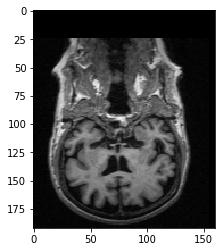

In [17]:
plt.imshow(X_train[0][:, 100, :], cmap='gray')

In [18]:
class CustomDataset(Dataset):
    """Arguments:
        img (tensor)
        label (tensor)
    """

    def __init__(self, img, label):
    
        self.img = img
        self.label = label
        
    def __len__(self):
        return len(self.label)

    def __getitem__(self, index):
        img = self.img[index]
        
        label = self.label[index]
        return img, label


In [19]:
t2 = torch.from_numpy(Y_train)
t1 = torch.from_numpy(X_train)
dataset = CustomDataset(t1, t2)
dataloader = utils.DataLoader(dataset, batch_size=1, num_workers=8, shuffle=True)

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv3d(1, 10, kernel_size=(5, 5, 5))
        self.conv2 = nn.Conv3d(10, 20, kernel_size=(5, 5, 5))
        self.conv2_drop = nn.Dropout3d()
        self.fc1 = nn.Linear(500, 50)
        self.fc2 = nn.Linear(50,3)
        
    def forward(self, x):
        x = F.relu(F.max_pool3d(self.conv1(x), (2, 2, 2)))
        x = F.relu(F.max_pool3d(self.conv2_drop(self.conv2(x)), (2, 2, 2)))
        x = x.view(-1, 500)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = Net().to(device)
#summary(model, (1, 192, 192, 160))

In [25]:
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=1e-5, weight_decay=1e-5)

In [26]:
for i in range(0,10):
    loss_list, batch_list = [], []

    for num, (img, label) in enumerate(dataloader):
        inputs = img.unsqueeze(0)
        print()
        output = model(inputs.float().to(torch.device("cuda" if torch.cuda.is_available() else "cpu")))
        loss = criterion(output, label.float().to(torch.device("cuda" if torch.cuda.is_available() else "cpu")))
        optimizer.zero_grad()
        loss_list.append(loss.detach().cpu().item())
        batch_list.append(i+1)
        loss.backward()
        optimizer.step()
        print('Train - Epoch %d, Batch: %d, Loss: %f' % (i, num, loss.detach().cpu().item()))

/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([1, 3])) that is different to the input size (torch.Size([2997, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train - Epoch 0, Batch: 0, Loss: 1241.227173

Train - Epoch 0, Batch: 1, Loss: 840.864502

Train - Epoch 0, Batch: 2, Loss: 806.673340

Train - Epoch 0, Batch: 3, Loss: 4685.494141

Train - Epoch 0, Batch: 4, Loss: 482.792725

Train - Epoch 0, Batch: 5, Loss: 533.150330

Train - Epoch 0, Batch: 6, Loss: 1298.665161

Train - Epoch 0, Batch: 7, Loss: 5009.102051

Train - Epoch 0, Batch: 8, Loss: 3988.960449

Train - Epoch 0, Batch: 9, Loss: 5.840930

Train - Epoch 0, Batch: 10, Loss: 2430.333252

Train - Epoch 0, Batch: 11, Loss: 231.164703

Train - Epoch 0, Batch: 12, Loss: 13.623575

Train - Epoch 0, Batch: 13, Loss: 1765014400.000000

Train - Epoch 0, Batch: 14, Loss: 529.080872

Train - Epoch 0, Batch: 15, Loss: 599.384155

Train - Epoch 0, Batch: 16, Loss: 784.029907

Train - Epoch 0, Batch: 17, Loss: 1113.408691

Train - Epoch 0, Batch: 18, Loss: 3269.363037

Train - Epoch 0, Batch: 19, Loss: 2891.467041

Train - Epoch 0, Batch: 20, Loss: 2225.685303

Train - Epoch 0, Batch: 21, Lo

Train - Epoch 3, Batch: 10, Loss: 408.035034

Train - Epoch 3, Batch: 11, Loss: 879.113953

Train - Epoch 3, Batch: 12, Loss: 88.472313

Train - Epoch 3, Batch: 13, Loss: 316.369873

Train - Epoch 3, Batch: 14, Loss: 247.484375

Train - Epoch 3, Batch: 15, Loss: 1134.233887

Train - Epoch 3, Batch: 16, Loss: 7.197240

Train - Epoch 3, Batch: 17, Loss: 249.759369

Train - Epoch 3, Batch: 18, Loss: 221874304.000000

Train - Epoch 3, Batch: 19, Loss: 98.964897

Train - Epoch 3, Batch: 20, Loss: 126.899971

Train - Epoch 3, Batch: 21, Loss: 164.439041

Train - Epoch 3, Batch: 22, Loss: 736.794250

Train - Epoch 3, Batch: 23, Loss: 1379.978394

Train - Epoch 3, Batch: 24, Loss: 356.831238

Train - Epoch 3, Batch: 25, Loss: 82.619766

Train - Epoch 3, Batch: 26, Loss: 174.683716

Train - Epoch 3, Batch: 27, Loss: 205.388138

Train - Epoch 3, Batch: 28, Loss: 65.741997

Train - Epoch 3, Batch: 29, Loss: 288.050385

Train - Epoch 3, Batch: 30, Loss: 917.185303

Train - Epoch 3, Batch: 31, Loss

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/queues.py", line 247, in _feed
    send_bytes(obj)
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
Traceback (most recent call last):
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/queues.py", line 247, in _feed
    send_bytes(obj)
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/fabio/.pyenv/versions/3.6.1/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/

KeyboardInterrupt: 

In [7]:
''' SCRIPT DA USARE PER 3D SLICER 

##################################################
##################################################
##################################################

>>> scene = slicer.mrmlScene
>>> slicer.util.selectModule('BRAINSFit')
>>> brainsFit = slicer.modules.brainsfit

>>> [ success,movingVolumeNode ] = slicer.util.loadVolume('/media/fabio/Disco locale/Scaricati/ADNI1_ex/ADNI/002_S_0559/MPR-R__GradWarp__B1_Correction__N3/2006-05-23_15_09_38.0/S14876/ADNI_002_S_0559_MR_MPR-R__GradWarp__B1_Correction__N3_Br_20070216235035331_S14876_I40678.nii',returnNode=True)
>>> movingVolumeNode
(MRMLCorePython.vtkMRMLScalarVolumeNode)0x7f5738020d50
>>> success
True

>>> [ success, fixedVolumeNode ] = slicer.util.loadVolume('/media/fabio/Disco locale/Scaricati/ADNI1_ex/ADNI/011_S_0008/MPR-R__GradWarp__B1_Correction__N3/2005-09-13_13_33_53.0/S9195/ADNI_011_S_0008_MR_MPR-R__GradWarp__B1_Correction__N3_Br_20061208113724677_S9195_I32254.nii', returnNode = True)
>>> success
True
>>> parameterRigid = {}
>>> linearTransform = slicer.vtkMRMLLinearTransformNode()
>>> parameterRigid["linearTransform"] = linearTransform.GetID()
>>> parameterRigid["useRigid"] = True
>>> slicer.cli.run(brainsFit, None, parameterRigid)
parameter  linearTransform  has unsupported type  NoneType
(MRMLCLIPython.vtkMRMLCommandLineModuleNode)0x7f5738020e20
>>> parameterRigid["fixedVolume"] = fixedVolumeNode
>>> parameterRigid["movingVolume"] = movingVolumeNode
>>> slicer.cli.run(brainsFit, None, parameterRigid)
parameter  linearTransform  has unsupported type  NoneType
(MRMLCLIPython.vtkMRMLCommandLineModuleNode)0x7f5738030328
>>> slicer.mrmlScene.AddNode( linearTransform )
(MRMLCorePython.vtkMRMLLinearTransformNode)0x7f5738020e88
>>> slicer.cli.run(brainsFit, None, parameterRigid)
parameter  linearTransform  has unsupported type  NoneType
(MRMLCLIPython.vtkMRMLCommandLineModuleNode)0x7f5738020db8
>>> parameterRigid["linearTransform"] = linearTransform.GetID()
>>> slicer.cli.run(brainsFit, None, parameterRigid)
(MRMLCLIPython.vtkMRMLCommandLineModuleNode)0x7f5738030328
>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> a
(MRMLCLIPython.vtkMRMLCommandLineModuleNode)0x7f5738020e20
>>> a.GetStatusString()
'Completed'
>>> linearTransform = slicer.vtkMRMLLinearTransformNode()
>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> a.GetStatusString()
'Completed'
>>> parameterRigid["useRigid"] = True
>>> parameterRigid["samplingPercentage"] = 0.002
>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> parameterRigid["samplingPercentage"] = 0.02
>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> a.GetStatus()
2

>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> a.GetStatus()
2
>>> a.GetStatus()
32
>>> parameterRigid["samplingPercentage"] = 0.002
>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> parameterRigid["samplingPercentage"] = 0.02
>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> parameterRigid["samplingPercentage"] = 0.002
>>> 
>>> parameterRigid["initializeTransformMode"] = "useCenterOfHead"
>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> a.GetStatus()
96
>>> a.GetStatus()
96
>>> a.GetStatus()
96
>>> a.GetStatus()
96
>>> a.GetStatusString()
'Completed with errors'
>>> a.GetErrorText()
"General Registration (BRAINS) standard error:\n\nPARSE ERROR: Argument: (--initializeTransformMode)\n             Value 'useCenterOfHead' does not meet constraint: Off|useMomentsAlign|useCenterOfHeadAlign|useGeometryAlign|useCenterOfROIAlign\n\nBrief USAGE: \n\nFor complete USAGE and HELP type: \n   /media/fabio/Disco locale/Scaricati/Slicer-4.10.2-linux-amd64/bin/../lib/Slicer-4.10/cli-modules/BRAINSFit --help\n\n"
>>> parameterRigid["initializeTransformMode"] = "useCenterOfHeadAlign"
>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> a.GetStatusString()
'Running'
>>> a.GetStatus()
2
>>> a.GetStatusString()
'Running'
>>> a.GetStatus()
2
>>> a.GetStatus()
2
>>> a.GetStatusString()
'Running'
>>> a.GetStatusString()
'Running'
>>> a.GetErrorText()
''
>>> a.GetStatusString()
'Completed'
>>> a.GetStatusString()
'Completed'
>>> 
>>> 
>>> parameterRigid["samplingPercentage"] = 0.02
>>> a = slicer.cli.run(brainsFit, None, parameterRigid)
>>> a.GetStatusString()
'Running'
>>> a.GetStatusString()
'Running'
>>> a.GetStatusString()
'Completed'
>>> 
'''

' SCRIPT DA USARE PER 3D SLICER \n\n##################################################\n##################################################\n##################################################\n\n>>> scene = slicer.mrmlScene\n>>> slicer.util.selectModule(\'BRAINSFit\')\n>>> brainsFit = slicer.modules.brainsfit\n\n>>> [ success,movingVolumeNode ] = slicer.util.loadVolume(\'/media/fabio/Disco locale/Scaricati/ADNI1_ex/ADNI/002_S_0559/MPR-R__GradWarp__B1_Correction__N3/2006-05-23_15_09_38.0/S14876/ADNI_002_S_0559_MR_MPR-R__GradWarp__B1_Correction__N3_Br_20070216235035331_S14876_I40678.nii\',returnNode=True)\n>>> movingVolumeNode\n(MRMLCorePython.vtkMRMLScalarVolumeNode)0x7f5738020d50\n>>> success\nTrue\n\n>>> [ success, fixedVolumeNode ] = slicer.util.loadVolume(\'/media/fabio/Disco locale/Scaricati/ADNI1_ex/ADNI/011_S_0008/MPR-R__GradWarp__B1_Correction__N3/2005-09-13_13_33_53.0/S9195/ADNI_011_S_0008_MR_MPR-R__GradWarp__B1_Correction__N3_Br_20061208113724677_S9195_I32254.nii\', returnNode 